# Exploratory Data Analysis Case Study - 
##### Conducted by Nirbhay Tandon & Naveen Sharma

## 1.Import libraries and set required parameters

In [1]:
#import all the libraries and modules
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import re
from scipy import stats 

# Supress Warnings
#Enable autocomplete in Jupyter Notebook.
%config IPCompleter.greedy=True

import warnings
warnings.filterwarnings('ignore')
import os

In [2]:
## Set the max display columns to None so that pandas doesn't sandwich the output 
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 40)

### Reading and analysing Data

In [3]:
applicationData=pd.read_csv("./application_data.csv")

applicationData.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144,0.0000,0.0690,0.0833,0.1250,0.0377,0.022,0.0198,0.0,0.0,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.00,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,0.0130,0.0773,0.0549,0.0039,0.0098,0.0924,0.0538,0.9851,0.8040,0.0497,0.0806,0.0345,0.2917,0.3333,0.0128,0.079,0.0554,0.0,0.0,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.01,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

## 2. Data Inspection

In [4]:
#shape of application_data.csv data

applicationData.shape

(307511, 122)

In [5]:
#take information about the data

applicationData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB


In [6]:
#get the information about the numerical data

applicationData.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,TOTALAREA_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,104582.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307509.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,134133.000000,3.068510e+05,246546.000000,151450.00000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,151450.000000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,151450.000000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,159080.000000,306490.000000,306490.000000,306490.000000,306490.000000,307510.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.00000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,-16036.995067,63815.045904,-4986.120328,-2994.202373,12.061091,0.999997,0.819889,0.199368,0.998133,0.281066,0.056720,2.152665,2.052463,2.031521,12.063419,0.015144,0.050769,0.040659,0.078173,0.230454,0.179555,0.502130,5.143927e-01,0.510853,0.11744,0.088442,0.977735,0.752471,0.044621,0.078942,0.149725,0.226282,0.231894,0.066333,0.100775,0.107399,0.008809,0.028358,0.114231,0.087543,0.977065,0.759637,0.042553,0.074490,0.145193,0.222315,0.228058,0.064958,0.105645,0.105975,0.008076,0.027022,0.117850,0.087955,0.97

In [7]:
## print the column names for application_data.csv
applicationData.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY',
       ...
       'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20',
       'FLAG_DOCUMENT_21', 'AMT_REQ_CREDIT_BUREAU_HOUR',
       'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK',
       'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT',
       'AMT_REQ_CREDIT_BUREAU_YEAR'],
      dtype='object', length=122)

In [8]:
## print the various datatypes of application_data.csv
applicationData.dtypes

SK_ID_CURR                      int64
TARGET                          int64
NAME_CONTRACT_TYPE             object
CODE_GENDER                    object
FLAG_OWN_CAR                   object
                               ...   
AMT_REQ_CREDIT_BUREAU_DAY     float64
AMT_REQ_CREDIT_BUREAU_WEEK    float64
AMT_REQ_CREDIT_BUREAU_MON     float64
AMT_REQ_CREDIT_BUREAU_QRT     float64
AMT_REQ_CREDIT_BUREAU_YEAR    float64
Length: 122, dtype: object

## 3. Data Cleaning & Quality Check

In this section we will perform various checks and balances on the application_data.csv file. 

We will:
* Perform a check for the number of missing/null values on each column
* Perform a check for the percentage of missing/null values of each column
    * Drop the columns that have a high percentage of null values, i.e. over 60%
    * Print the names of the dropped columns
    * Verify that the columns were dropped by comparing the shape of the new dataframe created
* For columns with around 13% of null values we will discuss the best way to handle the missing/null values in the columns
    * Check the data types of these columns and determine if they are categorical in nature or not
* Check the data types for all the columns in the dataframe and convert them to numerical data types if required
* Check for any outliers in any 3 numerical columns and treat them accordingly
* Create a bin for continous variables and analyse them


In [9]:
### Let us create a utility function to generate a list of null values in different dataframes
### We will utilize this function extensively througout the notebook. 
def generateNullValuesPercentageTable(dataframe):
    totalNullValues = dataframe.isnull().sum().sort_values(ascending=False)
    percentageOfNullValues = round((dataframe.isnull().sum()*100/len(dataframe)).sort_values(ascending=False),2)
    columnNamesWithPrcntgOfNullValues = pd.concat([totalNullValues, percentageOfNullValues], axis=1, keys=['Total Null Values', 'Percentage of Null Values'])
    return columnNamesWithPrcntgOfNullValues

In [10]:
## Check the number of null values of each column and display them in 
## decending order along with the percentage of null values there is

generateNullValuesPercentageTable(applicationData)

,Total Null Values,Percentage of Null Values
COMMONAREA_MEDI,214865,69.87
COMMONAREA_AVG,214865,69.87
COMMONAREA_MODE,214865,69.87
NONLIVINGAPARTMENTS_MODE,213514,69.43
NONLIVINGAPARTMENTS_MEDI,213514,69.43
...,...,...
REG_CITY_NOT_LIVE_CITY,0,0.00
LIVE_REGION_NOT_WORK_REGION,0,0.00
REG_REGION_NOT_WORK_REGION,0,0.00
HOUR_APPR_PROCESS_START,0,0.00


In [11]:
### Assess the shape of the dataframe before dropping 
### columns with a high percentage of 
### null values
print("The Initial shape of the DataFrame is: ", applicationData.shape)

The Initial shape of the DataFrame is:  (307511, 122)


In [12]:
#Drop all the columns where the 
## percentage of missing values is above 60% in application_data.csv
droppedColumns = applicationData.columns[applicationData.isnull().mean() > 0.60]
applicationDataAfterDroppedColumns = applicationData.drop(droppedColumns, axis = 1)

print("The new shape of the DataFrame is: ", applicationDataAfterDroppedColumns.shape)

The new shape of the DataFrame is:  (307511, 105)


In [13]:
## analysing the dataframe is correct after dropping columns
applicationDataAfterDroppedColumns.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,LANDAREA_AVG,LIVINGAREA_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,LANDAREA_MODE,LIVINGAREA_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,LANDAREA_MEDI,LIVINGAREA_MEDI,NONLIVINGAREA_MEDI,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.00,0.0690,0.0833,0.0369,0.0190,0.0000,0.0252,0.0383,0.9722,0.0000,0.0690,0.0833,0.0377,0.0198,0.0,0.0250,0.0369,0.9722,0.00,0.0690,0.0833,0.0375,0.0193,0.00,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.08,0.0345,0.2917,0.0130,0.0549,0.0098,0.0924,0.0538,0.9851,0.0806,0.0345,0.2917,0.0128,0.0554,0.0,0.0968,0.0529,0.9851,0.08,0.0345,0.2917,0.0132,0.0558,0.01,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,-815.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,-19005,-3039,-9833.0,-2437,1,1,0,1,0,0,Laborers,2.0,2,2,WEDNESDAY,17,0,0,0,0,0,0,Business Entity Type 3,NaN,0.650442,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,0.0,2.0,0.0,-617.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,Na

### Observation: 

As you can see, the shape of the data has changed from (307511, 122) to (307511, 105). Which mean we have dropped 17 columns that had over 60% percent null values. The dropped columns are mentioned below.

In [14]:
print("The columns that have been dropped are: ", droppedColumns)

The columns that have been dropped are:  Index(['OWN_CAR_AGE', 'YEARS_BUILD_AVG', 'COMMONAREA_AVG', 'FLOORSMIN_AVG',
       'LIVINGAPARTMENTS_AVG', 'NONLIVINGAPARTMENTS_AVG', 'YEARS_BUILD_MODE',
       'COMMONAREA_MODE', 'FLOORSMIN_MODE', 'LIVINGAPARTMENTS_MODE',
       'NONLIVINGAPARTMENTS_MODE', 'YEARS_BUILD_MEDI', 'COMMONAREA_MEDI',
       'FLOORSMIN_MEDI', 'LIVINGAPARTMENTS_MEDI', 'NONLIVINGAPARTMENTS_MEDI',
       'FONDKAPREMONT_MODE'],
      dtype='object')


In [15]:
## print the percentage of columns with null values in the 
## new data frame after the columns have been dropped

generateNullValuesPercentageTable(applicationDataAfterDroppedColumns)


,Total Null Values,Percentage of Null Values
LANDAREA_MEDI,182590,59.38
LANDAREA_AVG,182590,59.38
LANDAREA_MODE,182590,59.38
BASEMENTAREA_MODE,179943,58.52
BASEMENTAREA_AVG,179943,58.52
...,...,...
REG_CITY_NOT_LIVE_CITY,0,0.00
LIVE_REGION_NOT_WORK_REGION,0,0.00
REG_REGION_NOT_LIVE_REGION,0,0.00
HOUR_APPR_PROCESS_START,0,0.00


In [16]:
#### Check dataframe shape to confirm no other columns were dropped 
applicationDataAfterDroppedColumns.shape

(307511, 105)

### Observation: 

As you can see above, there are still a few columns that have a above 30% of null/missing values. We can deal with those null/missing values using various methods of imputation. 

##### Some key points:
- The columns with above 60% of null values have successfully been dropped
- The column with the highest percentage of null values after the drop is "LANDAREA_MEDI" with 59.38% null values. Whereas earlier it was "COMMONAREA_MEDI" with 69.87% null values

- The new shape of the dataframe is (307511, 105)

Checking the datadrame after dropping null values

In [17]:
applicationDataAfterDroppedColumns.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,LANDAREA_AVG,LIVINGAREA_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,LANDAREA_MODE,LIVINGAREA_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,LANDAREA_MEDI,LIVINGAREA_MEDI,NONLIVINGAREA_MEDI,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.00,0.0690,0.0833,0.0369,0.0190,0.0000,0.0252,0.0383,0.9722,0.0000,0.0690,0.0833,0.0377,0.0198,0.0,0.0250,0.0369,0.9722,0.00,0.0690,0.0833,0.0375,0.0193,0.00,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.08,0.0345,0.2917,0.0130,0.0549,0.0098,0.0924,0.0538,0.9851,0.0806,0.0345,0.2917,0.0128,0.0554,0.0,0.0968,0.0529,0.9851,0.08,0.0345,0.2917,0.0132,0.0558,0.01,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,-815.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,-19005,-3039,-9833.0,-2437,1,1,0,1,0,0,Laborers,2.0,2,2,WEDNESDAY,17,0,0,0,0,0,0,Business Entity Type 3,NaN,0.650442,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,0.0,2.0,0.0,-617.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,Na

In [18]:
### Analyzing Columns with null values around 14% to determine
### what might be the best way to impute such values
listOfColumnsWithLessValuesOfNull = applicationDataAfterDroppedColumns.columns[applicationDataAfterDroppedColumns.isnull().mean() < 0.14]

applicationDataWithLessPrcntgOfNulls = applicationDataAfterDroppedColumns.loc[:, listOfColumnsWithLessValuesOfNull]
print(applicationDataWithLessPrcntgOfNulls.shape)

(307511, 71)


In [19]:
applicationDataWithLessPrcntgOfNulls.head(20)

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.000,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,1,1,0,1,1,0,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.262949,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.000,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,1,1,0,1,1,0,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.622246,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.000,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,1,1,1,1,1,0,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,0.555912,0.0,0.0,0.0,0.0,-815.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.000,312682.5,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,-19005,-3039,-9833.0,-2437,1,1,0,1,0,0,2.0,2,2,WEDNESDAY,17,0,0,0,0,0,0,Business Entity Type 3,0.650442,2.0,0.0,2.0,0.0,-617.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.000,513000.0,21865.5,513000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,-19932,-3038,-4311.0,-3458,1,1,0,1,0,0,1.0,2,2,THURSDAY,11,0,0,0,0,1,1,Religion,0.322738,0.0,0.0,0.0,0.0,-1106.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
5,100008,0,Cash loans,M,N,Y,0,99000.000,490495.5,27517.5,454500.0,"Spouse, partner",State servant,Secondary / secondary special,Married,House / apartment,0.035792,-16941,-1588,-4970.0,-477,1,1,1,1,1,0,2.0,2,2,WEDNESDAY,16,0,0,0,0,0,0,Other,0.354225,0.0,0.0,0.0,0.0,-2536.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,1.0,1.0
6,100009,0,Cash loans,F,Y,Y,1,171000.000,1560726.0,41301.0,1395000.0,Unaccompanied,Commercial associate,Higher education,Married,House / apartment,0.035792,-13778,-3130,-1213.0,-619,1,1,0,1,1,0,3.0,2,2,SUNDAY,16,0,0,0,0,0,0,Business Entity Type 3,0.724000,1.0,0.0,1.0,0.0,-1562.0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0.0,0.0,0.0,1.0,1.0,2.0
7,100010,0,Cash loans,M,Y,Y,0,360000.000,1530000.0,42075.0,1530000.0,Unaccompanied,State servant,Higher education,Married,House / apartment,0.003122,-18850,-449,-4597.0,-2379,1,1,1,1,0,0,2.0,3,3,MONDAY,16,0,0,0,0,1,1,Other,0.714279,2.0,0.0,2.0,0.0,-1070.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0

In [20]:
### Analysing columns with around 13.5% null values
columnsToDescribe = ['AMT_REQ_CREDIT_BUREAU_QRT', 'AMT_REQ_CREDIT_BUREAU_YEAR', 'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_HOUR','AMT_REQ_CREDIT_BUREAU_WEEK', 'OBS_30_CNT_SOCIAL_CIRCLE', 'OBS_60_CNT_SOCIAL_CIRCLE', 'EXT_SOURCE_2']
applicationDataAfterDroppedColumns[columnsToDescribe].describe()

,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_WEEK,OBS_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,EXT_SOURCE_2
count,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,306490.000000,306490.000000,3.068510e+05
mean,0.265474,1.899974,0.267395,0.007000,0.006402,0.034362,1.422245,1.405292,5.143927e-01
std,0.794056,1.869295,0.916002,0.110757,0.083849,0.204685,2.400989,2.379803,1.910602e-01
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.173617e-08
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.924574e-01
50%,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.659614e-01
75%,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,2.000000,2.000000,6.636171e-01
max,261.000000,25.000000,27.000000,9.000000,4.000000,8.000000,348.000000,344.000000,8.549997e-01


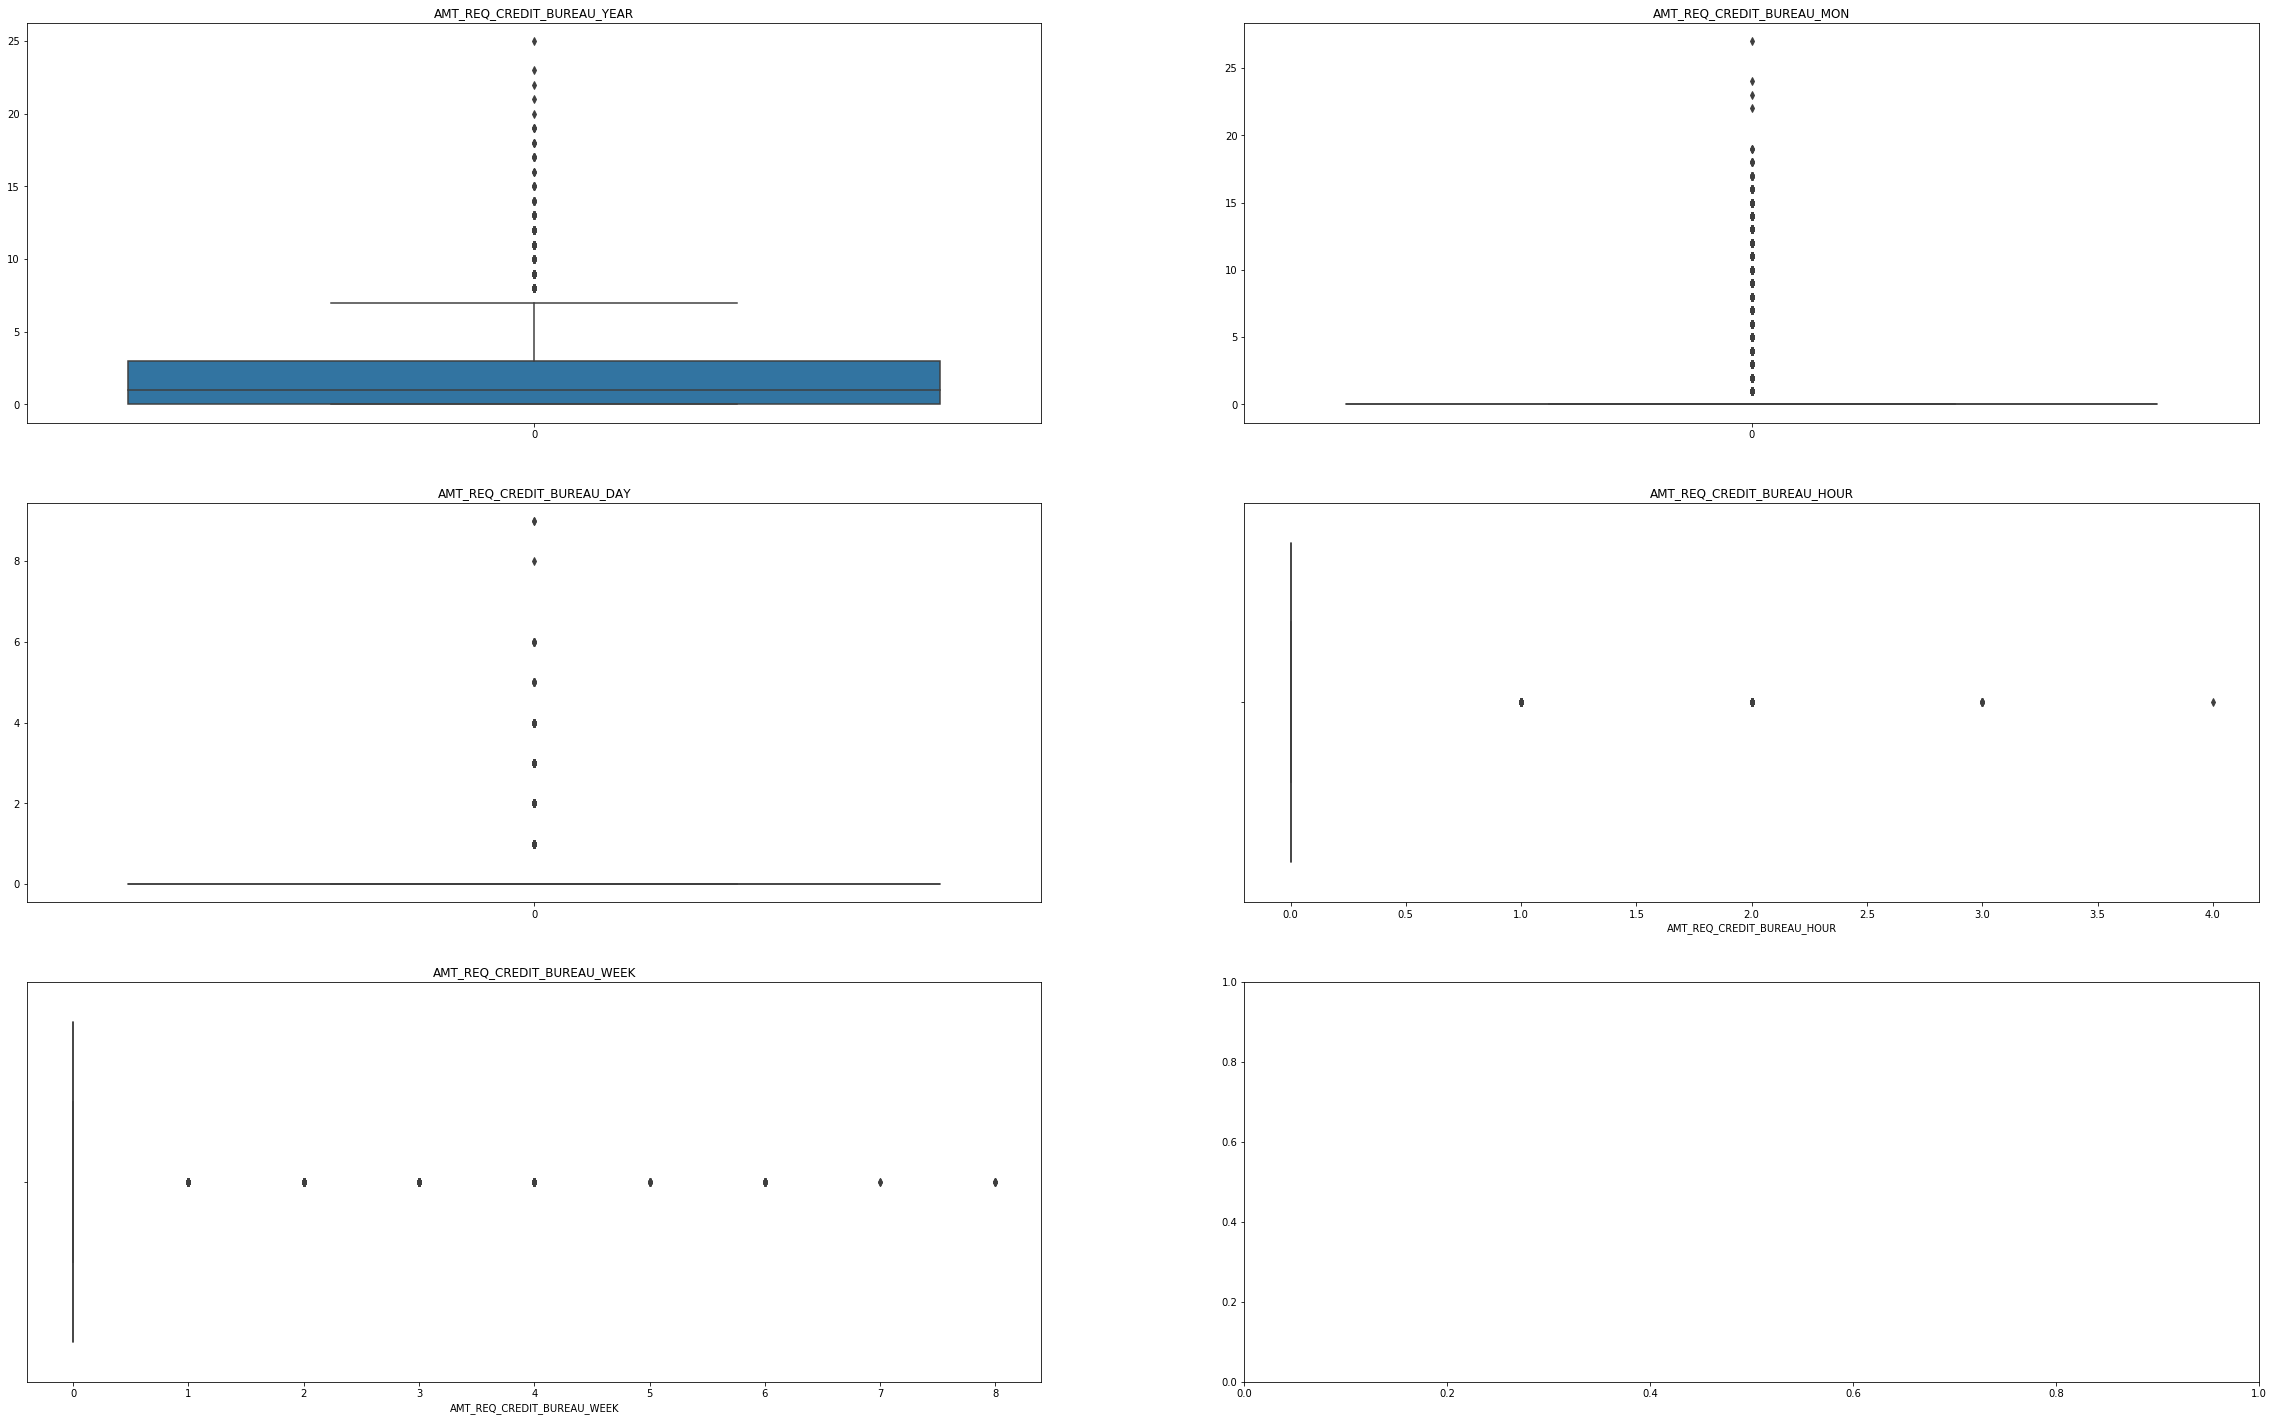

In [21]:
### Let us plot a boxplot to see the various variables
fig, axes = plt.subplots(nrows=3, ncols = 2, figsize=(40,25))

sns.boxplot(data=applicationDataAfterDroppedColumns.AMT_REQ_CREDIT_BUREAU_YEAR, ax=axes[0][0])
axes[0][0].set_title('AMT_REQ_CREDIT_BUREAU_YEAR')

sns.boxplot(data=applicationDataAfterDroppedColumns.AMT_REQ_CREDIT_BUREAU_MON, ax=axes[0][1])
axes[0][1].set_title('AMT_REQ_CREDIT_BUREAU_MON')

sns.boxplot(data=applicationDataAfterDroppedColumns.AMT_REQ_CREDIT_BUREAU_DAY, ax=axes[1][0])
axes[1][0].set_title('AMT_REQ_CREDIT_BUREAU_DAY')

sns.boxplot(applicationDataAfterDroppedColumns.AMT_REQ_CREDIT_BUREAU_HOUR, ax=axes[1][1])
axes[1][1].set_title('AMT_REQ_CREDIT_BUREAU_HOUR')

sns.boxplot(applicationDataAfterDroppedColumns.AMT_REQ_CREDIT_BUREAU_WEEK, ax=axes[2][0])
axes[2][0].set_title('AMT_REQ_CREDIT_BUREAU_WEEK')
plt.show()

### Observation
As you can see above, when we take a look at the columns that have a low number of null values, the shape of the data changes to (307511, 71) compared to (307511, 105). We lose 34 columns in the process. 


Checking columns having less no. of Null values(around 13% or so) and analysing the best metric 
to impute the missing/null values in those columns basis if the column/variable is 'Categorical' or 'Continuous''
 - AMT_REQ_CREDIT_BUREAU_HOUR (99.4% of the values are 0.0 with 4.0 and 3.0 values being outliers. Its safe to impute the missing values with 0.0) 
 - AMT_REQ_CREDIT_BUREAU_DAY (99.4% of the values are 0.0 with 9.0 and 8.0 values being outliers. Its safe to impute the missing values with 0.0) 
 - AMT_REQ_CREDIT_BUREAU_WEEK (96.8% of the values are 0.0 with 8.0 and 7.0 values being outliers. Its safe to impute the missing values with 0.0) 
 - AMT_REQ_CREDIT_BUREAU_MON (83.6% of the values are 0.0. Its safe to impute the missing values with mode : 0.0)
 - AMT_REQ_CREDIT_BUREAU_YEAR (It seems fine to use the median value 1.0 here for imputing the missing values) 

In [22]:
### Checking for categorical data
categoricalDataColumns = applicationDataAfterDroppedColumns.nunique().sort_values()
categoricalDataColumns

REG_CITY_NOT_WORK_CITY             2
FLAG_EMAIL                         2
FLAG_DOCUMENT_2                    2
FLAG_DOCUMENT_3                    2
REG_REGION_NOT_LIVE_REGION         2
                               ...  
DAYS_REGISTRATION              15688
DAYS_BIRTH                     17460
EXT_SOURCE_1                  114584
EXT_SOURCE_2                  119831
SK_ID_CURR                    307511
Length: 105, dtype: int64

### Observation:
Given the wide number of columns with a less number of unique values, we will convert all columns with upto 5 values into categorical columns

In [23]:
listOfColumnsWithMaxTenUniqueValues = [i for i in applicationDataAfterDroppedColumns.columns if applicationDataAfterDroppedColumns[i].nunique() <= 5]
for col in listOfColumnsWithMaxTenUniqueValues:
    applicationDataAfterDroppedColumns[col] = applicationDataAfterDroppedColumns[col].astype('category')
    
applicationDataAfterDroppedColumns.shape

(307511, 105)

In [24]:
applicationDataAfterDroppedColumns.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,LANDAREA_AVG,LIVINGAREA_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,LANDAREA_MODE,LIVINGAREA_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,LANDAREA_MEDI,LIVINGAREA_MEDI,NONLIVINGAREA_MEDI,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.00,0.0690,0.0833,0.0369,0.0190,0.0000,0.0252,0.0383,0.9722,0.0000,0.0690,0.0833,0.0377,0.0198,0.0,0.0250,0.0369,0.9722,0.00,0.0690,0.0833,0.0375,0.0193,0.00,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.08,0.0345,0.2917,0.0130,0.0549,0.0098,0.0924,0.0538,0.9851,0.0806,0.0345,0.2917,0.0128,0.0554,0.0,0.0968,0.0529,0.9851,0.08,0.0345,0.2917,0.0132,0.0558,0.01,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,-815.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,-19005,-3039,-9833.0,-2437,1,1,0,1,0,0,Laborers,2.0,2,2,WEDNESDAY,17,0,0,0,0,0,0,Business Entity Type 3,NaN,0.650442,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,0.0,2.0,0.0,-617.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,Na

In [25]:
## Check for datatypes of all columns in the new dataframe
applicationDataAfterDroppedColumns.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 105 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: category(43), float64(48), int64(6), object(8)
memory usage: 158.1+ MB


### Observation:

We notice above that after dropping the null columns we still have:

- 43 Categorical
- 48 Float
- 6 Integer 
- 8 Object data types

In [26]:
## Convert the categorical data columns into individual columns with numeric values for better analysis
## we will do this using one-hot-encoding method
convertedCategoricalColumnsDataframe = pd.get_dummies(applicationDataAfterDroppedColumns, columns=listOfColumnsWithMaxTenUniqueValues, prefix=listOfColumnsWithMaxTenUniqueValues)
convertedCategoricalColumnsDataframe.head()

,SK_ID_CURR,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OCCUPATION_TYPE,CNT_FAM_MEMBERS,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,LANDAREA_AVG,LIVINGAREA_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,LANDAREA_MODE,LIVINGAREA_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,LANDAREA_MEDI,LIVINGAREA_MEDI,NONLIVINGAREA_MEDI,TOTALAREA_MODE,WALLSMATERIAL_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,TARGET_0,TARGET_1,NAME_CONTRACT_TYPE_Cash loans,NAME_CONTRACT_TYPE_Revolving loans,CODE_GENDER_F,CODE_GENDER_M,CODE_GENDER_XNA,FLAG_OWN_CAR_N,FLAG_OWN_CAR_Y,FLAG_OWN_REALTY_N,FLAG_OWN_REALTY_Y,NAME_EDUCATION_TYPE_Academic degree,NAME_EDUCATION_TYPE_Higher education,NAME_EDUCATION_TYPE_Incomplete higher,NAME_EDUCATION_TYPE_Lower secondary,NAME_EDUCATION_TYPE_Secondary / secondary special,FLAG_MOBIL_0,FLAG_MOBIL_1,FLAG_EMP_PHONE_0,FLAG_EMP_PHONE_1,FLAG_WORK_PHONE_0,FLAG_WORK_PHONE_1,FLAG_CONT_MOBILE_0,FLAG_CONT_MOBILE_1,FLAG_PHONE_0,FLAG_PHONE_1,FLAG_EMAIL_0,FLAG_EMAIL_1,REGION_RATING_CLIENT_1,REGION_RATING_CLIENT_2,REGION_RATING_CLIENT_3,REGION_RATING_CLIENT_W_CITY_1,REGION_RATING_CLIENT_W_CITY_2,REGION_RATING_CLIENT_W_CITY_3,REG_REGION_NOT_LIVE_REGION_0,REG_REGION_NOT_LIVE_REGION_1,REG_REGION_NOT_WORK_REGION_0,REG_REGION_NOT_WORK_REGION_1,LIVE_REGION_NOT_WORK_REGION_0,LIVE_REGION_NOT_WORK_REGION_1,REG_CITY_NOT_LIVE_CITY_0,REG_CITY_NOT_LIVE_CITY_1,REG_CITY_NOT_WORK_CITY_0,REG_CITY_NOT_WORK_CITY_1,LIVE_CITY_NOT_WORK_CITY_0,LIVE_CITY_NOT_WORK_CITY_1,HOUSETYPE_MODE_block of flats,HOUSETYPE_MODE_specific housing,HOUSETYPE_MODE_terraced house,EMERGENCYSTATE_MODE_No,EMERGENCYSTATE_MODE_Yes,FLAG_DOCUMENT_2_0,FLAG_DOCUMENT_2_1,FLAG_DOCUMENT_3_0,FLAG_DOCUMENT_3_1,FLAG_DOCUMENT_4_0,FLAG_DOCUMENT_4_1,FLAG_DOCUMENT_5_0,FLAG_DOCUMENT_5_1,FLAG_DOCUMENT_6_0,FLAG_DOCUMENT_6_1,FLAG_DOCUMENT_7_0,FLAG_DOCUMENT_7_1,FLAG_DOCUMENT_8_0,FLAG_DOCUMENT_8_1,FLAG_DOCUMENT_9_0,FLAG_DOCUMENT_9_1,FLAG_DOCUMENT_10_0,FLAG_DOCUMENT_10_1,FLAG_DOCUMENT_11_0,FLAG_DOCUMENT_11_1,FLAG_DOCUMENT_12_0,FLAG_DOCUMENT_12_1,FLAG_DOCUMENT_13_0,FLAG_DOCUMENT_13_1,FLAG_DOCUMENT_14_0,FLAG_DOCUMENT_14_1,FLAG_DOCUMENT_15_0,FLAG_DOCUMENT_15_1,FLAG_DOCUMENT_16_0,FLAG_DOCUMENT_16_1,FLAG_DOCUMENT_17_0,FLAG_DOCUMENT_17_1,FLAG_DOCUMENT_18_0,FLAG_DOCUMENT_18_1,FLAG_DOCUMENT_19_0,FLAG_DOCUMENT_19_1,FLAG_DOCUMENT_20_0,FLAG_DOCUMENT_20_1,FLAG_DOCUMENT_21_0,FLAG_DOCUMENT_21_1,AMT_REQ_CREDIT_BUREAU_HOUR_0.0,AMT_REQ_CREDIT_BUREAU_HOUR_1.0,AMT_REQ_CREDIT_BUREAU_HOUR_2.0,AMT_REQ_CREDIT_BUREAU_HOUR_3.0,AMT_REQ_CREDIT_BUREAU_HOUR_4.0
0,100002,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,Laborers,1.0,WEDNESDAY,10,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.00,0.0690,0.0833,0.0369,0.0190,0.0000,0.0252,0.0383,0.9722,0.0000,0.0690,0.0833,0.0377,0.0198,0.0,0.0250,0.0369,0.9722,0.00,0.0690,0.0833,0.0375,0.0193,0.00,0.0149,"Stone, brick",2.0,2.0,2.0,2.0,-1134.0,0.0,0.0,0.0,0.0,1.0,0,1,1,0,0,1,0,1,0,0,1,0,0,0,0,1,0,1,0,1,1,0,0,1,0,1,1,0,0,1,0,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,0,1,0,1,0,0,1,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,0,0,0
1,100003,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Married,House / apartment,0.003541,-16765,-1188

In [27]:
## Converting these columns has changed the shape of the data to
print("Shape of Application Data after categorical column conversion: ", convertedCategoricalColumnsDataframe.shape)

Shape of Application Data after categorical column conversion:  (307511, 158)


### Observation
As you can see above we have successfully converted the varius categorical datatypes into their own columns.

The new shape of the data is (307511, 158) compared to (307511, 105). We have introuced 53 new columns. These will help us identify the best possible method to use for imputing values.

In [28]:
### Count the number of missing values in the new dataframe
generateNullValuesPercentageTable(convertedCategoricalColumnsDataframe)

,Total Null Values,Percentage of Null Values
LANDAREA_MODE,182590,59.38
LANDAREA_AVG,182590,59.38
LANDAREA_MEDI,182590,59.38
BASEMENTAREA_MEDI,179943,58.52
BASEMENTAREA_AVG,179943,58.52
...,...,...
REG_CITY_NOT_WORK_CITY_0,0,0.00
REG_CITY_NOT_LIVE_CITY_1,0,0.00
REG_CITY_NOT_LIVE_CITY_0,0,0.00
LIVE_REGION_NOT_WORK_REGION_1,0,0.00


### Observation
Let us take the following columns - AMT_REQ_CREDIT_BUREAU_YEAR, AMT_REQ_CREDIT_BUREAU_MON, OBS_30_CNT_SOCIAL_CIRCLE, OBS_60_CNT_SOCIAL_CIRCLE, EXT_SOURCE_2.
Determine their datatypes and using the describe above try and identify what values can be used to impute into the null columns. 


In [29]:
listOfCols = ['AMT_REQ_CREDIT_BUREAU_YEAR', 'AMT_REQ_CREDIT_BUREAU_MON', 'OBS_30_CNT_SOCIAL_CIRCLE', 'OBS_60_CNT_SOCIAL_CIRCLE', 'EXT_SOURCE_2']
convertedCategoricalColumnsDataframe[listOfCols].dtypes

AMT_REQ_CREDIT_BUREAU_YEAR    float64
AMT_REQ_CREDIT_BUREAU_MON     float64
OBS_30_CNT_SOCIAL_CIRCLE      float64
OBS_60_CNT_SOCIAL_CIRCLE      float64
EXT_SOURCE_2                  float64
dtype: object

In [30]:
applicationDataAfterDroppedColumns['AMT_REQ_CREDIT_BUREAU_HOUR'].fillna(0.0, inplace = True)
applicationDataAfterDroppedColumns['AMT_REQ_CREDIT_BUREAU_HOUR'] = applicationDataAfterDroppedColumns['AMT_REQ_CREDIT_BUREAU_HOUR'].astype(int)

In [31]:
## convert DAYS_BIRTH to years
def func_age_yrs(x):
    return round(abs(x/365),0)

applicationDataAfterDroppedColumns['DAYS_BIRTH'] = applicationDataAfterDroppedColumns['DAYS_BIRTH'].apply(func_age_yrs)

### Observation
In all the selected columns we can see that we can use the median to impute the values in the dataframe. They all correspond to 0.00 except EXT_SOURCE_2. For EXT_SOURCE_2 we observe that the mean and the median values are roughly similar at 5.143927e-01 for mean & 5.659614e-01 for median. So we could use either of those values to impute.

Let us now check for outliers on 6 numerical columns.
For this we can use our dataset from after we dropped the columns with over 60% null values. 


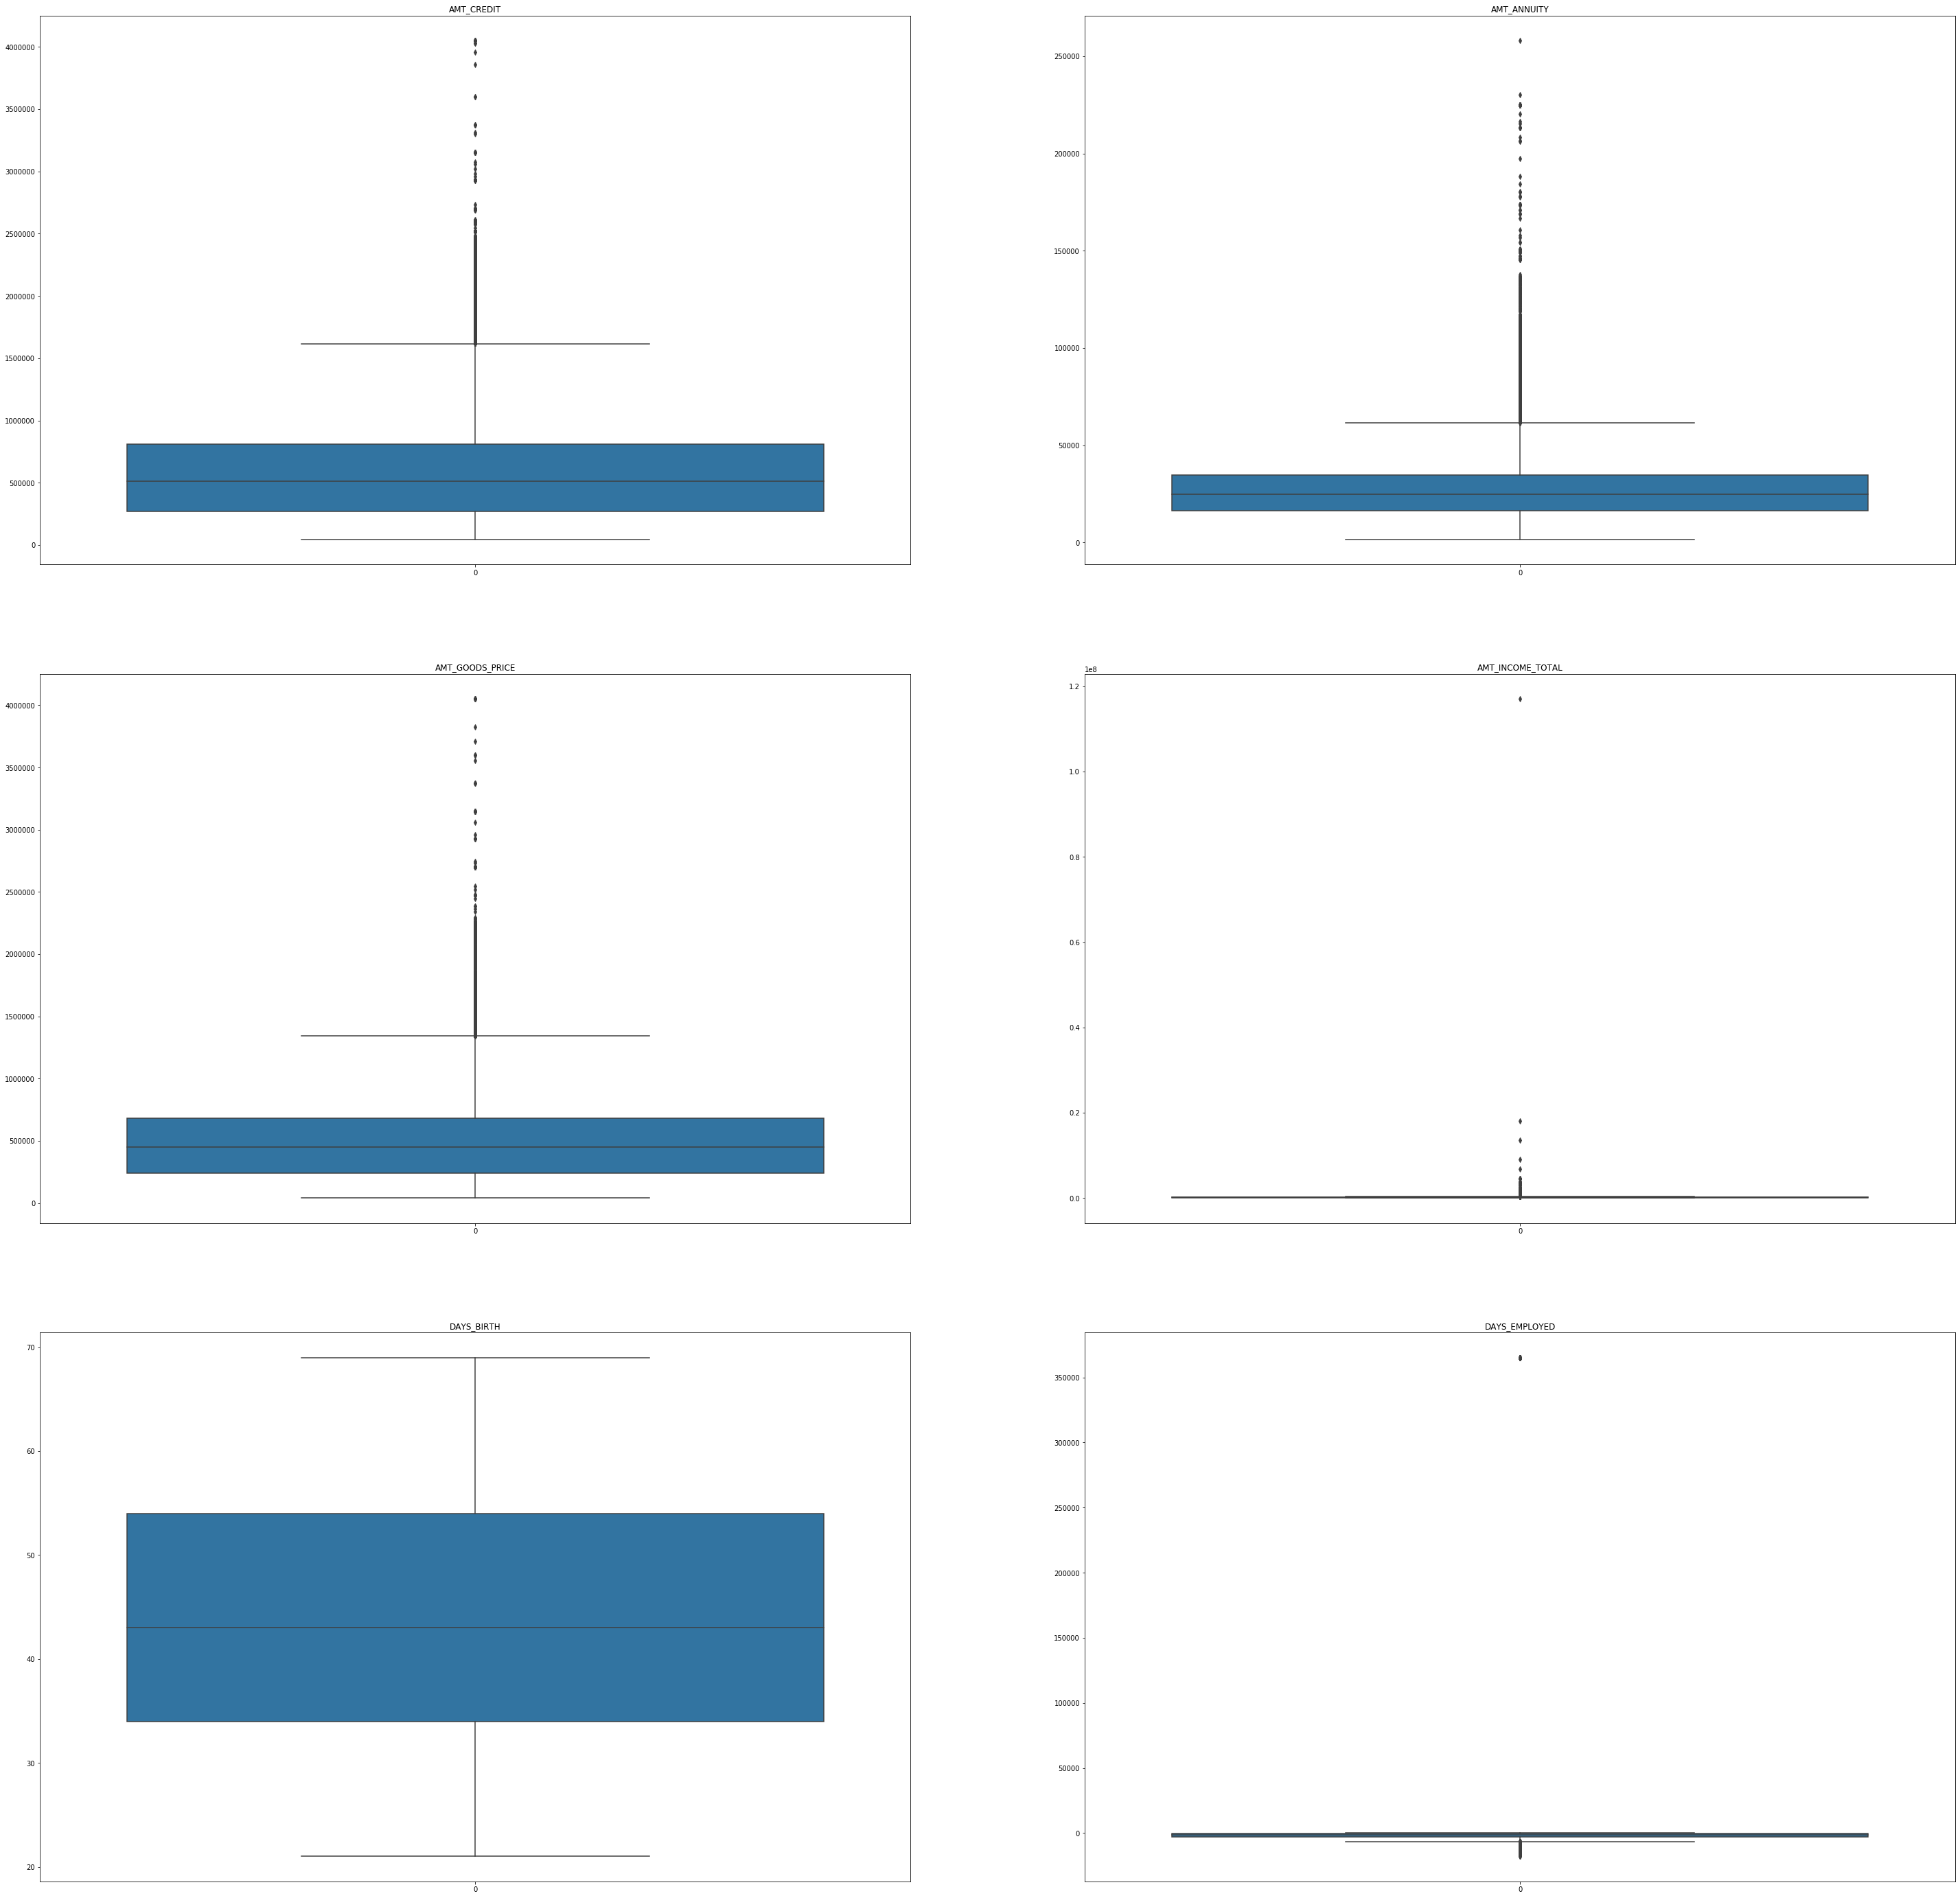

In [32]:
### We will use boxplots to handle the outliers on AMT_CREDIT, AMT_ANNUITY, AMT_GOODS_PRICE
fig, axes = plt.subplots(nrows=3, ncols = 2, figsize=(50,50))

sns.boxplot(data= applicationDataAfterDroppedColumns.AMT_CREDIT.dropna(), ax=axes[0][0])
axes[0][0].set_title('AMT_CREDIT')

sns.boxplot(data= applicationDataAfterDroppedColumns.AMT_ANNUITY.dropna(), ax=axes[0][1])
axes[0][1].set_title('AMT_ANNUITY')

sns.boxplot(data= applicationDataAfterDroppedColumns.AMT_GOODS_PRICE.dropna(), ax=axes[1][0])
axes[1][0].set_title('AMT_GOODS_PRICE')

sns.boxplot(data= applicationDataAfterDroppedColumns.AMT_INCOME_TOTAL.dropna(), ax=axes[1][1])
axes[1][1].set_title('AMT_INCOME_TOTAL')

sns.boxplot(data= applicationDataAfterDroppedColumns.DAYS_BIRTH.dropna(), ax=axes[2][0])
axes[2][0].set_title('DAYS_BIRTH')

sns.boxplot(data= applicationDataAfterDroppedColumns.DAYS_EMPLOYED.dropna(), ax=axes[2][1])
axes[2][1].set_title('DAYS_EMPLOYED')

plt.show()

### Observation
We can easily see in the box plot that there are so many outliers which has to removed for the better calculation. So, In the next part of the code we remove outliers from the function "remove_outliers" which accept dataframe and columns name (In which we want to remove outliers) as argument and return the outliers removed dataframe.

Analysing outliers in Numeric variables and Handling/Treating them with appropriate methods.

-  AMT_REQ_CREDIT_BUREAU_HOUR (99.4% of the values are 0.0  with value '4' and '3' being outliers. Should be retained) 

Considering that its the number of enquiries made by the company to credit bureau, this could significantly mean that the company was extremely cautious in making a decision of whether to grant loan/credit to this particular client or not. This might imply that it could be a case of 'High Risk' client and can influence the Target variable. Its better to retain these outlier values

-  AMT_INCOME_TOTAL ( Clearly 117000000.0 is an outlier here.)

The above oulier can be dropped in order to not skew with the analysis. We can use IQR to remove this value. 

-  DAYS_BIRTH ( There is no outlier in this column)  

-  DAYS_EMPLOYED ( Clearly 1001 is an outlier here and should be deleted.18% of the column values are 1001)

Clearly 1001 is an outlier here. 18% of the column values are 1001. Since , this represents the no. of years of employement as on the application date, these should be deleted. Though values above 40 years till 49 years of employment seems questionable as well but lets not drop it for now considering exception cases.
Another way to see the distribution of is using a distribution plot.


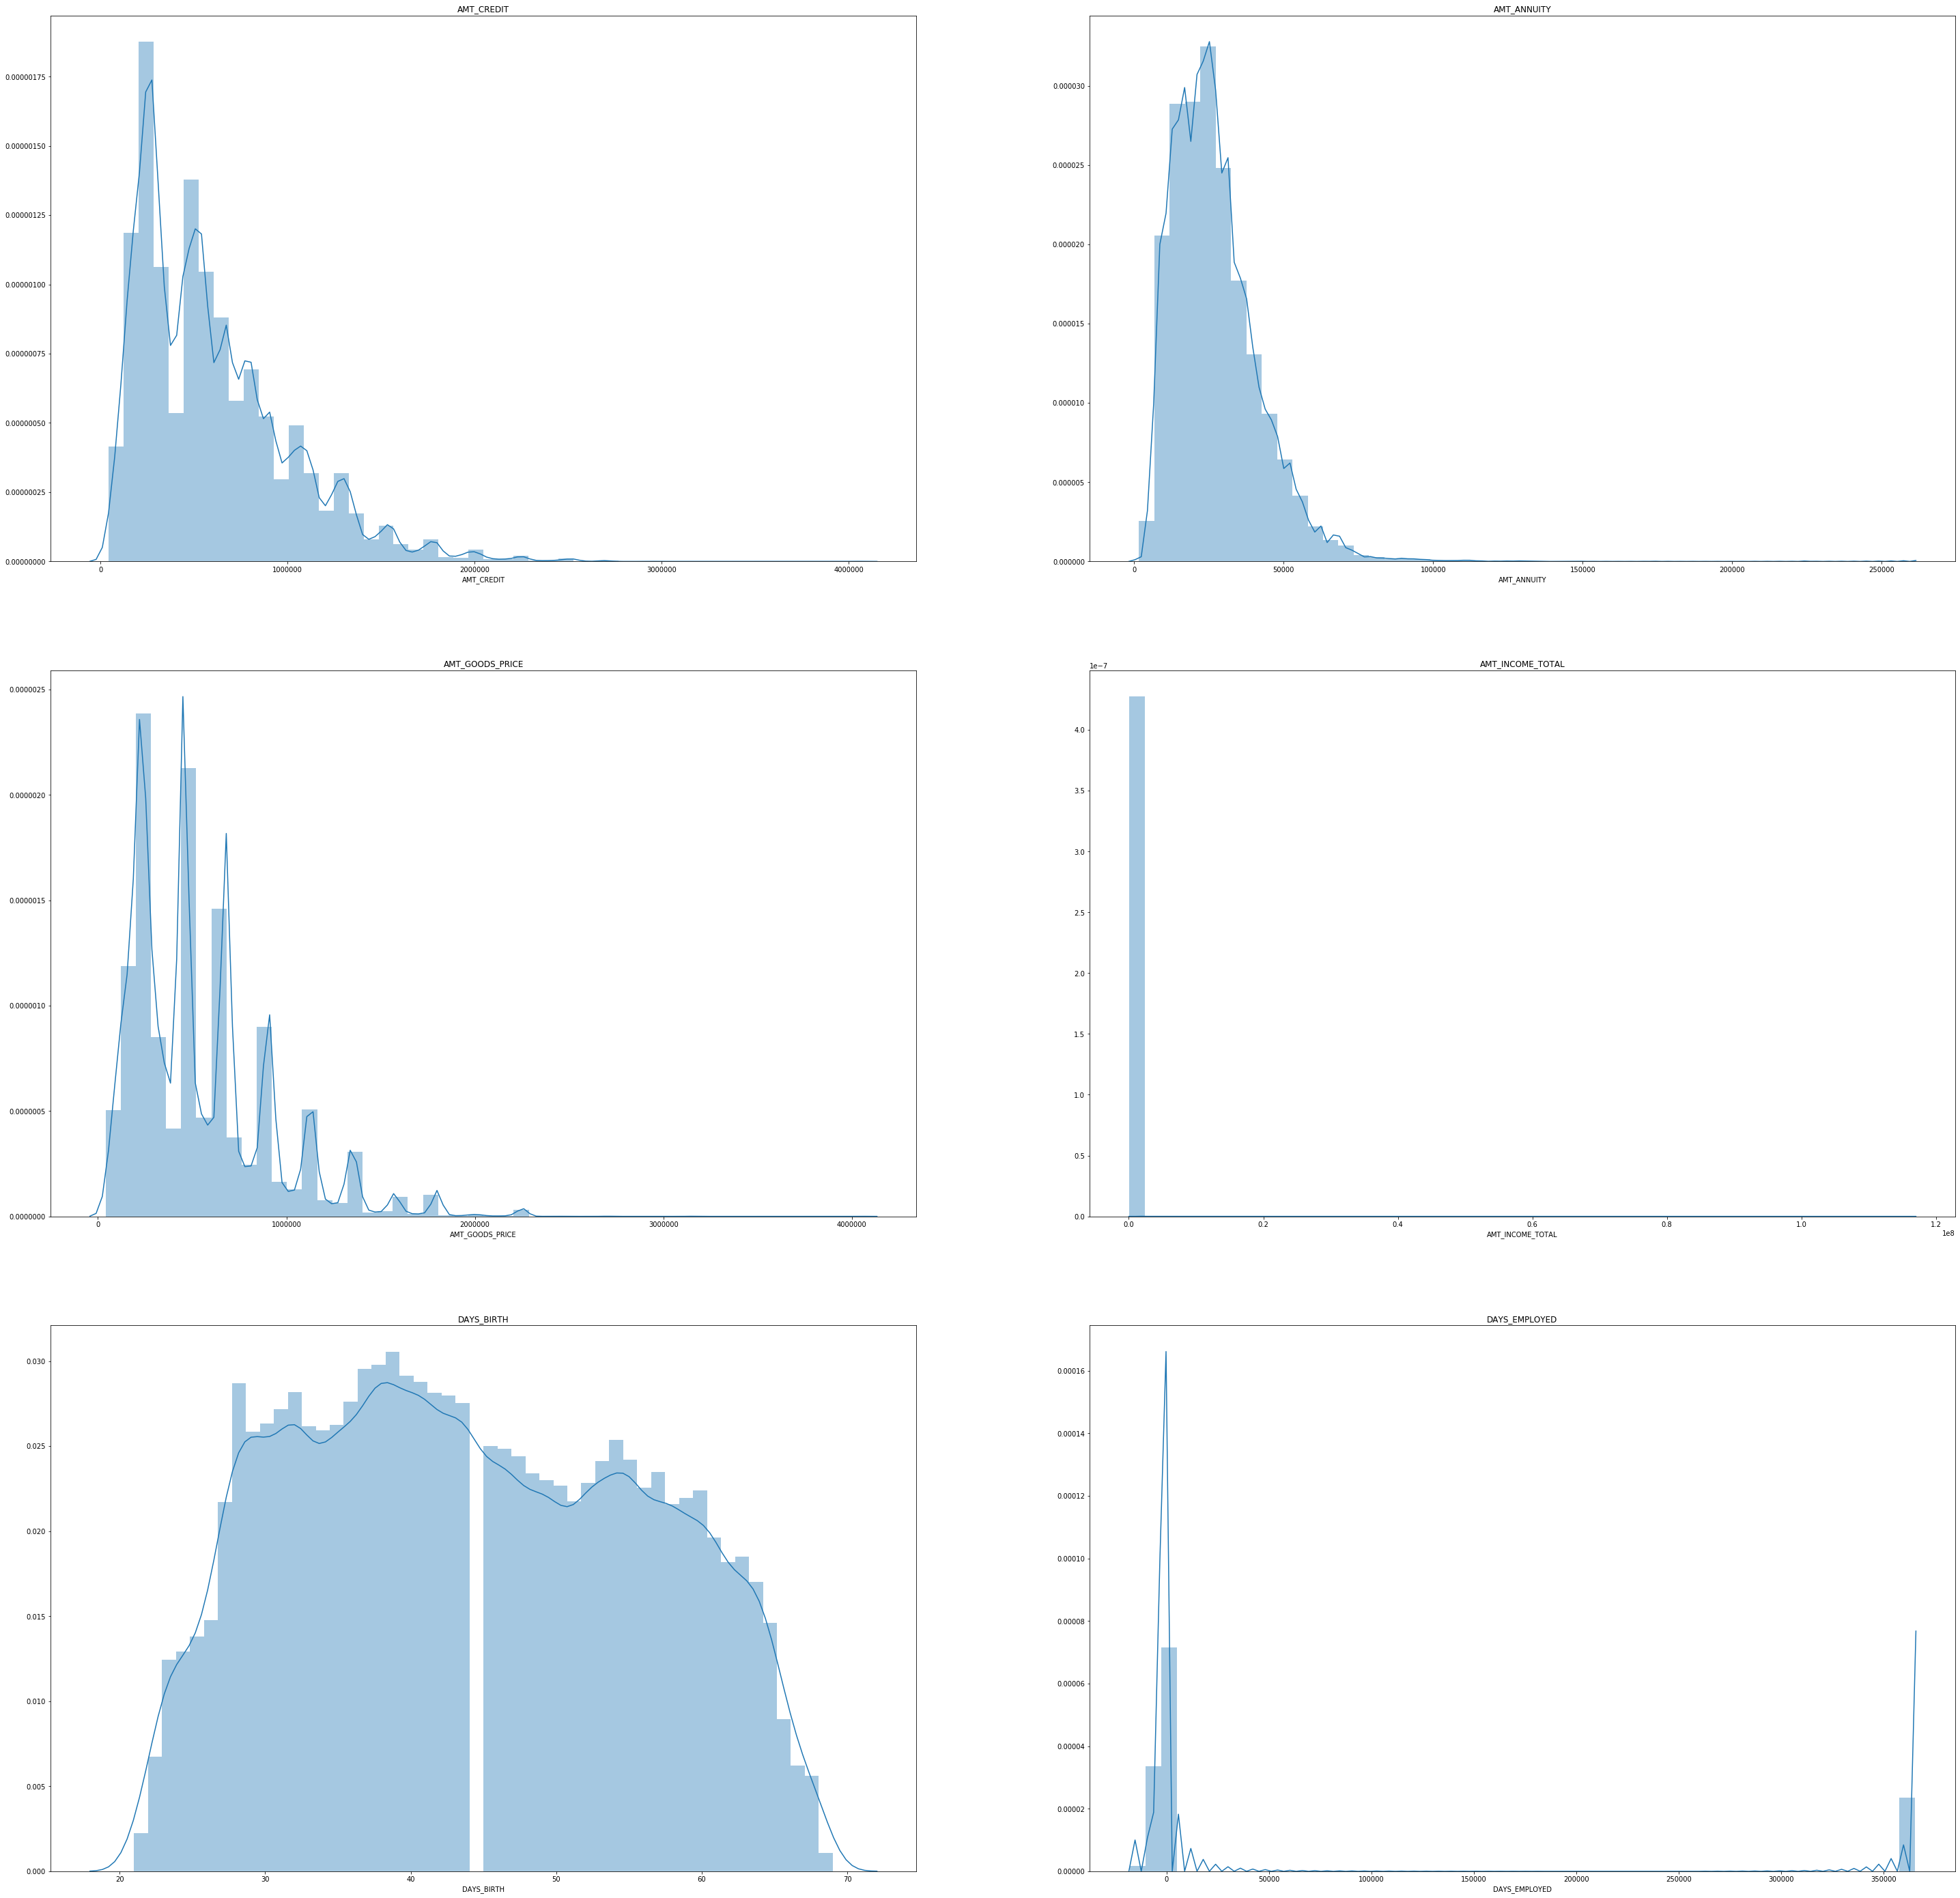

In [33]:
fig, axes = plt.subplots(nrows=3, ncols = 2, figsize=(50,50))

sns.distplot(applicationDataAfterDroppedColumns.AMT_CREDIT.dropna(), ax=axes[0][0])
axes[0][0].set_title('AMT_CREDIT')

sns.distplot(applicationDataAfterDroppedColumns.AMT_ANNUITY.dropna(), ax=axes[0][1])
axes[0][1].set_title('AMT_ANNUITY')

sns.distplot(applicationDataAfterDroppedColumns.AMT_GOODS_PRICE.dropna(), ax=axes[1][0])
axes[1][0].set_title('AMT_GOODS_PRICE')

sns.distplot(applicationDataAfterDroppedColumns.AMT_INCOME_TOTAL.dropna(), ax=axes[1][1])
axes[1][1].set_title('AMT_INCOME_TOTAL')

sns.distplot(applicationDataAfterDroppedColumns.DAYS_BIRTH.dropna(), ax=axes[2][0])
axes[2][0].set_title('DAYS_BIRTH')

sns.distplot(applicationDataAfterDroppedColumns.DAYS_EMPLOYED.dropna(), ax=axes[2][1])
axes[2][1].set_title('DAYS_EMPLOYED')
plt.show()

### Observation
As you can see from the distplots above there are a few outliers that aren't properly normalized.
The 'DAYS_EMPLOYED' column is heavily skewed in the -ve side of the plot. 

In [34]:
#Function for removing outliers

def remove_outlier(df, col_name):
    q1 = df[col_name].quantile(0.25)
    q3 = df[col_name].quantile(0.75)
    iqr = q3-q1 #Interquartile range
    l  = q1-1.5*iqr
    h = q3+1.5*iqr
    dfOutput = df.loc[(df[col_name] > l) & (df[col_name] < h)]
    return dfOutput

In [35]:
cols=['AMT_CREDIT','AMT_ANNUITY', 'AMT_GOODS_PRICE', 'AMT_INCOME_TOTAL', 'DAYS_EMPLOYED']

for i in cols:
    applicationDataAfterDroppedColumns=remove_outlier(applicationDataAfterDroppedColumns,i)
    
applicationDataAfterDroppedColumns.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,LANDAREA_AVG,LIVINGAREA_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,LANDAREA_MODE,LIVINGAREA_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,LANDAREA_MEDI,LIVINGAREA_MEDI,NONLIVINGAREA_MEDI,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,26.0,-637,-3648.0,-2120,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.00,0.0690,0.0833,0.0369,0.0190,0.0000,0.0252,0.0383,0.9722,0.0000,0.0690,0.0833,0.0377,0.0198,0.0,0.0250,0.0369,0.9722,0.00,0.0690,0.0833,0.0375,0.0193,0.00,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,46.0,-1188,-1186.0,-291,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.08,0.0345,0.2917,0.0130,0.0549,0.0098,0.0924,0.0538,0.9851,0.0806,0.0345,0.2917,0.0128,0.0554,0.0,0.0968,0.0529,0.9851,0.08,0.0345,0.2917,0.0132,0.0558,0.01,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,52.0,-225,-4260.0,-2531,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,-815.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,52.0,-3039,-9833.0,-2437,1,1,0,1,0,0,Laborers,2.0,2,2,WEDNESDAY,17,0,0,0,0,0,0,Business Entity Type 3,NaN,0.650442,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,0.0,2.0,0.0,-617.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,N

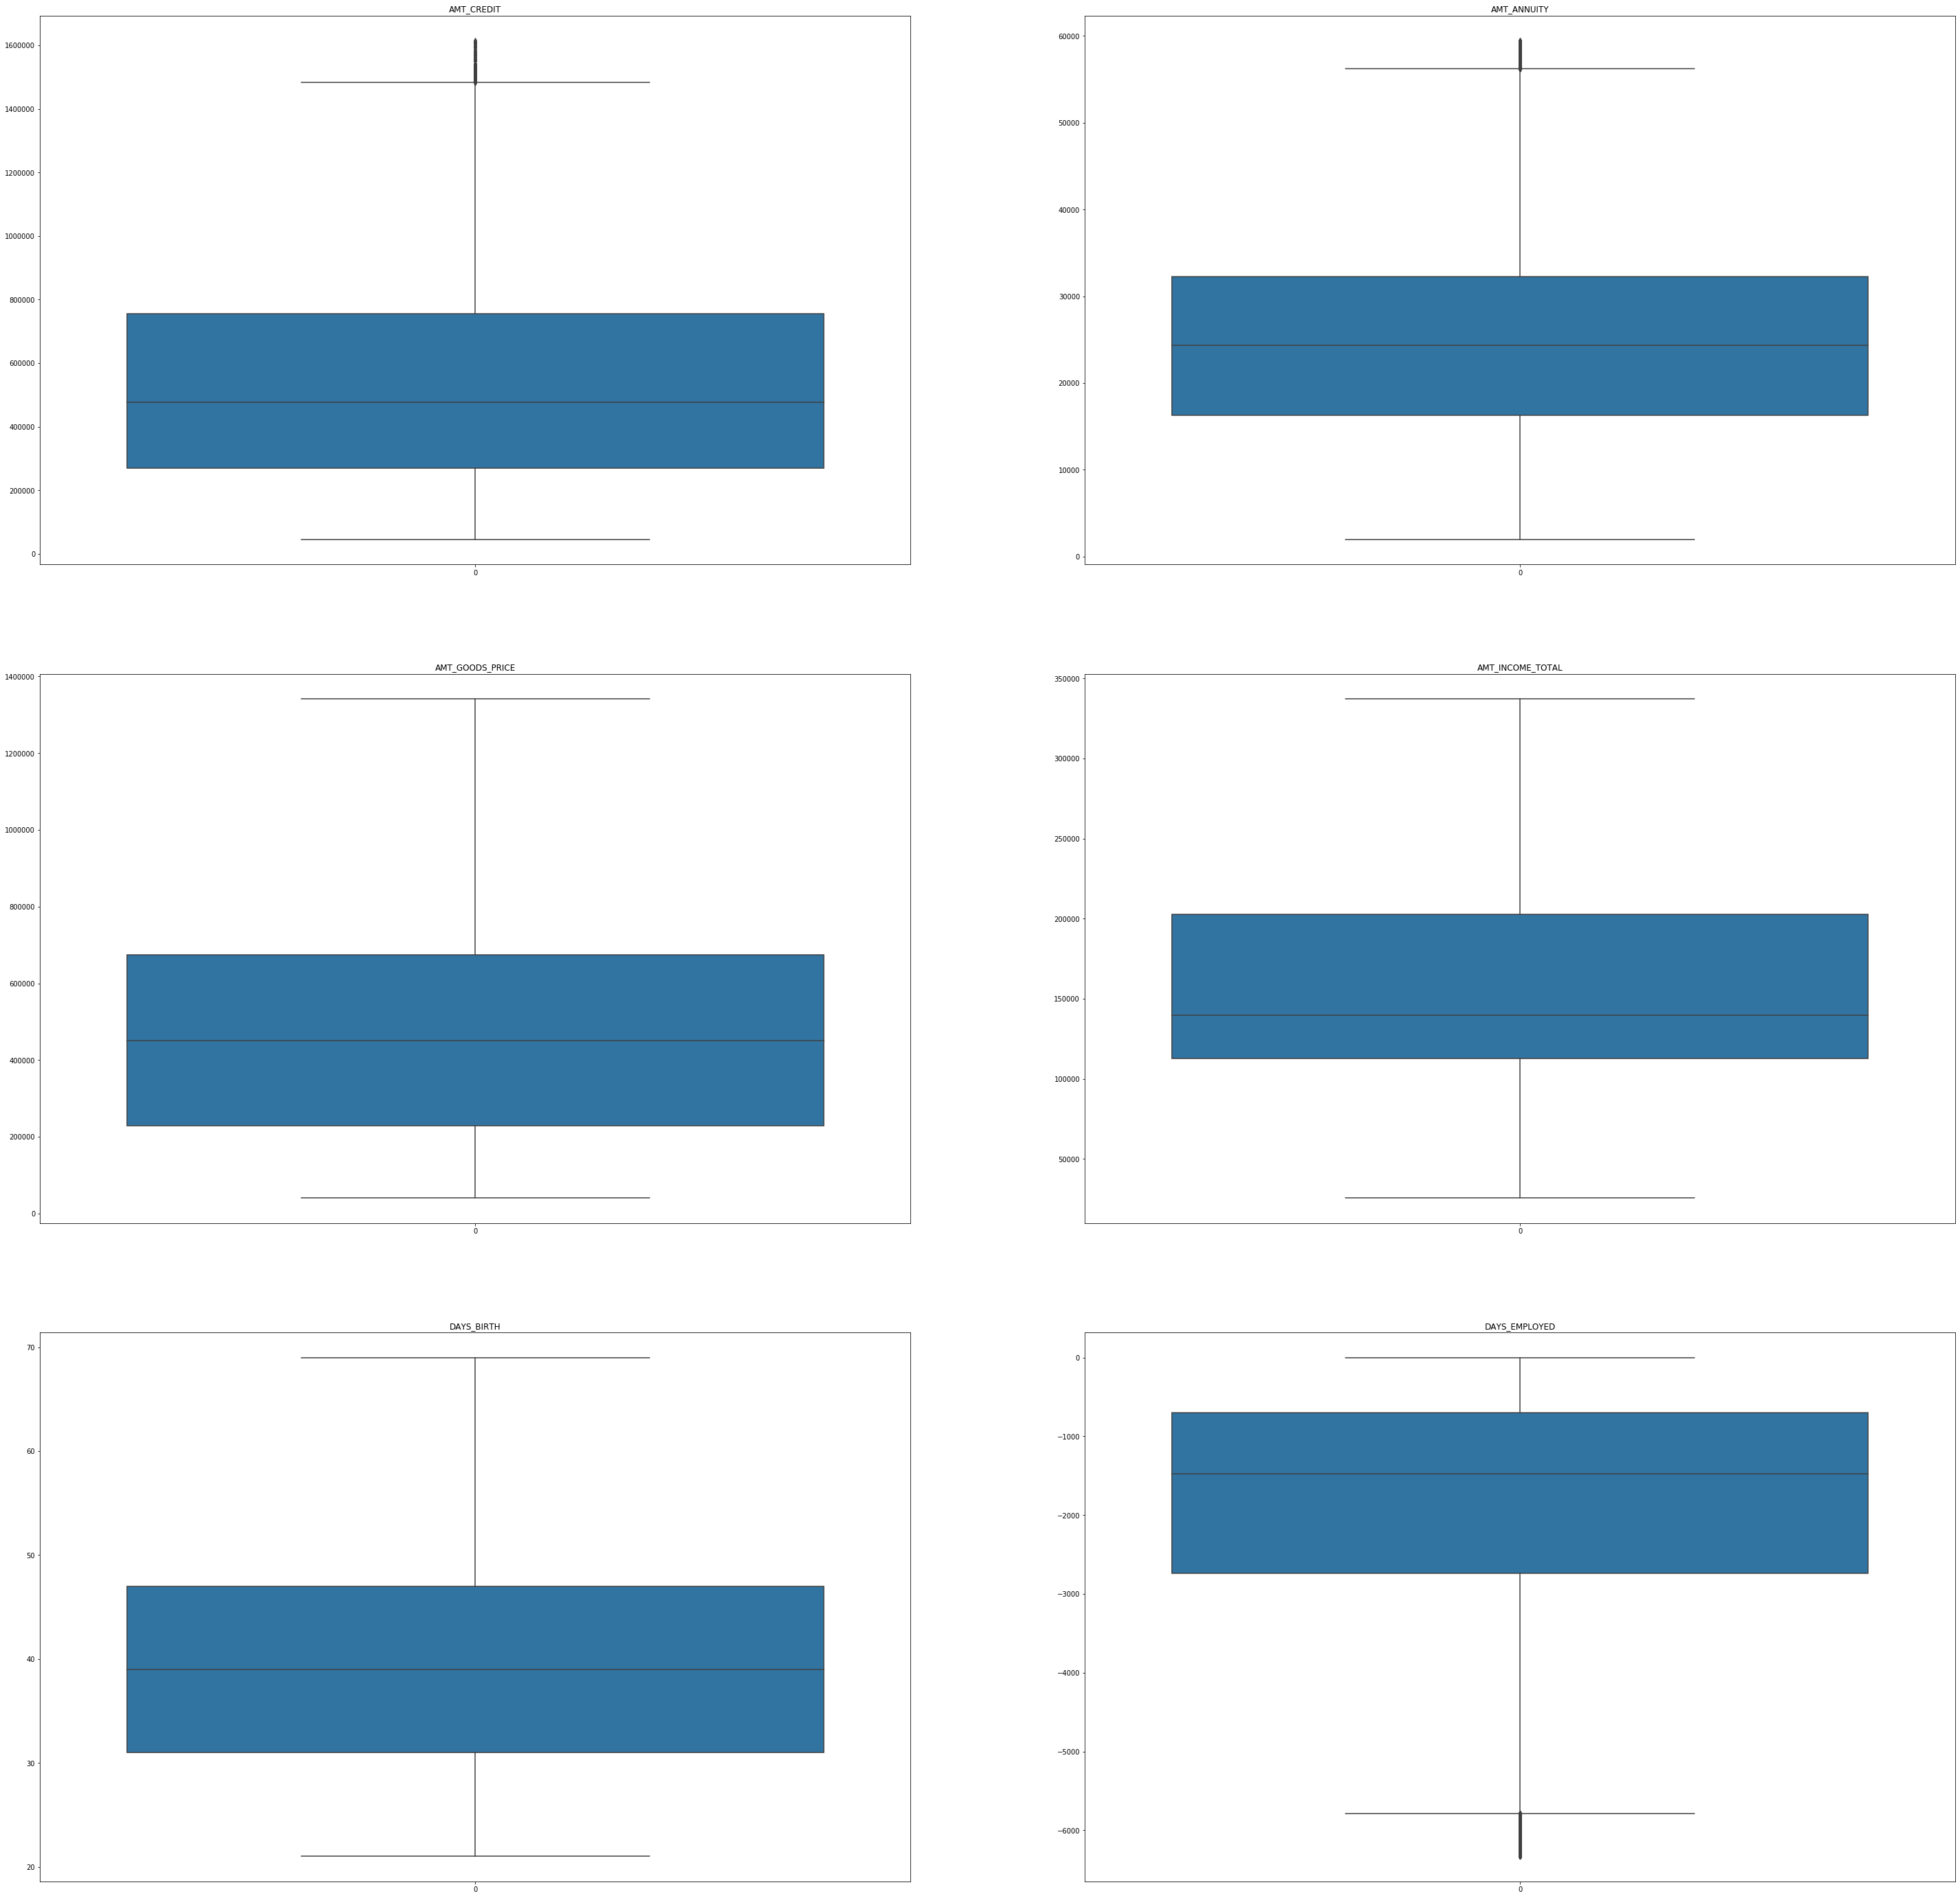

In [36]:
### Plot the box plot again after removing outliers
fig, axes = plt.subplots(nrows=3, ncols = 2, figsize=(50,50))

sns.boxplot(data= applicationDataAfterDroppedColumns.AMT_CREDIT.dropna(), ax=axes[0][0])
axes[0][0].set_title('AMT_CREDIT')

sns.boxplot(data= applicationDataAfterDroppedColumns.AMT_ANNUITY.dropna(), ax=axes[0][1])
axes[0][1].set_title('AMT_ANNUITY')

sns.boxplot(data= applicationDataAfterDroppedColumns.AMT_GOODS_PRICE.dropna(), ax=axes[1][0])
axes[1][0].set_title('AMT_GOODS_PRICE')

sns.boxplot(data= applicationDataAfterDroppedColumns.AMT_INCOME_TOTAL.dropna(), ax=axes[1][1])
axes[1][1].set_title('AMT_INCOME_TOTAL')

sns.boxplot(data= applicationDataAfterDroppedColumns.DAYS_BIRTH.dropna(), ax=axes[2][0])
axes[2][0].set_title('DAYS_BIRTH')

sns.boxplot(data= applicationDataAfterDroppedColumns.DAYS_EMPLOYED.dropna(), ax=axes[2][1])
axes[2][1].set_title('DAYS_EMPLOYED')

plt.show()

### Observation
After dropping the outliers we observe that there very few  points mentioned on the box plots above for the outliers.

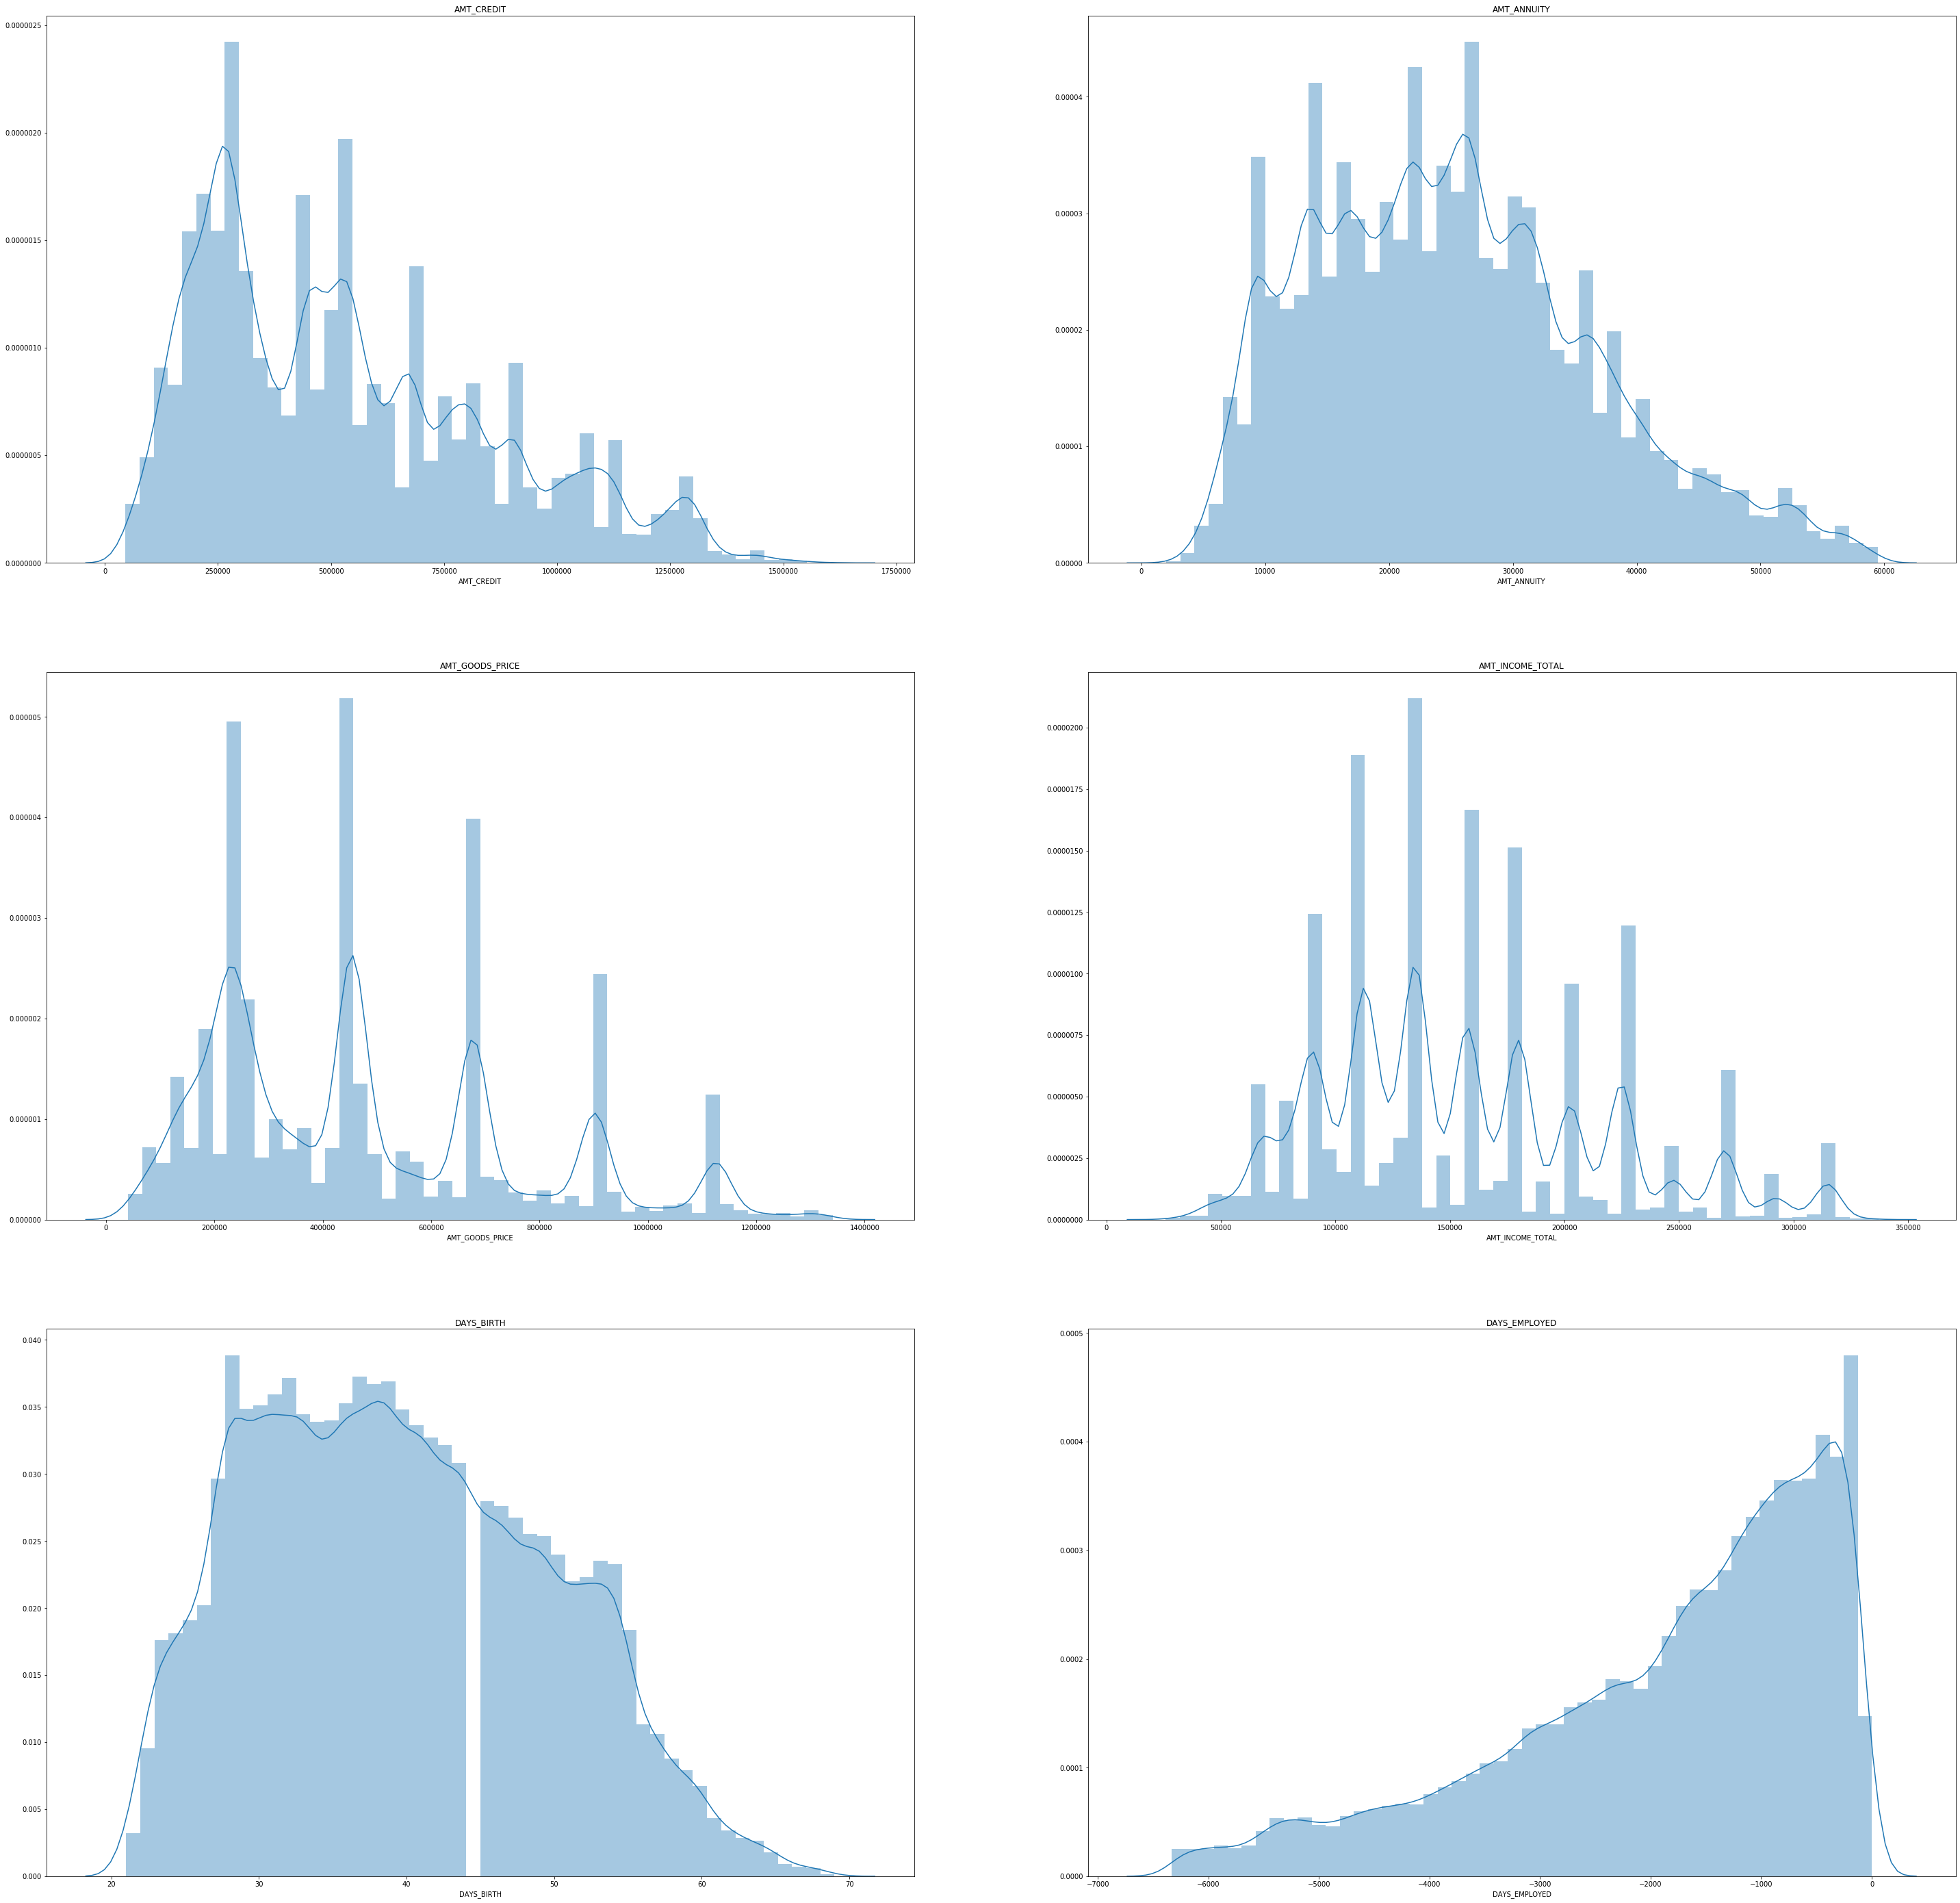

In [37]:
### Plotting the distribution plot after removing the outliers
fig, axes = plt.subplots(nrows=3, ncols = 2, figsize=(50,50))

sns.distplot(applicationDataAfterDroppedColumns.AMT_CREDIT.dropna(), ax=axes[0][0])
axes[0][0].set_title('AMT_CREDIT')

sns.distplot(applicationDataAfterDroppedColumns.AMT_ANNUITY.dropna(), ax=axes[0][1])
axes[0][1].set_title('AMT_ANNUITY')

sns.distplot(applicationDataAfterDroppedColumns.AMT_GOODS_PRICE.dropna(), ax=axes[1][0])
axes[1][0].set_title('AMT_GOODS_PRICE')

sns.distplot(applicationDataAfterDroppedColumns.AMT_INCOME_TOTAL.dropna(), ax=axes[1][1])
axes[1][1].set_title('AMT_INCOME_TOTAL')

sns.distplot(applicationDataAfterDroppedColumns.DAYS_BIRTH.dropna(), ax=axes[2][0])
axes[2][0].set_title('DAYS_BIRTH')

sns.distplot(applicationDataAfterDroppedColumns.DAYS_EMPLOYED.dropna(), ax=axes[2][1])
axes[2][1].set_title('DAYS_EMPLOYED')
plt.show()

### Observation
Based on the distplots above you can see that there is a marked difference between the minimum values for various columns, particularly the DAYS_EMPLOYED column where the minimum value increased from -7500 to -6000. This proves that the treatment of outliers was succesful

In [38]:
applicationDataAfterDroppedColumns.shape

(209624, 105)

### Observation
We observe that after removing the outliers the boxplots show a slight shift in the maximum ranges. 
The distribution plot gives us a more significant display in changes. There is a significant reduction in the max ranges on the x-axis for all the three variables we chose. 


As we can see above, after treating the outliers for various columns the shape of our dataset has changed significantly. The shape of the dataframe after dropping columns with high number of null values was (307511, 105) & after treating for outliers is (209624, 105).

Let us now create bins for 3 different continous variables and plot them. We will use AMT_INCOME_TOTAL, AMT_CREDIT & DAYS_BIRTH to create our bins.

Text(0, 0.5, 'Count')

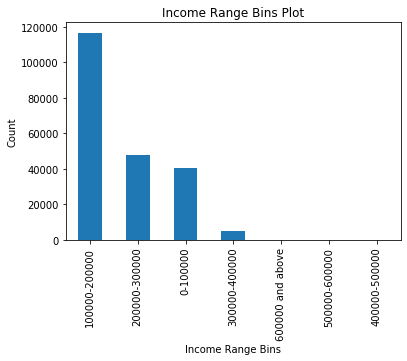

In [39]:
## Creating bins for Income range based on AMT_INCOME_TOTAL
bins=[0,100000,200000,300000,400000,500000,600000,20000000]
range_period=['0-100000','100000-200000','200000-300000','300000-400000','400000-500000','500000-600000','600000 and above']
applicationDataAfterDroppedColumns['Income_amount_range']=pd.cut(applicationDataAfterDroppedColumns['AMT_INCOME_TOTAL'],bins,labels=range_period)
plotIncomeAmountRange = applicationDataAfterDroppedColumns['Income_amount_range'].value_counts().plot(kind='bar', title='Income Range Bins Plot')
plotIncomeAmountRange.set_xlabel('Income Range Bins')
plotIncomeAmountRange.set_ylabel('Count')

### Observation
As you can clearly see from the plot above:

- The most number of people earn between 100000-200000
- The number of people who earn between 200000-300000 is less than half of the number of people in 100000-200000 range
- No one earns above 300000.

Text(0, 0.5, 'Count')

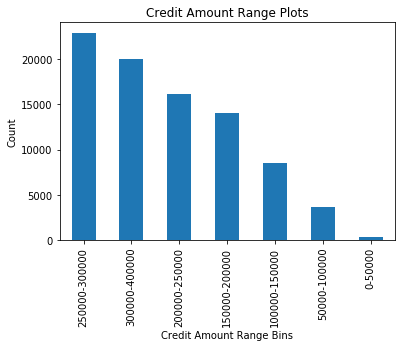

In [40]:
#create bins for credit anount

bins=[0,50000,100000,150000,200000,250000,300000,400000]
range_period=['0-50000','50000-100000','100000-150000','150000-200000','200000-250000','250000-300000','300000-400000']
applicationDataAfterDroppedColumns['credit_amount_range']=pd.cut(applicationDataAfterDroppedColumns['AMT_CREDIT'],bins,labels=range_period)
plotCreditAmountRange = applicationDataAfterDroppedColumns['credit_amount_range'].value_counts().plot(kind='bar', title='Credit Amount Range Plots')
plotCreditAmountRange.set_xlabel('Credit Amount Range Bins')
plotCreditAmountRange.set_ylabel('Count')

### Observation
As you can see from the plots above

- Very less number of people borrow money between 0-50000
- Highest number of people are borrowing money between 250000-300000

Text(0, 0.5, 'Count')

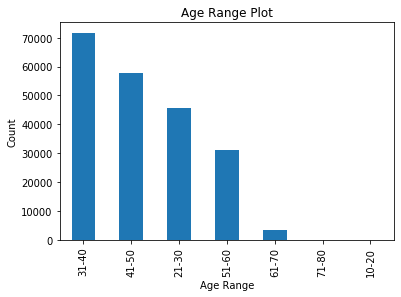

In [41]:
##Creating bins for age range for DAYS_BIRTH in years

bins = [10, 20, 30, 40, 50, 60, 70, 80]
labels = ['10-20','21-30','31-40','41-50','51-60','61-70','71-80']

applicationDataAfterDroppedColumns['BINNED_AGE'] = pd.cut(applicationDataAfterDroppedColumns['DAYS_BIRTH'], bins=bins,labels=labels)
plotAgeRange = applicationDataAfterDroppedColumns['BINNED_AGE'].value_counts().plot(kind='bar', title='Age Range Plot')
plotAgeRange.set_xlabel('Age Range')
plotAgeRange.set_ylabel('Count')

### Observation
- People between the ages of 71-80 & 10-20 are not borrowing any money.
- For people in the age range of 10-20, no borrowing could suggest that children/teenagers/young adults could have just opened new bank accounts with their parents or have just joined university so do not have a need of borrowing money
- People in between the ages of 31-40 have a significantly higher number of borrowers, this could be suggestive of various personal expenses & it would be beneficial for the firm to identify the reasons why they are borrowing more so that they can introduce newer products at more competitive interest rates to these customers

# 4. Data Analysis

In this section we will perform indepth analysis on the application_data.csv file.
This will be achieved by:

- Checking the imbalance percentage in the dataset
- Dividing the dataset based on the "TARGET" column into 2 separate dataframes
- Performing univariate analysis for categorical variables on both Target = 0 & Target = 1 columns
- Identifying the correlation between the numerical columns for both Target = 0 & Target = 1 columns
- Comparing the results across continous variables
- Performing bivariate analysis for numerical variables on both Target = 0 & Target = 1 columns

## Selecting relevant columns from 'applicationDataAfterDroppedColumns' which would be used for EDA further

- Selecting only the relevant columns(25 or so) from 'applicationDataAfterDroppedColumns' i.e. removing those columns which aren't relevant for analysis out of a total of 105 columns

In [42]:
applicationDataWithRelevantColumns = applicationDataAfterDroppedColumns.loc[:,['SK_ID_CURR',
'TARGET',
'NAME_CONTRACT_TYPE',
'CODE_GENDER',
'FLAG_OWN_CAR',
'FLAG_OWN_REALTY',
'CNT_CHILDREN',
'AMT_INCOME_TOTAL',
'AMT_CREDIT',
'AMT_ANNUITY',
'AMT_GOODS_PRICE',
'NAME_INCOME_TYPE',
'NAME_EDUCATION_TYPE',
'NAME_FAMILY_STATUS',
'NAME_HOUSING_TYPE',
'REGION_POPULATION_RELATIVE',
'BINNED_AGE',
'DAYS_EMPLOYED',
'DAYS_REGISTRATION',
'DAYS_ID_PUBLISH',
'FLAG_CONT_MOBILE',
'OCCUPATION_TYPE',
'CNT_FAM_MEMBERS',
'REGION_RATING_CLIENT',
'REGION_RATING_CLIENT_W_CITY',
'ORGANIZATION_TYPE',
'AMT_REQ_CREDIT_BUREAU_HOUR',
'AMT_REQ_CREDIT_BUREAU_DAY']]

We will now use applicationDataWithRelevantColumns as our dataframe to run further analysis

In [43]:
### Checking shape of the new dataframe
applicationDataWithRelevantColumns.shape

(209624, 28)

In [44]:
applicationDataWithRelevantColumns['CODE_GENDER'].value_counts()

F      130954
M       78667
XNA         3
Name: CODE_GENDER, dtype: int64

Since the number of Females is higher than Males, we can safely impute XNA values with F.

In [45]:
applicationDataWithRelevantColumns.loc[applicationDataWithRelevantColumns['CODE_GENDER']=='XNA','CODE_GENDER']='F'
applicationDataWithRelevantColumns['CODE_GENDER'].value_counts()

F      130957
M       78667
XNA         0
Name: CODE_GENDER, dtype: int64

In [46]:
#Check the total percentage of target value as 0 and 1.
imbalancePercentage = applicationDataWithRelevantColumns['TARGET'].value_counts()*100/len(applicationDataAfterDroppedColumns)
imbalancePercentage

0    90.612239
1     9.387761
Name: TARGET, dtype: float64

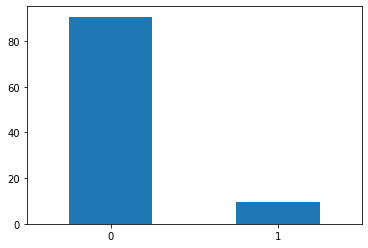

In [47]:
imbalancePercentage.plot(kind='bar',rot=0)

### Observation
We can easily see that this data is very much imbalance. Rows with target value 0 is only 90.612239% and with 1 is only 9.387761%.
This also means that only 9.38% of all the loan applicants default while paying back their loans.

In [48]:
#Splitting the data based on target values

one_df = applicationDataWithRelevantColumns.loc[applicationDataWithRelevantColumns['TARGET']==1]
zero_df = applicationDataWithRelevantColumns.loc[applicationDataWithRelevantColumns['TARGET']==0]

In [49]:
## Inspecting data with TARGET = 1
one_df.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,BINNED_AGE,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_CONT_MOBILE,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,ORGANIZATION_TYPE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,21-30,-637,-3648.0,-2120,1,Laborers,1.0,2,2,Business Entity Type 3,0,0.0
26,100031,1,Cash loans,F,N,Y,0,112500.0,979992.0,27076.5,702000.0,Working,Secondary / secondary special,Widow,House / apartment,0.018029,51-60,-2628,-6573.0,-1827,1,Cooking staff,1.0,3,2,Business Entity Type 3,0,0.0
40,100047,1,Cash loans,M,N,Y,0,202500.0,1193580.0,35028.0,855000.0,Commercial associate,Secondary / secondary special,Married,House / apartment,0.025164,41-50,-1262,-1182.0,-1029,1,Laborers,2.0,2,2,Business Entity Type 3,0,0.0
42,100049,1,Cash loans,F,N,N,0,135000.0,288873.0,16258.5,238500.0,Working,Secondary / secondary special,Civil marriage,House / apartment,0.007305,31-40,-3597,-45.0,-4409,1,Sales staff,2.0,3,3,Self-employed,0,0.0
110,100130,1,Cash loans,F,N,Y,1,157500.0,723996.0,30802.5,585000.0,Commercial associate,Incomplete higher,Separated,House / apartment,0.007274,21-30,-267,-387.0,-3190,1,Sales staff,2.0,2,2,Trade: type 2,0,0.0


In [50]:
one_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19679 entries, 0 to 307509
Data columns (total 28 columns):
SK_ID_CURR                     19679 non-null int64
TARGET                         19679 non-null category
NAME_CONTRACT_TYPE             19679 non-null category
CODE_GENDER                    19679 non-null category
FLAG_OWN_CAR                   19679 non-null category
FLAG_OWN_REALTY                19679 non-null category
CNT_CHILDREN                   19679 non-null int64
AMT_INCOME_TOTAL               19679 non-null float64
AMT_CREDIT                     19679 non-null float64
AMT_ANNUITY                    19679 non-null float64
AMT_GOODS_PRICE                19679 non-null float64
NAME_INCOME_TYPE               19679 non-null object
NAME_EDUCATION_TYPE            19679 non-null category
NAME_FAMILY_STATUS             19679 non-null object
NAME_HOUSING_TYPE              19679 non-null object
REGION_POPULATION_RELATIVE     19679 non-null float64
BINNED_AGE                 

In [51]:
one_df.shape

(19679, 28)

In [52]:
## Inspecting data with TARGET = 0
zero_df.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,BINNED_AGE,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_CONT_MOBILE,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,ORGANIZATION_TYPE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,State servant,Higher education,Married,House / apartment,0.003541,41-50,-1188,-1186.0,-291,1,Core staff,2.0,1,1,School,0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,51-60,-225,-4260.0,-2531,1,Laborers,1.0,2,2,Government,0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,51-60,-3039,-9833.0,-2437,1,Laborers,2.0,2,2,Business Entity Type 3,0,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,51-60,-3038,-4311.0,-3458,1,Core staff,1.0,2,2,Religion,0,0.0
5,100008,0,Cash loans,M,N,Y,0,99000.0,490495.5,27517.5,454500.0,State servant,Secondary / secondary special,Married,House / apartment,0.035792,41-50,-1588,-4970.0,-477,1,Laborers,2.0,2,2,Other,0,0.0


In [53]:
zero_df.describe

<bound method NDFrame.describe of         SK_ID_CURR TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
1           100003      0         Cash loans           F            N   
2           100004      0    Revolving loans           M            Y   
3           100006      0         Cash loans           F            N   
4           100007      0         Cash loans           M            N   
5           100008      0         Cash loans           M            N   
...            ...    ...                ...         ...          ...   
307500      456244      0         Cash loans           F            N   
307501      456245      0         Cash loans           F            N   
307503      456247      0         Cash loans           F            N   
307506      456251      0         Cash loans           M            N   
307510      456255      0         Cash loans           F            N   

       FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  \
1                  

In [54]:
zero_df.shape

(189945, 28)

In [55]:
zero_df.info

<bound method DataFrame.info of         SK_ID_CURR TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
1           100003      0         Cash loans           F            N   
2           100004      0    Revolving loans           M            Y   
3           100006      0         Cash loans           F            N   
4           100007      0         Cash loans           M            N   
5           100008      0         Cash loans           M            N   
...            ...    ...                ...         ...          ...   
307500      456244      0         Cash loans           F            N   
307501      456245      0         Cash loans           F            N   
307503      456247      0         Cash loans           F            N   
307506      456251      0         Cash loans           M            N   
307510      456255      0         Cash loans           F            N   

       FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  \
1                    

We will now use the following columns to perform Univariate & Bivariate analysis
- CODE_GENDER
- NAME_CONTRACT_TYPE
- NAME_INCOME_TYPE
- NAME_EDUCATION_TYPE
- NAME_FAMILY_STATUS
- NAME_HOUSING_TYPE
- OCCUPATION_TYPE
- ORGANIZATION_TYPE

### Univariate Analysis:-

Univariate Analysis on one_df dataset

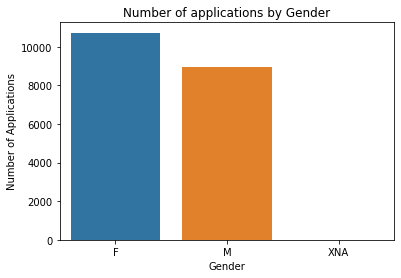

In [56]:
#Univariate Analysis for categorical variable 'CODE_GENDER' in dataframe one_df.

sns.countplot(x ='CODE_GENDER', data = one_df)


plt.title('Number of applications by Gender')
plt.ylabel('Number of Applications')
plt.xlabel('Gender')
plt.show()

### Observation
As you can see above the number of Female applicants is higher than the number of Male applicants.

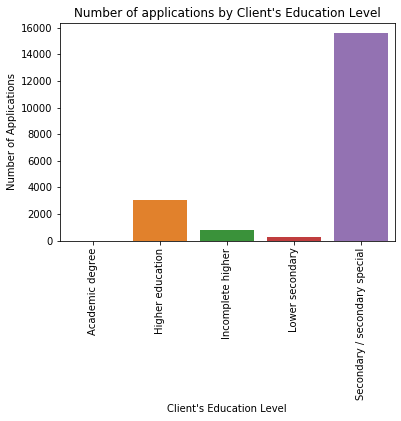

In [57]:
#Univariate Analysis for categorical variable 'NAME_EDUCATION_TYPE' in dataframe T1.

sns.countplot(x ='NAME_EDUCATION_TYPE', data = one_df)


plt.title("Number of applications by Client's Education Level")
plt.ylabel('Number of Applications')
plt.xlabel("Client's Education Level")
plt.xticks(rotation = 90)
plt.show()

### Observation
From the plot above we can infer that:

- The highest number of applications for credit were made by people having Secondary/ secondary special education and these people defaulted on being able to pay back their loans. This could mean that they face trouble in being able to manage their money effectively or have jobs that pay less/are contractual in nature
- People with higher education also applied for a credit and defaulted on their loans

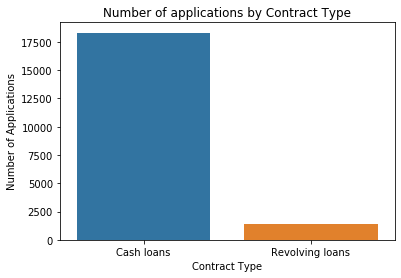

In [58]:
#Univariate Analysis for categorical variable 'NAME_CONTRACT_TYPE' in dataframe one_df.

sns.countplot(x ='NAME_CONTRACT_TYPE', data = one_df)

plt.title('Number of applications by Contract Type')
plt.ylabel('Number of Applications')
plt.xlabel('Contract Type')
plt.show()


### Observation

- A high number of applicants who defaulted applied for cash loans

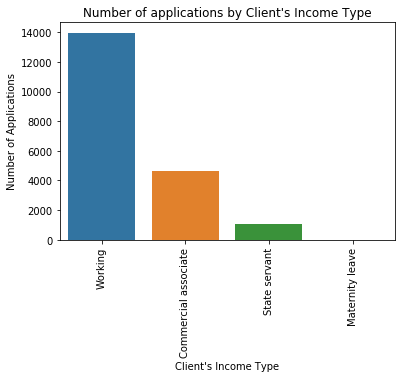

In [59]:
#Univariate Analysis for categorical variable 'NAME_INCOME_TYPE' in dataframe one_df.

sns.countplot(x ='NAME_INCOME_TYPE', data = one_df)

plt.title("Number of applications by Client's Income Type")
plt.ylabel('Number of Applications')
plt.xlabel("Client's Income Type")
plt.xticks(rotation = 90)
plt.show()


### Observation

- Mostly working professionals apply for credit and are also the ones that default on being able to payback the loans on time
- State servants have a very low number of defaulters

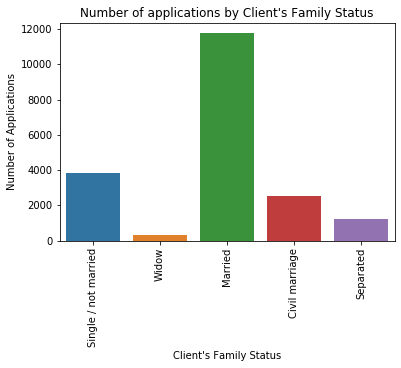

In [60]:
#Univariate Analysis for categorical variable 'NAME_FAMILY_STATUS' in dataframe one_df.

sns.countplot(x ='NAME_FAMILY_STATUS', data = one_df)


plt.title("Number of applications by Client's Family Status")
plt.ylabel('Number of Applications')
plt.xlabel("Client's Family Status")
plt.xticks(rotation = 90)
plt.show()

### Observation

- Married applicants make a higher number of applications as compared to other categories
- It would be beneficial for the bank to introduce newer products for people in such a category to attract more customers

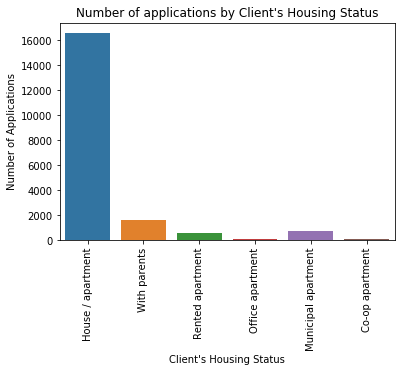

In [61]:
#Univariate Analysis for categorical variable 'NAME_HOUSING_TYPE' in dataframe one_df.

sns.countplot(x ='NAME_HOUSING_TYPE', data = one_df)


plt.title("Number of applications by Client's Housing Status")
plt.ylabel('Number of Applications')
plt.xlabel("Client's Housing Status")
plt.xticks(rotation = 90)
plt.show()


### Observation

- People who live in their own apartment/house apply for loans almost 160 times more than those who live with their parents.
- People living in office apartments default significantly less. This could be because their houses are rent free or they pay minimum charges to live in the house.


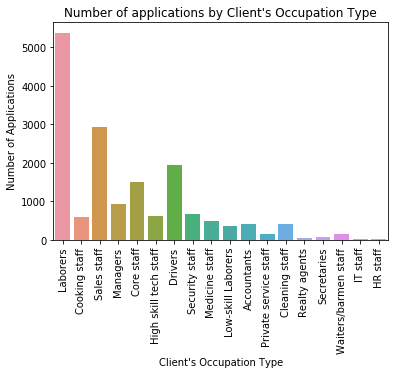

In [62]:
#Univariate Analysis for categorical variable 'OCCUPATION_TYPE' in dataframe one_df.

sns.countplot(x ='OCCUPATION_TYPE', data = one_df)


plt.title("Number of applications by Client's Occupation Type")
plt.ylabel('Number of Applications')
plt.xlabel("Client's Occupation Type")
plt.xticks(rotation = 90)
plt.show()


### Observation

- Labourers apply for a lot of loans and default on being able to repay them. This could be because of the contractual nature of their work and the unsetady + low income they might earn from their daily jobs
- IT & HR Staff make very few applications for credit and default the least on their loan applications. This could be, in stark contrast to the labourers, because of the stable job & salaried nature of their work. Thus enabling them to be better at handling monthly expenses. 

In [63]:
# Since there are subcategories like Type1,2 etc under few categories like Business Entity,Trade etc. 
# Because of this, there are a lot of categories making it difficult to analyse data
# Its better to remove the types and just have the main category there

one_df.ORGANIZATION_TYPE= one_df.ORGANIZATION_TYPE.replace("Business Entity Type 3", "Business Entity")
one_df.ORGANIZATION_TYPE= one_df.ORGANIZATION_TYPE.replace("Business Entity Type 2", "Business Entity")
one_df.ORGANIZATION_TYPE= one_df.ORGANIZATION_TYPE.replace("Business Entity Type 1", "Business Entity")

one_df.ORGANIZATION_TYPE= one_df.ORGANIZATION_TYPE.replace("Trade: type 7", "Trade")
one_df.ORGANIZATION_TYPE= one_df.ORGANIZATION_TYPE.replace("Trade: type 3", "Trade")
one_df.ORGANIZATION_TYPE= one_df.ORGANIZATION_TYPE.replace("Trade: type 2", "Trade")
one_df.ORGANIZATION_TYPE= one_df.ORGANIZATION_TYPE.replace("Trade: type 1", "Trade")
one_df.ORGANIZATION_TYPE= one_df.ORGANIZATION_TYPE.replace("Trade: type 6", "Trade")
one_df.ORGANIZATION_TYPE= one_df.ORGANIZATION_TYPE.replace("Trade: type 5", "Trade")
one_df.ORGANIZATION_TYPE= one_df.ORGANIZATION_TYPE.replace("Trade: type 4", "Trade")

one_df.ORGANIZATION_TYPE= one_df.ORGANIZATION_TYPE.replace("Transport: type 4", "Transport")
one_df.ORGANIZATION_TYPE= one_df.ORGANIZATION_TYPE.replace("Transport: type 3", "Transport")
one_df.ORGANIZATION_TYPE= one_df.ORGANIZATION_TYPE.replace("Transport: type 2", "Transport")
one_df.ORGANIZATION_TYPE= one_df.ORGANIZATION_TYPE.replace("Transport: type 1", "Transport")

one_df.ORGANIZATION_TYPE= one_df.ORGANIZATION_TYPE.replace("Industry: type 1", "Industry")
one_df.ORGANIZATION_TYPE= one_df.ORGANIZATION_TYPE.replace("Industry: type 2", "Industry")
one_df.ORGANIZATION_TYPE= one_df.ORGANIZATION_TYPE.replace("Industry: type 3", "Industry")
one_df.ORGANIZATION_TYPE= one_df.ORGANIZATION_TYPE.replace("Industry: type 4", "Industry")
one_df.ORGANIZATION_TYPE= one_df.ORGANIZATION_TYPE.replace("Industry: type 5", "Industry")
one_df.ORGANIZATION_TYPE= one_df.ORGANIZATION_TYPE.replace("Industry: type 6", "Industry")
one_df.ORGANIZATION_TYPE= one_df.ORGANIZATION_TYPE.replace("Industry: type 7", "Industry")
one_df.ORGANIZATION_TYPE= one_df.ORGANIZATION_TYPE.replace("Industry: type 8", "Industry")
one_df.ORGANIZATION_TYPE= one_df.ORGANIZATION_TYPE.replace("Industry: type 9", "Industry")
one_df.ORGANIZATION_TYPE= one_df.ORGANIZATION_TYPE.replace("Industry: type 10", "Industry")
one_df.ORGANIZATION_TYPE= one_df.ORGANIZATION_TYPE.replace("Industry: type 11", "Industry")
one_df.ORGANIZATION_TYPE= one_df.ORGANIZATION_TYPE.replace("Industry: type 12", "Industry")
one_df.ORGANIZATION_TYPE= one_df.ORGANIZATION_TYPE.replace("Industry: type 13", "Industry")

one_df['ORGANIZATION_TYPE'].value_counts()

Business Entity        6911
Self-employed          3665
Trade                  1217
Other                  1143
Industry               1108
Transport               761
Construction            714
Government              644
Medicine                612
School                  451
Kindergarten            433
Security                302
Agriculture             221
Housing                 209
Restaurant              200
Postal                  172
Bank                    118
Military                105
Services                 95
Police                   94
Security Ministries      79
University               56
Hotel                    56
Electricity              53
Realtor                  35
Telecom                  34
Emergency                33
Advertising              30
Cleaning                 29
Insurance                27
Mobile                   26
Legal Services           23
Culture                  19
Religion                  4
Name: ORGANIZATION_TYPE, dtype: int64

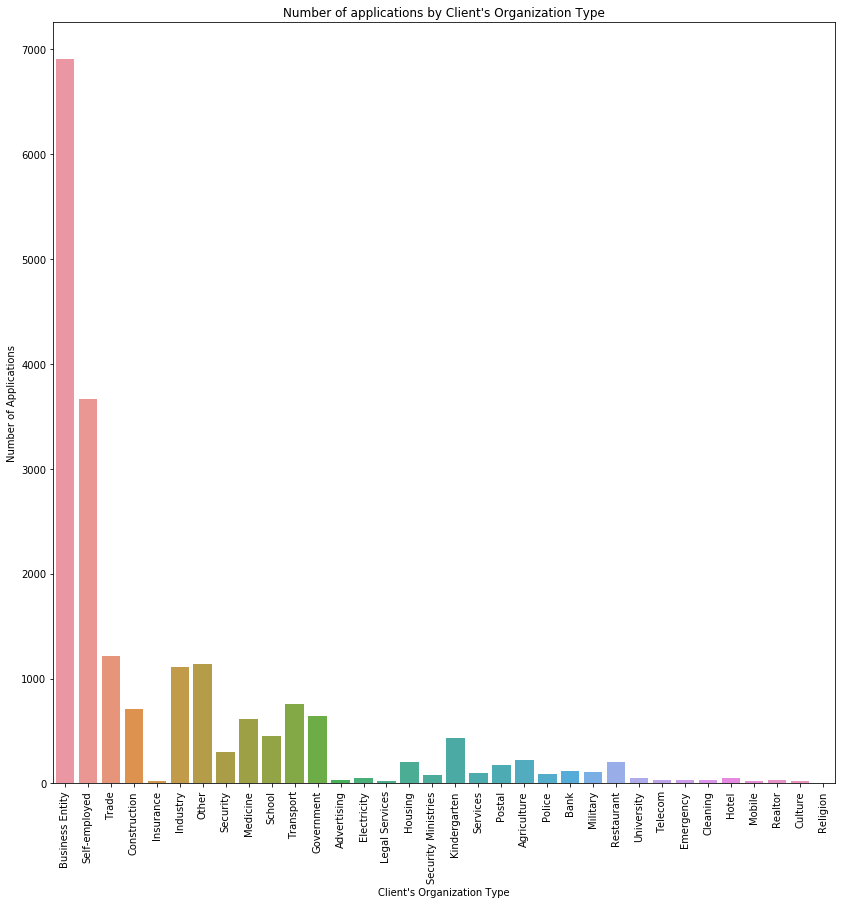

In [64]:
#Univariate Analysis for categorical variable 'ORGANIZATION_TYPE' in dataframe one_df.

plt.figure(figsize = (14,14))
sns.countplot(x ='ORGANIZATION_TYPE', data = one_df)

plt.title("Number of applications by Client's Organization Type")
plt.ylabel('Number of Applications')
plt.xlabel("Client's Organization Type")
plt.xticks(rotation = 90)
plt.show()

### Observation

- Based on the plot above we can see that Business Entity employees have the maximum number of loan applications
- Religious people, priests etc dont seem to be making any credit applications at all
- Self-employed people also make a lot of loan applications. This could be to boost their business or to repay other loans.

##### Univariate analysis for zero_df dataframe

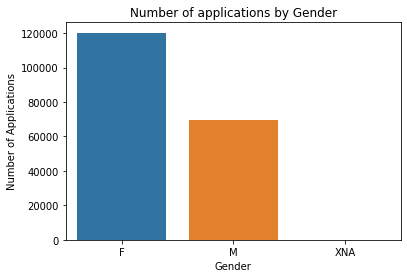

In [65]:
#Univariate Analysis for categorical variable 'CODE_GENDER' in dataframe zero_df.

sns.countplot(x ='CODE_GENDER', data = zero_df)


plt.title('Number of applications by Gender')
plt.ylabel('Number of Applications')
plt.xlabel('Gender')
plt.show()

### Observation
As you can see above the number of Female applicants is higher than the number of Male applicants.

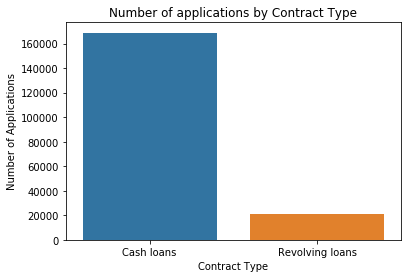

In [66]:
#Univariate Analysis for categorical variable 'NAME_CONTRACT_TYPE' in dataframe zero_df.

sns.countplot(x ='NAME_CONTRACT_TYPE', data = zero_df)


plt.title('Number of applications by Contract Type')
plt.ylabel('Number of Applications')
plt.xlabel('Contract Type')
plt.show()

### Observation

Applicants prefer to apply more for cash loans rather than revolving loans

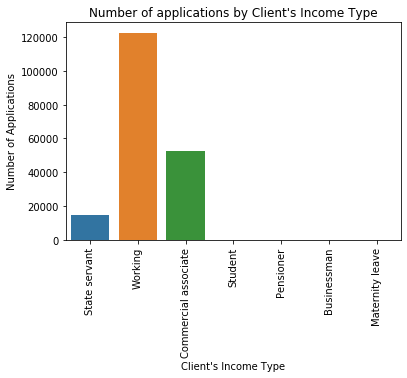

In [67]:
#Univariate Analysis for categorical variable 'NAME_INCOME_TYPE' in dataframe zero_df.

sns.countplot(x ='NAME_INCOME_TYPE', data = zero_df)


plt.title("Number of applications by Client's Income Type")
plt.ylabel('Number of Applications')
plt.xlabel("Client's Income Type")
plt.xticks(rotation = 90)
plt.show()


### Observation

- Working people make the most number of applications and are able to successfully repay their loans as well.
- Students, Pensioners, Business men and Maternity leave applicants is close to 0. This could be due to a multitude of reasons.

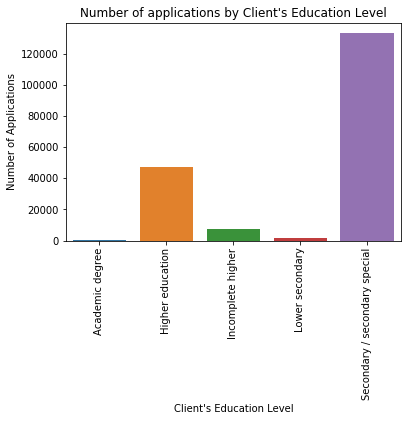

In [68]:
#Univariate Analysis for categorical variable 'NAME_EDUCATION_TYPE' in dataframe zero_df.

sns.countplot(x ='NAME_EDUCATION_TYPE', data = zero_df)


plt.title("Number of applications by Client's Education Level")
plt.ylabel('Number of Applications')
plt.xlabel("Client's Education Level")
plt.xticks(rotation = 90)
plt.show()

### Observation
From the plot above we can infer that:

- The highest number of applications for credit were made by people having Secondary/ secondary special education and these people did not default on being able to pay back their loans.
- People with higher education also applied for a credit and were able to repay them successfully

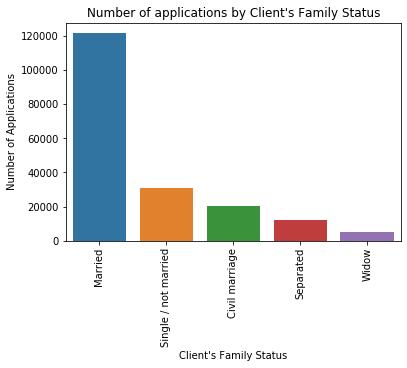

In [69]:
#Univariate Analysis for categorical variable 'NAME_FAMILY_STATUS' in dataframe zero_df.

sns.countplot(x ='NAME_FAMILY_STATUS', data = zero_df)


plt.title("Number of applications by Client's Family Status")
plt.ylabel('Number of Applications')
plt.xlabel("Client's Family Status")
plt.xticks(rotation = 90)
plt.show()

### Observation
From the plot above we can infer that:

- Married people apply for credit the most. 
- Married people are able to repay their loans without any defaults as well

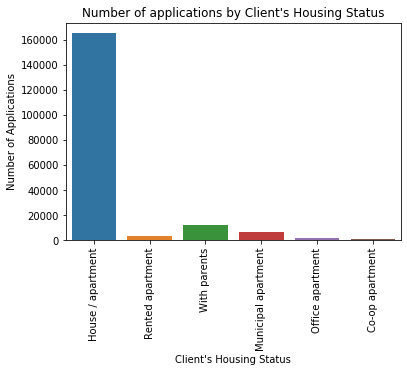

In [70]:
#Univariate Analysis for categorical variable 'NAME_HOUSING_TYPE' in dataframe zero_df.

sns.countplot(x ='NAME_HOUSING_TYPE', data = zero_df)


plt.title("Number of applications by Client's Housing Status")
plt.ylabel('Number of Applications')
plt.xlabel("Client's Housing Status")
plt.xticks(rotation = 90)
plt.show()

### Observation

- People who live in their own apartment/house apply for loans almost 160 times more than those who live with their parents.
- People living in office apartments apply for loans significantly less. This could be because their houses are rent free or they pay minimum charges to live in the house.
- People in rented apartments apply for loans significantly less. This could be due to the added expenses of paying rent and other utility bills leaves them with not enough capital to payback their loans.

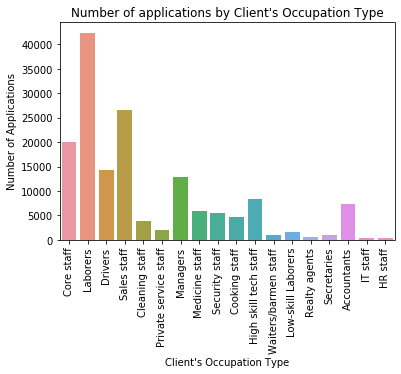

In [71]:
#Univariate Analysis for categorical variable 'OCCUPATION_TYPE' in dataframe zero_df.

sns.countplot(x ='OCCUPATION_TYPE', data = zero_df)


plt.title("Number of applications by Client's Occupation Type")
plt.ylabel('Number of Applications')
plt.xlabel("Client's Occupation Type")
plt.xticks(rotation = 90)
plt.show()

### Observation
- Labourers apply for a lot of loans.
- IT & HR Staff make very few applications for credit. This could be, in stark contrast to the labourers, because of the stable job & salaried nature of their work. Thus enabling them to be better at handling monthly expenses.

In [72]:
# Since there are subcategories like Type1,2 etc under few categories like Business Entity,Trade etc. 
# Because of this, there are a lot of categories making it difficult to analyse data
# Its better to remove the types and just have the main category there

zero_df.ORGANIZATION_TYPE= zero_df.ORGANIZATION_TYPE.replace("Business Entity Type 3", "Business Entity")
zero_df.ORGANIZATION_TYPE= zero_df.ORGANIZATION_TYPE.replace("Business Entity Type 2", "Business Entity")
zero_df.ORGANIZATION_TYPE= zero_df.ORGANIZATION_TYPE.replace("Business Entity Type 1", "Business Entity")

zero_df.ORGANIZATION_TYPE= zero_df.ORGANIZATION_TYPE.replace("Trade: type 7", "Trade")
zero_df.ORGANIZATION_TYPE= zero_df.ORGANIZATION_TYPE.replace("Trade: type 3", "Trade")
zero_df.ORGANIZATION_TYPE= zero_df.ORGANIZATION_TYPE.replace("Trade: type 2", "Trade")
zero_df.ORGANIZATION_TYPE= zero_df.ORGANIZATION_TYPE.replace("Trade: type 1", "Trade")
zero_df.ORGANIZATION_TYPE= zero_df.ORGANIZATION_TYPE.replace("Trade: type 6", "Trade")
zero_df.ORGANIZATION_TYPE= zero_df.ORGANIZATION_TYPE.replace("Trade: type 5", "Trade")
zero_df.ORGANIZATION_TYPE= zero_df.ORGANIZATION_TYPE.replace("Trade: type 4", "Trade")

zero_df.ORGANIZATION_TYPE= zero_df.ORGANIZATION_TYPE.replace("Transport: type 4", "Transport")
zero_df.ORGANIZATION_TYPE= zero_df.ORGANIZATION_TYPE.replace("Transport: type 3", "Transport")
zero_df.ORGANIZATION_TYPE= zero_df.ORGANIZATION_TYPE.replace("Transport: type 2", "Transport")
zero_df.ORGANIZATION_TYPE= zero_df.ORGANIZATION_TYPE.replace("Transport: type 1", "Transport")

zero_df.ORGANIZATION_TYPE= zero_df.ORGANIZATION_TYPE.replace("Industry: type 1", "Industry")
zero_df.ORGANIZATION_TYPE= zero_df.ORGANIZATION_TYPE.replace("Industry: type 2", "Industry")
zero_df.ORGANIZATION_TYPE= zero_df.ORGANIZATION_TYPE.replace("Industry: type 3", "Industry")
zero_df.ORGANIZATION_TYPE= zero_df.ORGANIZATION_TYPE.replace("Industry: type 4", "Industry")
zero_df.ORGANIZATION_TYPE= zero_df.ORGANIZATION_TYPE.replace("Industry: type 5", "Industry")
zero_df.ORGANIZATION_TYPE= zero_df.ORGANIZATION_TYPE.replace("Industry: type 6", "Industry")
zero_df.ORGANIZATION_TYPE= zero_df.ORGANIZATION_TYPE.replace("Industry: type 7", "Industry")
zero_df.ORGANIZATION_TYPE= zero_df.ORGANIZATION_TYPE.replace("Industry: type 8", "Industry")
zero_df.ORGANIZATION_TYPE= zero_df.ORGANIZATION_TYPE.replace("Industry: type 9", "Industry")
zero_df.ORGANIZATION_TYPE= zero_df.ORGANIZATION_TYPE.replace("Industry: type 10", "Industry")
zero_df.ORGANIZATION_TYPE= zero_df.ORGANIZATION_TYPE.replace("Industry: type 11", "Industry")
zero_df.ORGANIZATION_TYPE= zero_df.ORGANIZATION_TYPE.replace("Industry: type 12", "Industry")
zero_df.ORGANIZATION_TYPE= zero_df.ORGANIZATION_TYPE.replace("Industry: type 13", "Industry")

zero_df['ORGANIZATION_TYPE'].value_counts()

Business Entity        63733
Self-employed          30877
Other                  12398
Trade                  11494
Industry               10575
Government              7824
Medicine                7554
Transport               6538
School                  6067
Kindergarten            5223
Construction            4986
Security                2621
Housing                 2227
Bank                    1929
Agriculture             1753
Military                1736
Postal                  1613
Police                  1583
Restaurant              1461
Security Ministries     1394
Services                1270
University               906
Hotel                    760
Electricity              628
Insurance                450
Emergency                413
Telecom                  375
Advertising              316
Realtor                  271
Culture                  259
Mobile                   255
Cleaning                 215
Legal Services           176
Religion                  65
Name: ORGANIZA

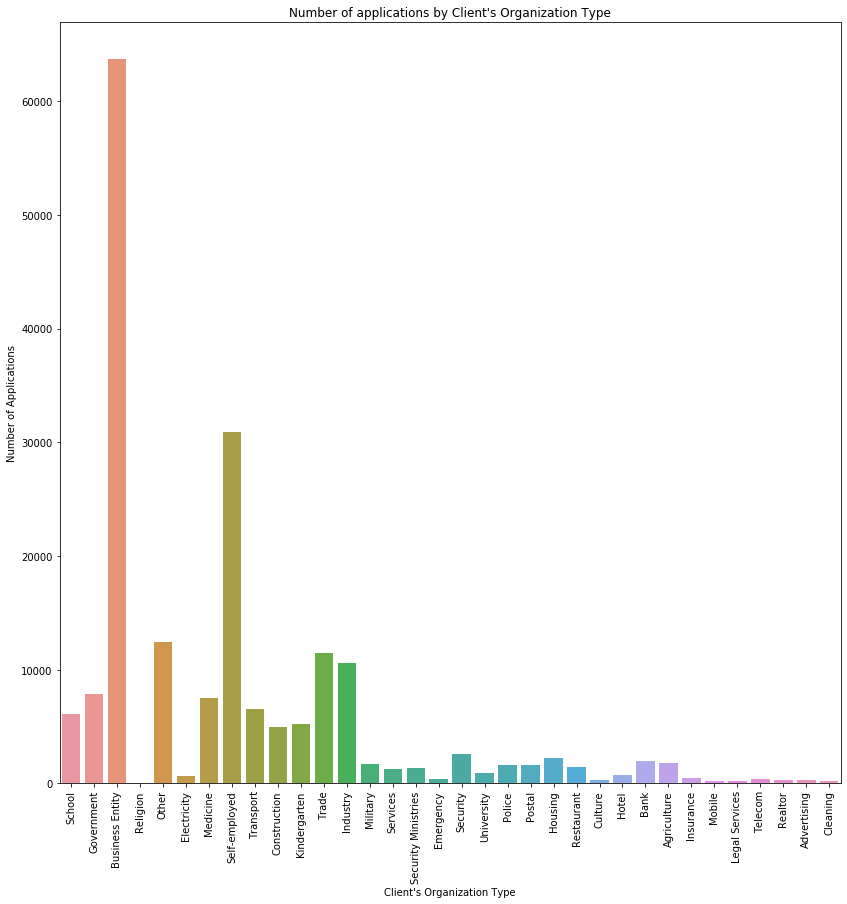

In [73]:
#Univariate Analysis for categorical variable 'ORGANIZATION_TYPE' in dataframe zero_df.

plt.figure(figsize = (14,14))
sns.countplot(x ='ORGANIZATION_TYPE', data = zero_df)


plt.title("Number of applications by Client's Organization Type")
plt.ylabel('Number of Applications')
plt.xlabel("Client's Organization Type")
plt.xticks(rotation = 90)
plt.show()

### Observation

- Based on the plot above we can see that Business Entity employees have the maximum number of loan applications
- Religious people, priests etc dont seem to be making a lot of credit applications at all. They are able to repay their loans on time as well. 
- Self-employed people also make a lot of loan applications. This could be to boost their business or to repay other loans.

### Bivariate Analysis for zero_df

In [74]:
### Let us create a helper function to help with
### plotting various graphs

def uniplot(df,col,title,hue =None):
    
    sns.set_style('whitegrid')
    sns.set_context('talk')
    plt.rcParams["axes.labelsize"] = 20
    plt.rcParams['axes.titlesize'] = 22
    plt.rcParams['axes.titlepad'] = 30
    plt.figure(figsize=(40,20))
    
    
    temp = pd.Series(data = hue)
    fig, ax = plt.subplots()
    width = len(df[col].unique()) + 7 + 4*len(temp.unique())
    fig.set_size_inches(width , 8)
    plt.xticks(rotation=45)
    plt.title(title)
    ax = sns.countplot(data = df, x= col, order=df[col].value_counts().index,hue = hue,
                       palette='magma') 
        
    plt.show()

<Figure size 2880x1440 with 0 Axes>

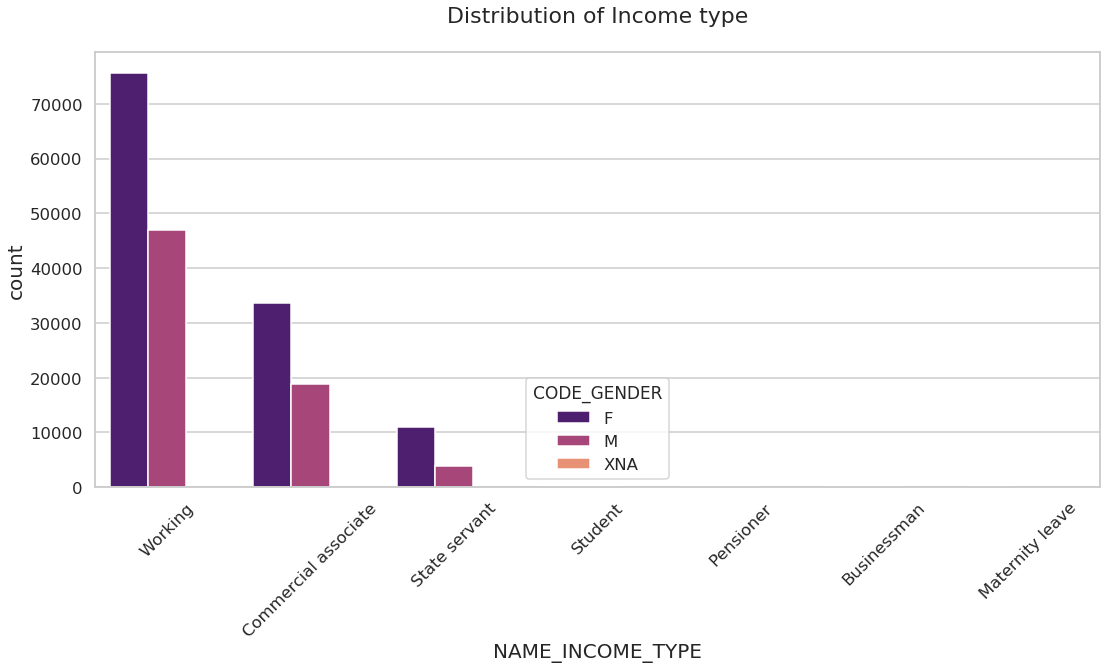

In [75]:
# PLotting for income range
uniplot(zero_df,col='NAME_INCOME_TYPE',title='Distribution of Income type',hue='CODE_GENDER')

### Observation 
- For income type ‘working’, ’commercial associate’, and ‘State Servant’ the number of credits are higher than others.
- For this Females are having more number of credit applications than males in all the categories.


<Figure size 2880x1440 with 0 Axes>

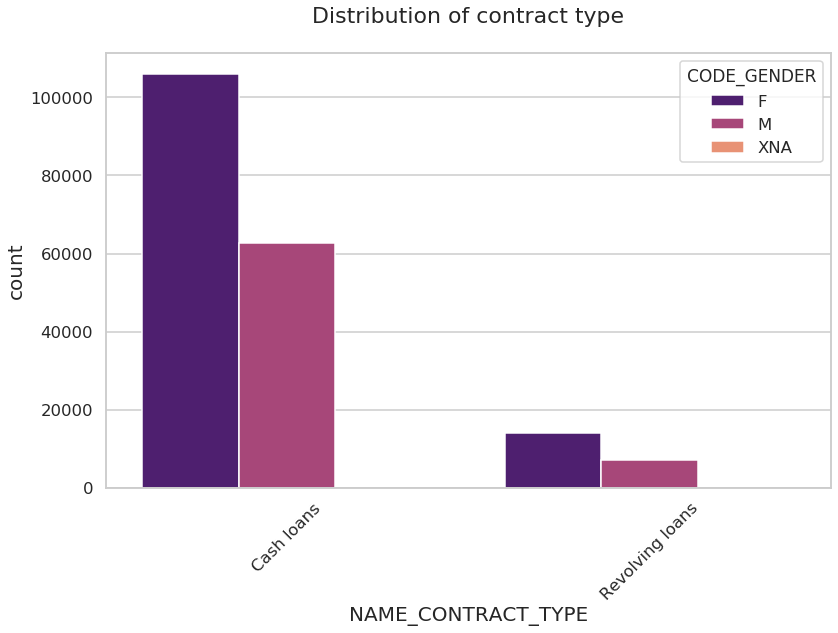

In [76]:
uniplot(zero_df,col='NAME_CONTRACT_TYPE',title='Distribution of contract type',hue='CODE_GENDER')

### Observation
- For contract type ‘cash loans’ is having higher number of credits than ‘Revolving loans’ contract type.
- For this also Females are applying for credit a lot more than males.


<Figure size 2880x1440 with 0 Axes>

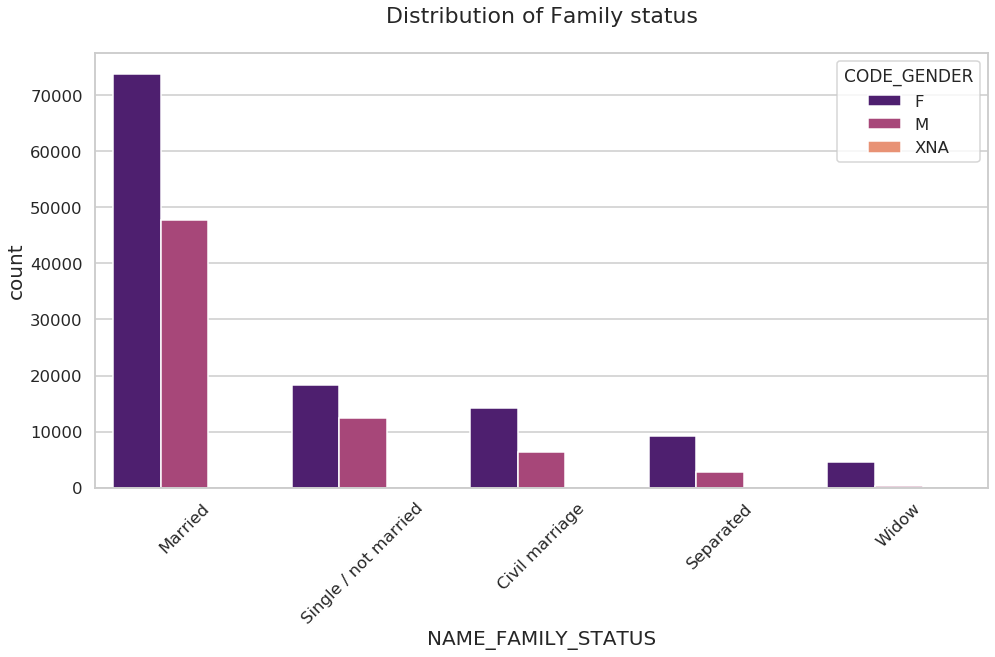

In [77]:
uniplot(zero_df,col='NAME_FAMILY_STATUS',title='Distribution of Family status',hue='CODE_GENDER')

### Observation
- As observed above the number of married females applying for loans is almost 3.5 times the number of single females. 
- No male widowers are applying for credit


<Figure size 2880x1440 with 0 Axes>

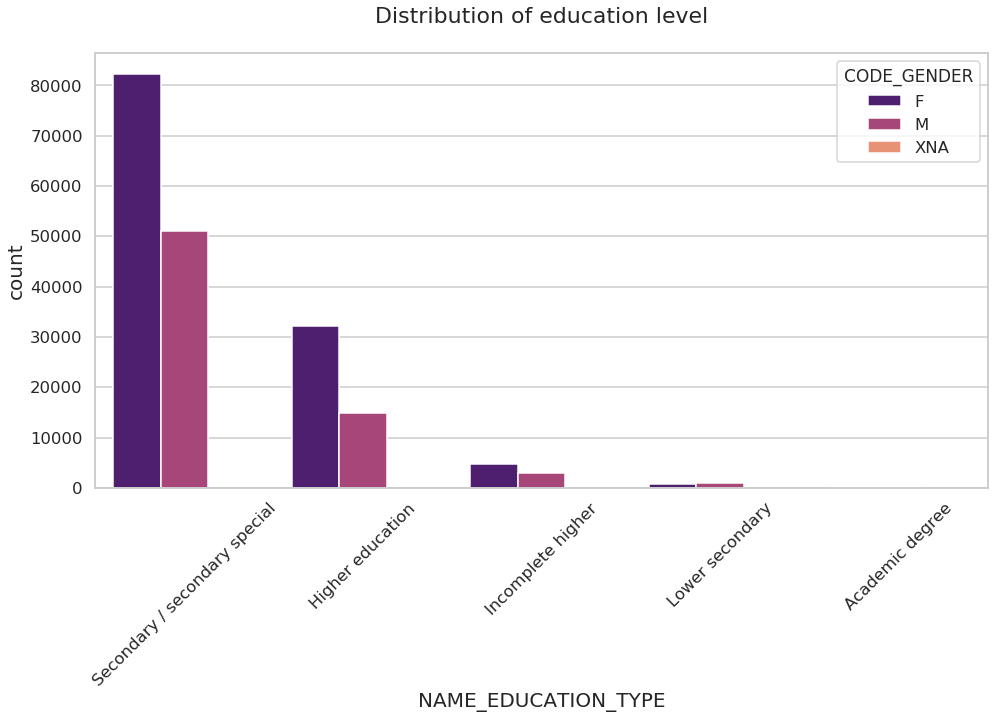

In [78]:
uniplot(zero_df,col='NAME_EDUCATION_TYPE',title='Distribution of education level',hue='CODE_GENDER')

### Observation
- No person with an 'Academic Degree' is applying for a loan
- The number of females with 'Higher Education' that apply for a loan is almost double the number of males for the same category

<Figure size 2880x1440 with 0 Axes>

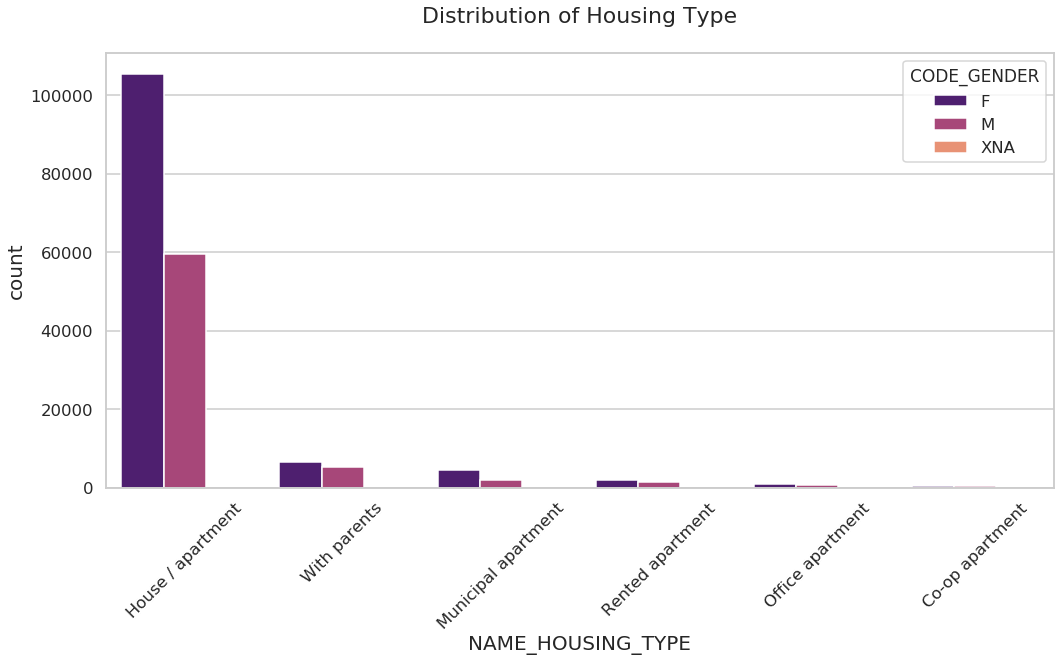

In [79]:
uniplot(zero_df,col='NAME_HOUSING_TYPE',title='Distribution of Housing Type',hue='CODE_GENDER')

### Observation

- Females living in their own apartments/houses apply for more loans and are able to successfully payback.
- A very small number of females living in Co-op apartments apply for loans

<Figure size 2880x1440 with 0 Axes>

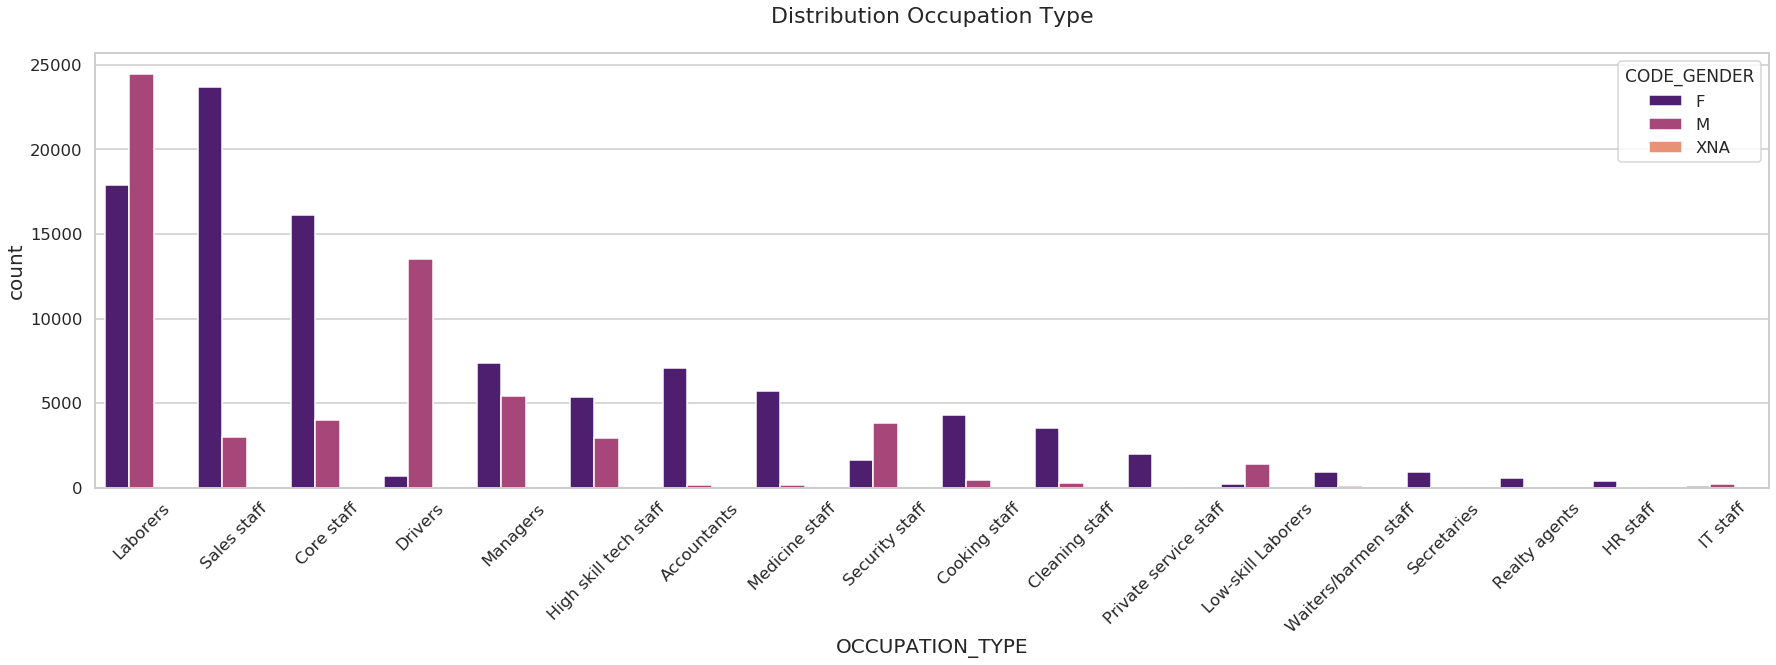

In [80]:
uniplot(zero_df,col='OCCUPATION_TYPE',title='Distribution Occupation Type',hue='CODE_GENDER')

### Observation
- Male Labourers & Drivers take more loans and are able to successfully payback in time.
- Female Care staff & Sales Staff are also able to take loans and payback in time 

### Bivariate Analysis on one_df 

Perform correlation between numerical columns for finding correlation which having TARGET value as 1

<Figure size 2880x1440 with 0 Axes>

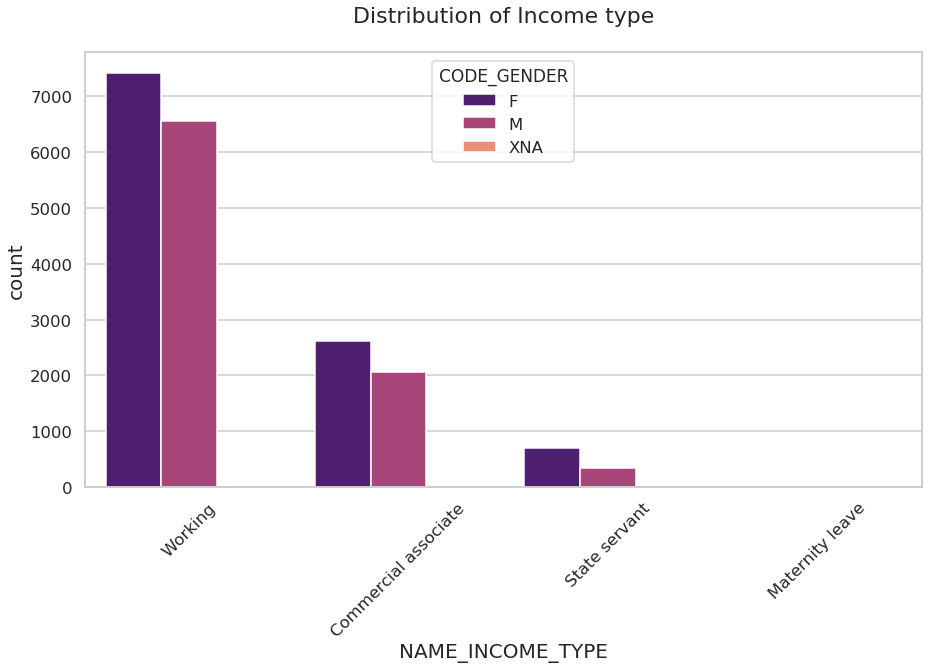

In [81]:
uniplot(one_df,col='NAME_INCOME_TYPE',title='Distribution of Income type',hue='CODE_GENDER')

### Observation 
- For income type ‘working’, ’commercial associate’, and ‘State Servant’ the number of credits are higher than others.
- Females have more number of credit applications than males in all the categories.

<Figure size 2880x1440 with 0 Axes>

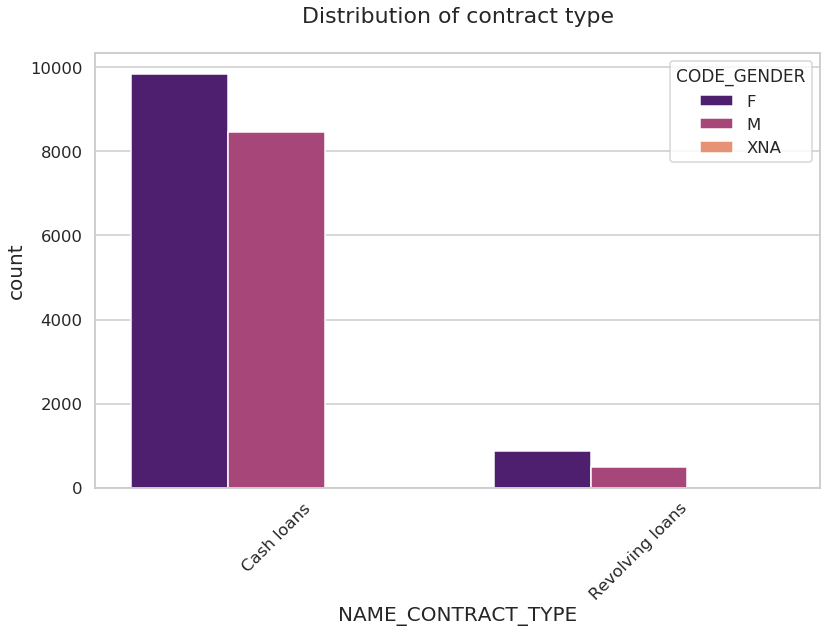

In [82]:
uniplot(one_df,col='NAME_CONTRACT_TYPE',title='Distribution of contract type',hue='CODE_GENDER')

### Observation
- For contract type ‘cash loans’ is having higher number of credits than ‘Revolving loans’ contract type.
- For this also Females are applying for credit a lot more than males.
- Females are also able to payback their loans on time

<Figure size 2880x1440 with 0 Axes>

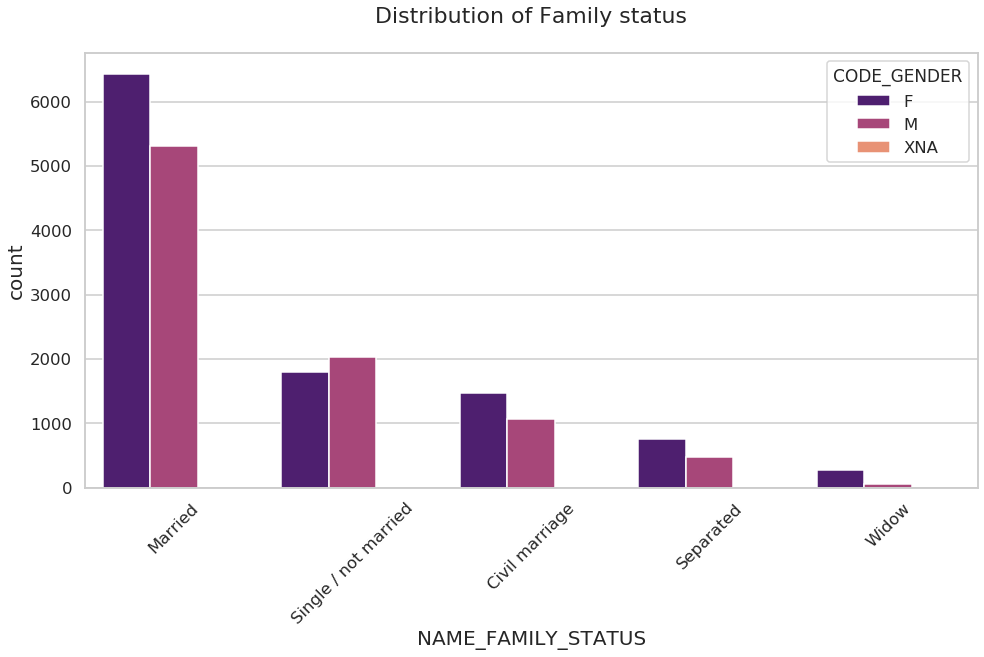

In [83]:
uniplot(one_df,col='NAME_FAMILY_STATUS',title='Distribution of Family status',hue='CODE_GENDER')

### Observation
- As observed above the number of married females applying for loans is almost 3.5 times the number of single females. 
- No male widowers are applying for credit
- The number of males applying for loans and being able to not payback is higher if they are unmarried/single compared to females
- A very small number of male widowers are unable to payback their loans after

<Figure size 2880x1440 with 0 Axes>

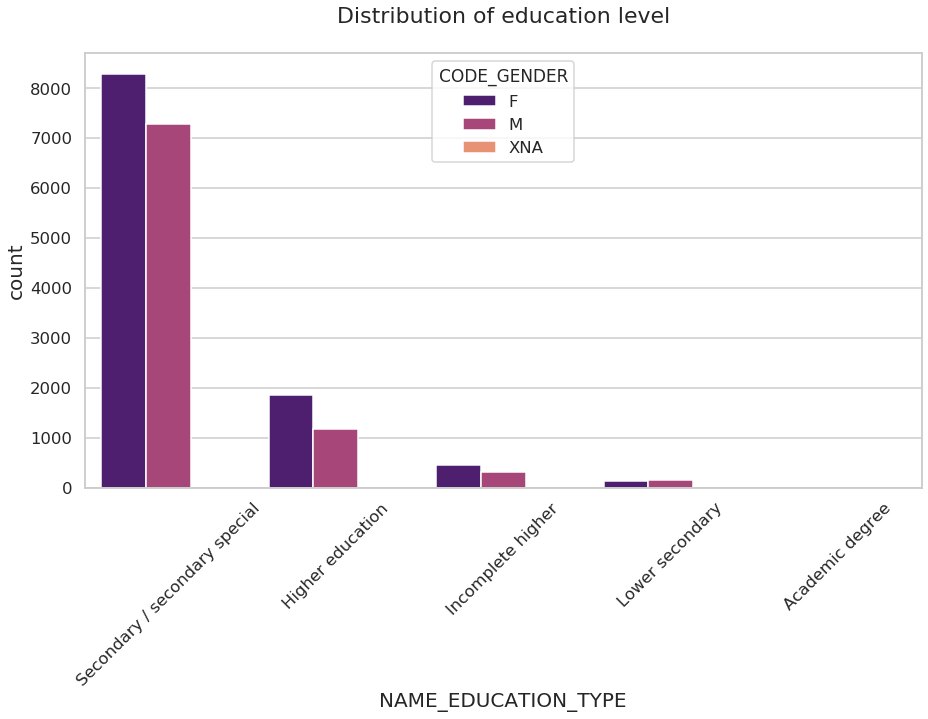

In [84]:
uniplot(one_df,col='NAME_EDUCATION_TYPE',title='Distribution of education level',hue='CODE_GENDER')

### Observation

- Males with lower secondary education make more loan applications and default more compared to females
- There is very little difference between the number of defaulters for males and females with secondary education compared to the non-defaulters we saw above

<Figure size 2880x1440 with 0 Axes>

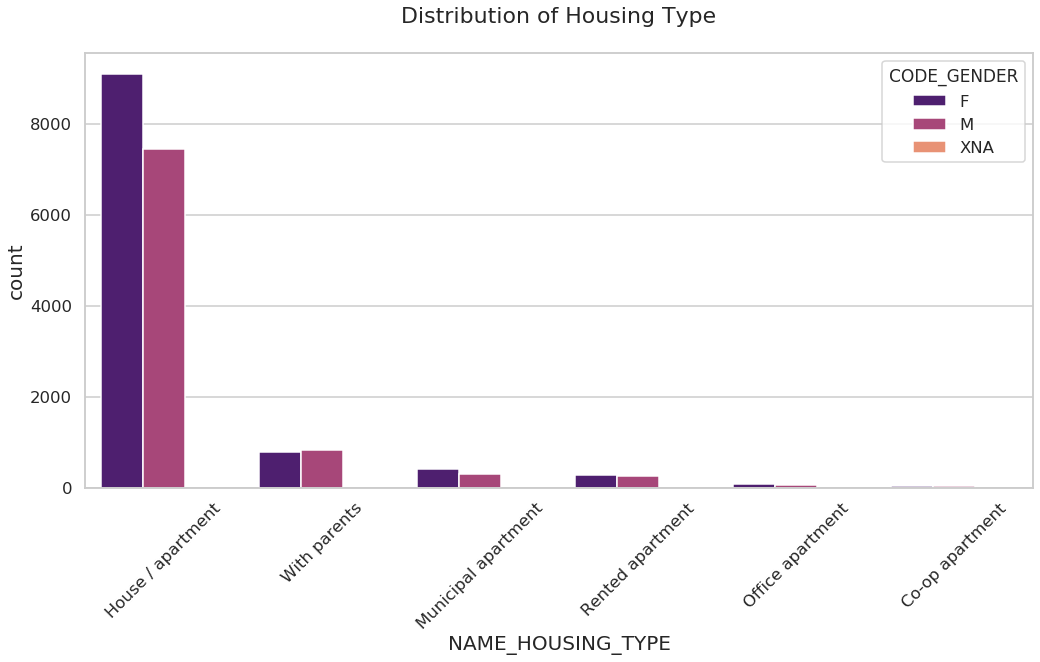

In [85]:
uniplot(one_df,col='NAME_HOUSING_TYPE',title='Distribution of Housing Type',hue='CODE_GENDER')

### Observation

- Males living with their parents tend to apply and default more on their loans
- Almost an equal number of males and females default on loans if they are living in rented apartments

<Figure size 2880x1440 with 0 Axes>

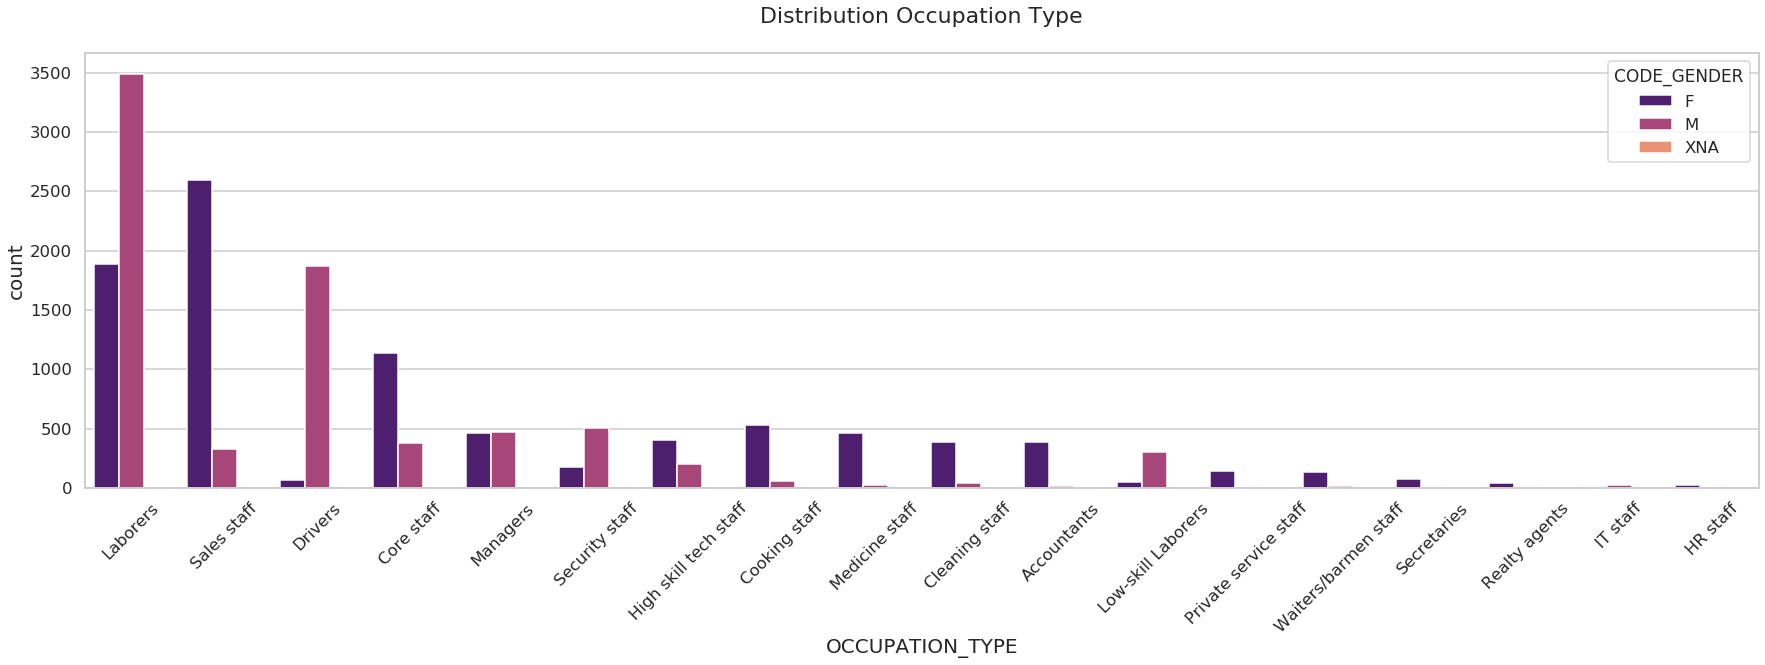

In [86]:
uniplot(one_df,col='OCCUPATION_TYPE',title='Distribution Occupation Type',hue='CODE_GENDER')

### Observations

- The number of male applicants who default on paying back their loans is almost double the amount of female applicants
- Irrespective of gender, managers seem to default on their loans equally

#### Categorical vs Numerical Analysis

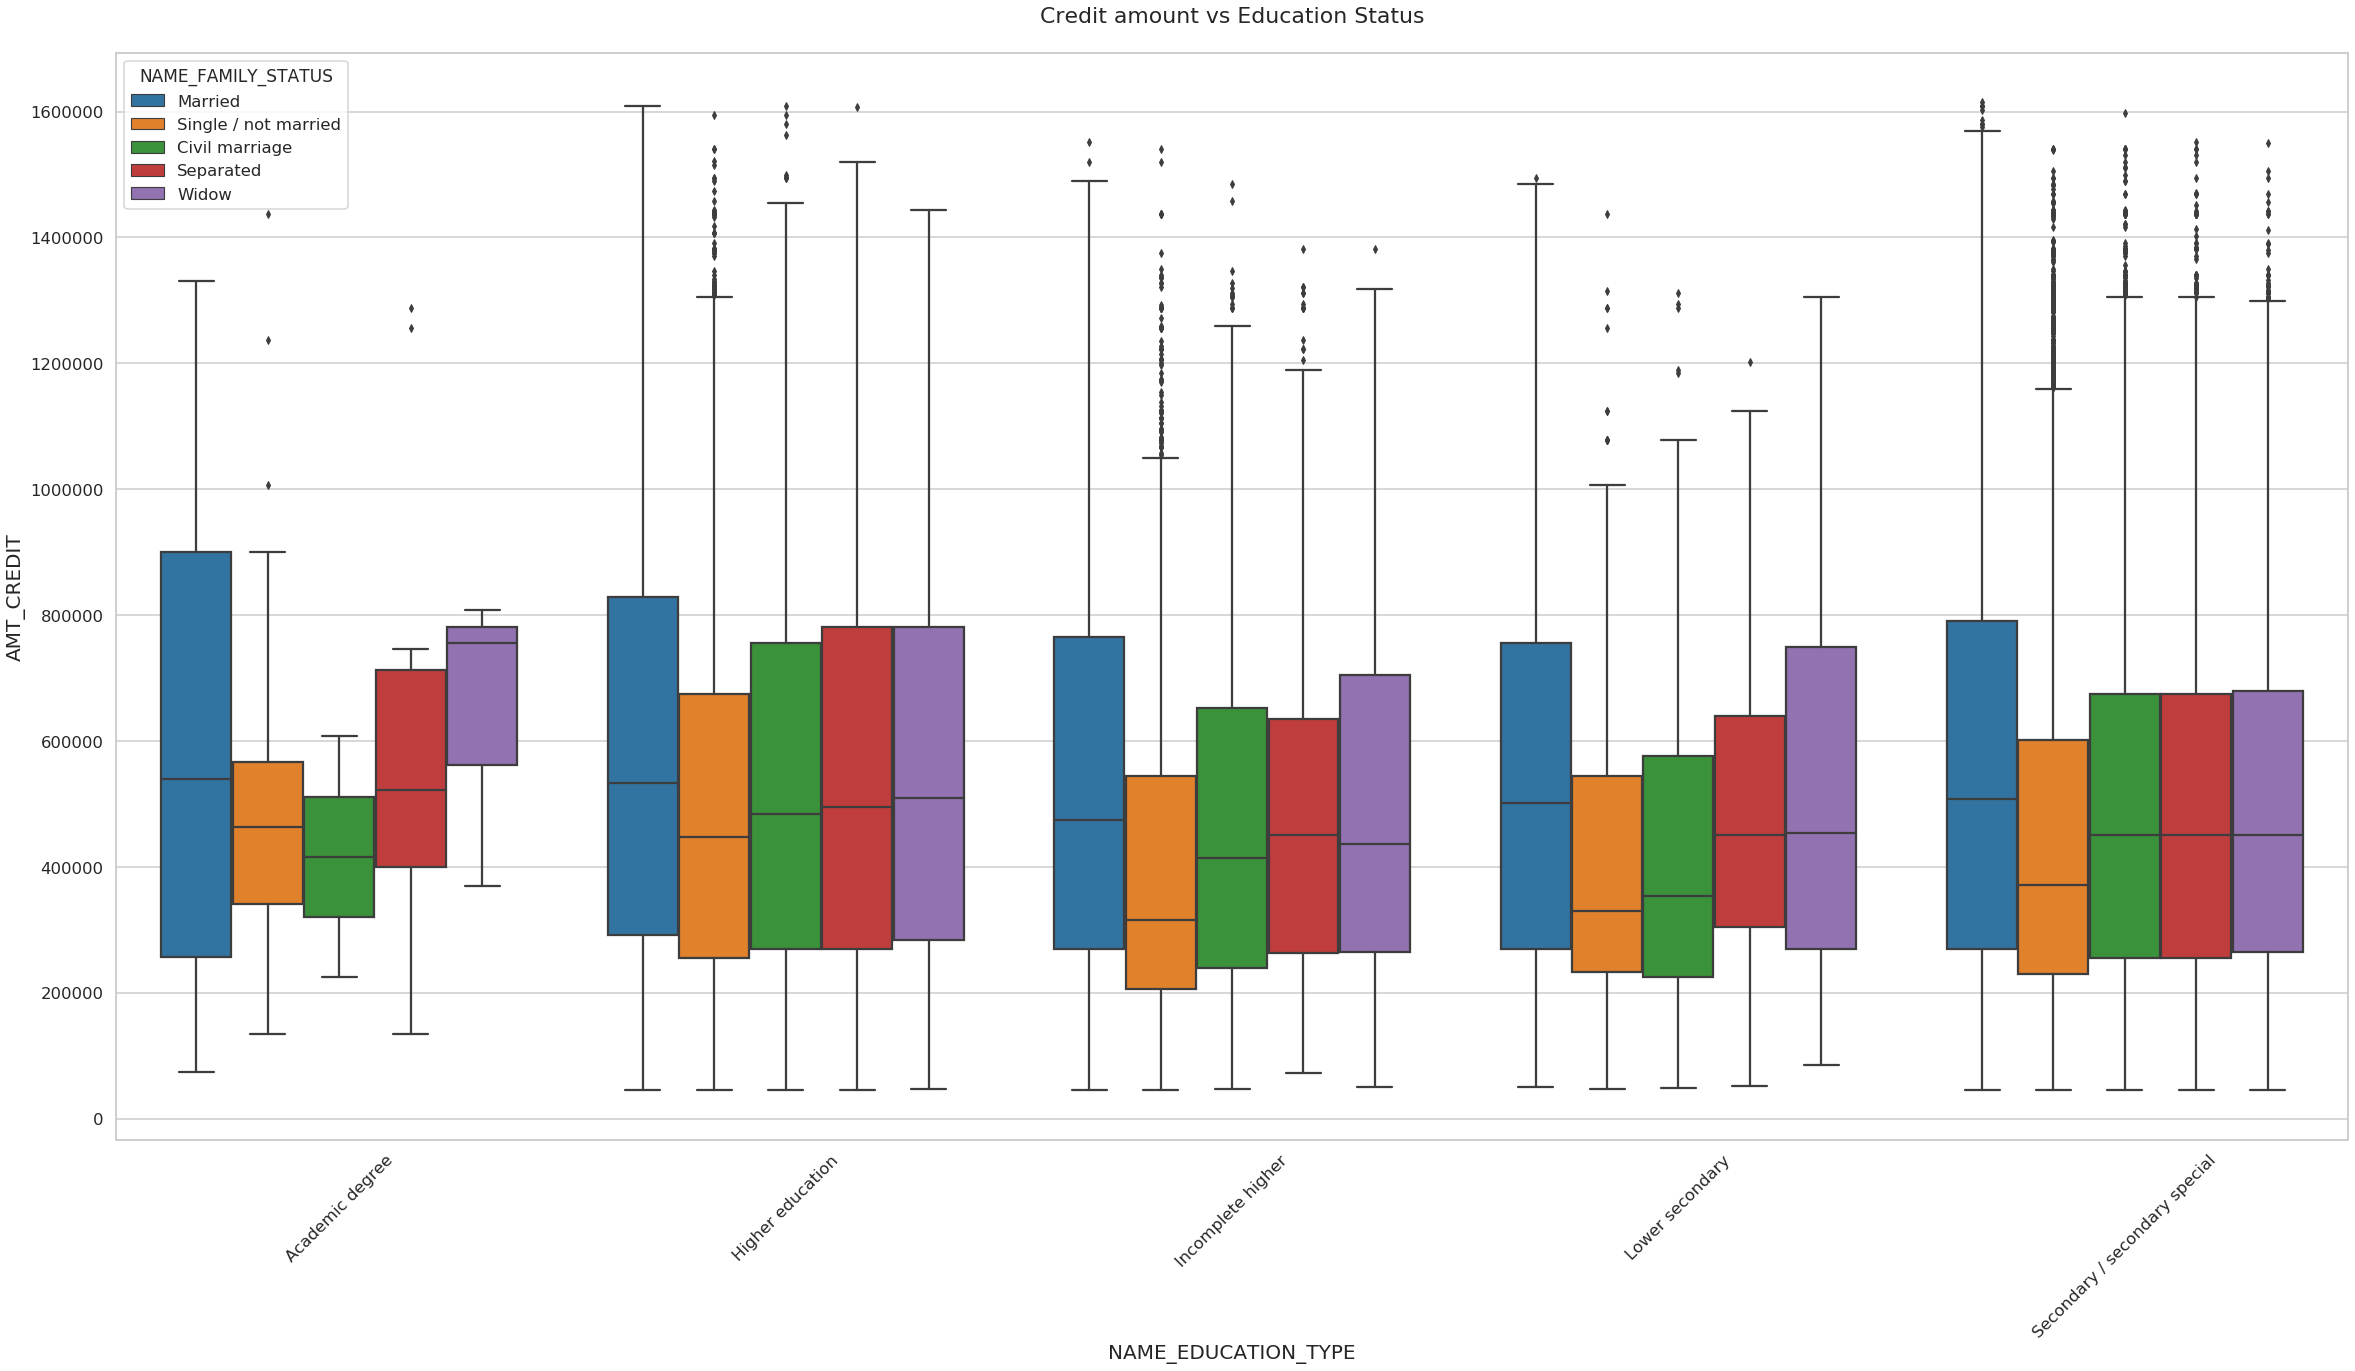

In [87]:
# Box plotting for Credit amount for zero_df based on education type and family status

plt.figure(figsize=(40,20))
plt.xticks(rotation=45)
sns.boxplot(data =zero_df, x='NAME_EDUCATION_TYPE',y='AMT_CREDIT', hue ='NAME_FAMILY_STATUS',orient='v')
plt.title('Credit amount vs Education Status')
plt.show()

### Observation
- Widows with secondary education have a very high median credit amount borrowing and default on paying back loans as well. It would be better to be vary of lending to them
- Widows with an academic degree have a higher median for borrowing as compared to any other category. 
- People in civil marriages, those who are seperated and widows with secondary education have the same median values and usually borrow in around 400000

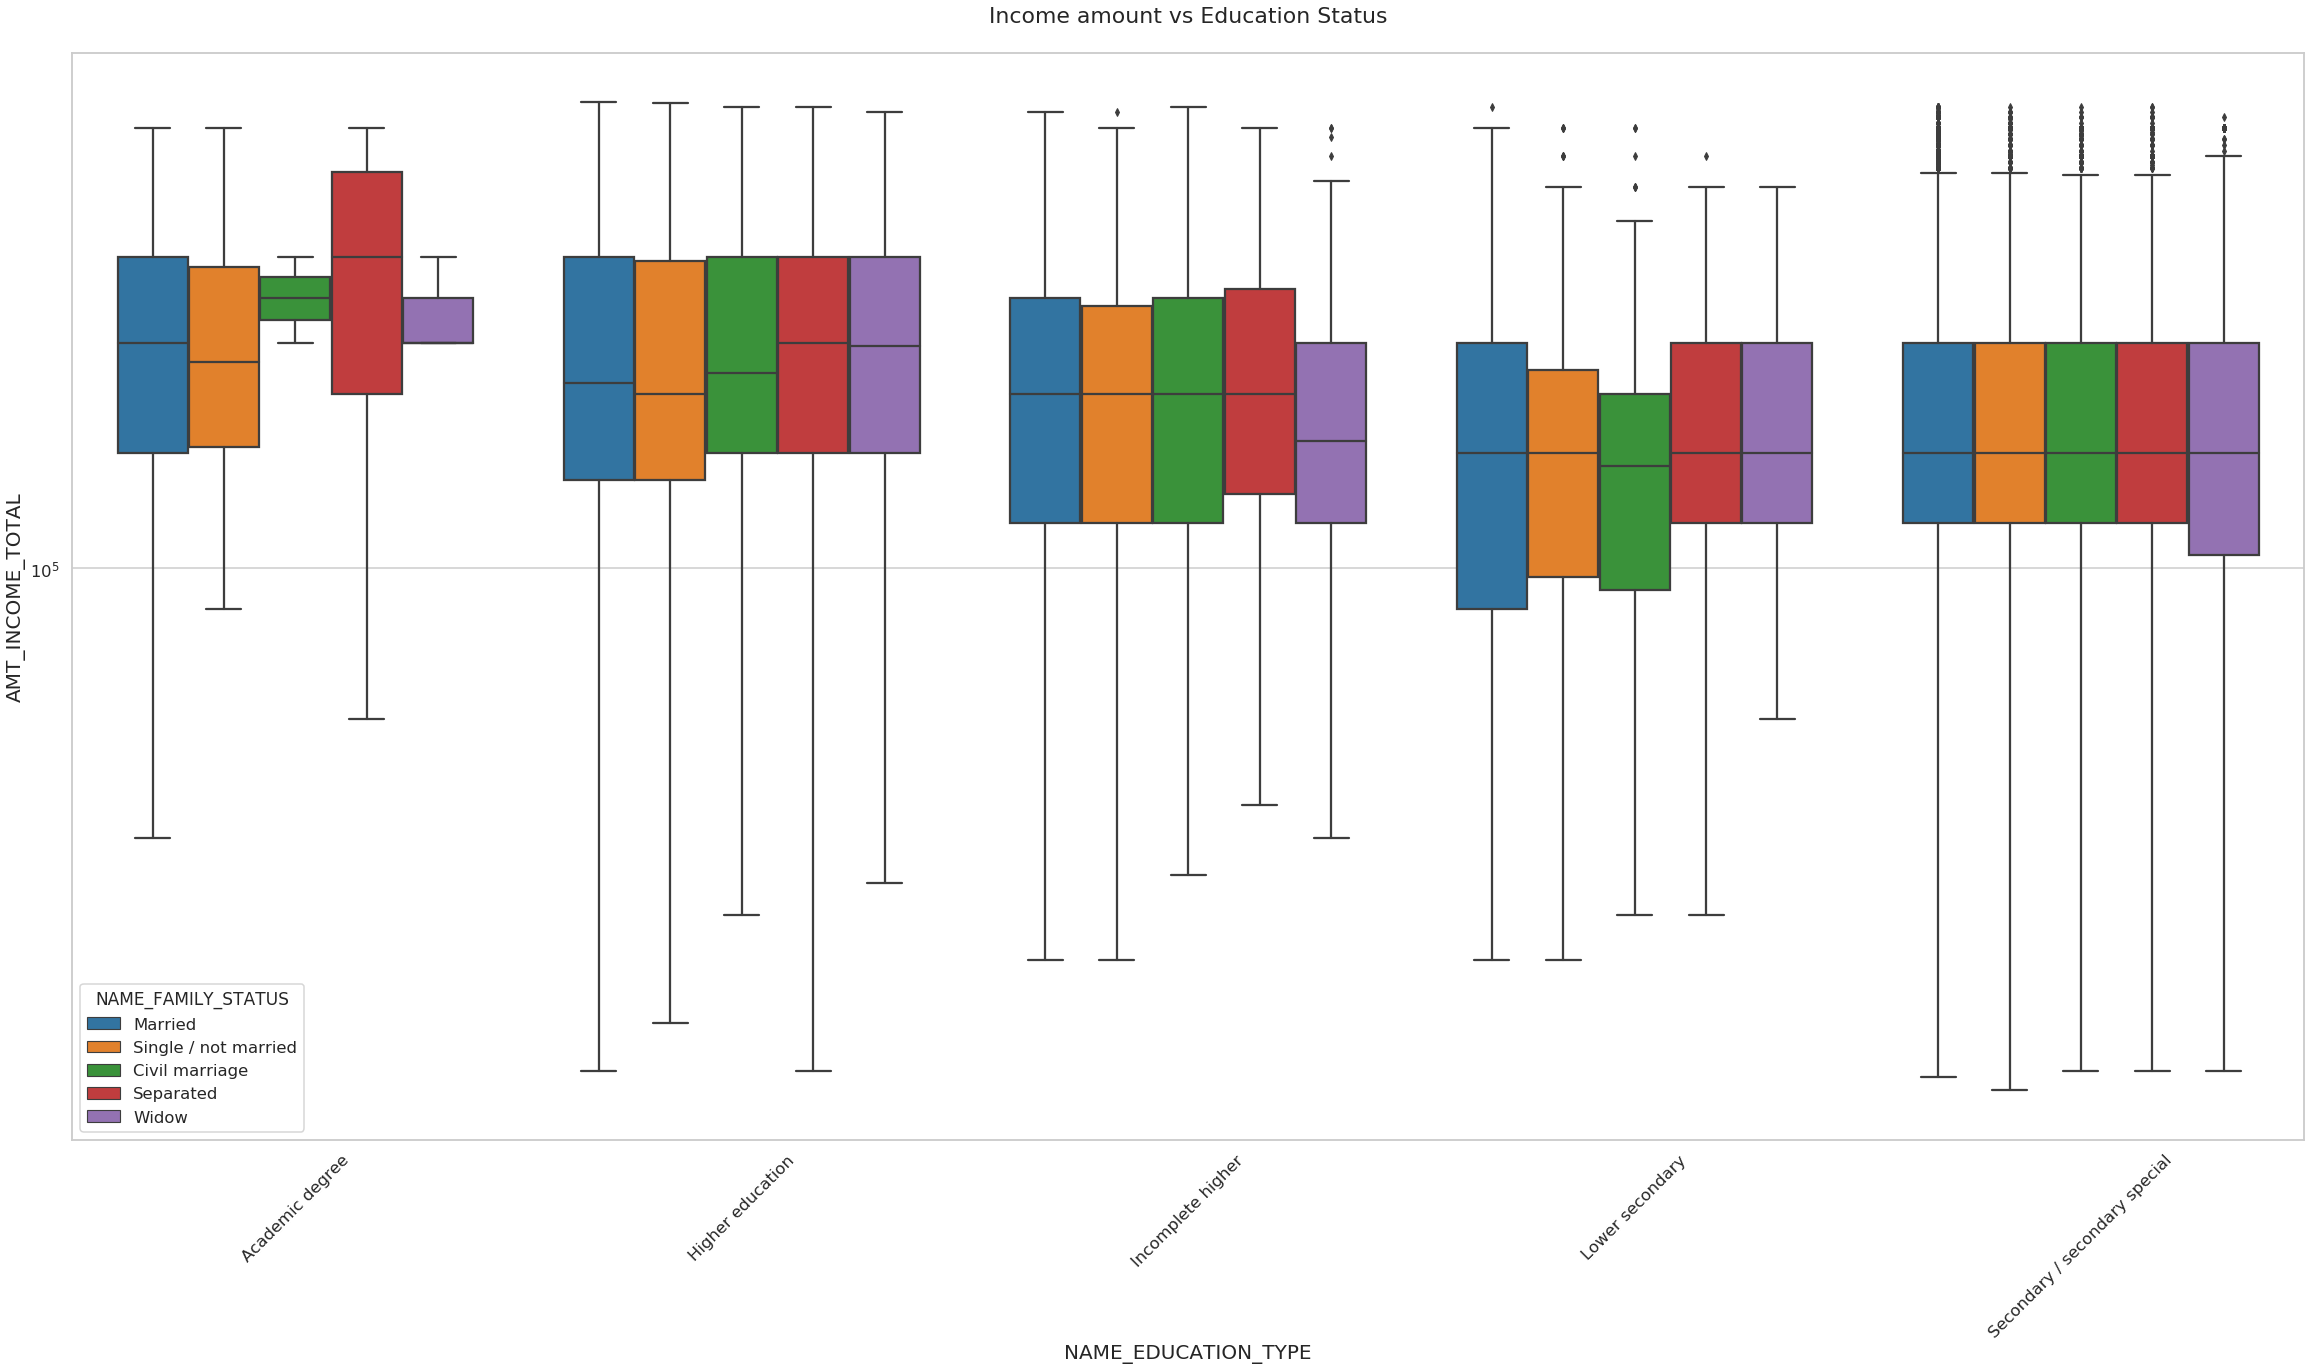

In [88]:
# Box plotting for Income amount for zero_df based on their education type & family status

plt.figure(figsize=(40,20))
plt.xticks(rotation=45)
plt.yscale('log')
sns.boxplot(data =zero_df, x='NAME_EDUCATION_TYPE',y='AMT_INCOME_TOTAL', hue ='NAME_FAMILY_STATUS',orient='v')
plt.title('Income amount vs Education Status')
plt.show()

### Observation
- Except widows, the median earning for all other family status types with an incomplete higher education is the same
- Median income for all family status categories is the same for people with a secondary education

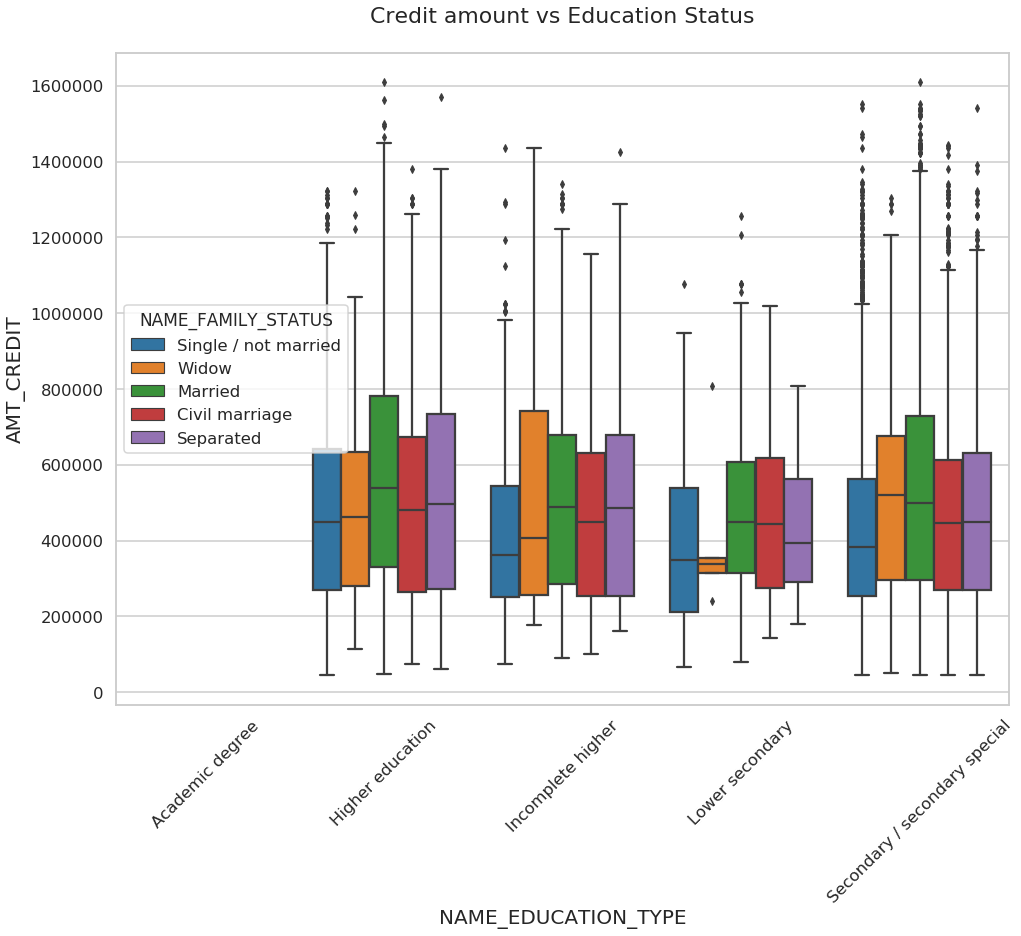

In [89]:
# Box plotting for Credit amount for one_df

plt.figure(figsize=(16,12))
plt.xticks(rotation=45)
sns.boxplot(data =one_df, x='NAME_EDUCATION_TYPE',y='AMT_CREDIT', hue ='NAME_FAMILY_STATUS',orient='v')
plt.title('Credit amount vs Education Status')
plt.show()

### Observation
- Widows with secondary education have a very high median credit amount borrowing and default on paying back loans as well. It would be better to be vary of lending to them
- Married people have a consistently high median across all categories of education except secondary education

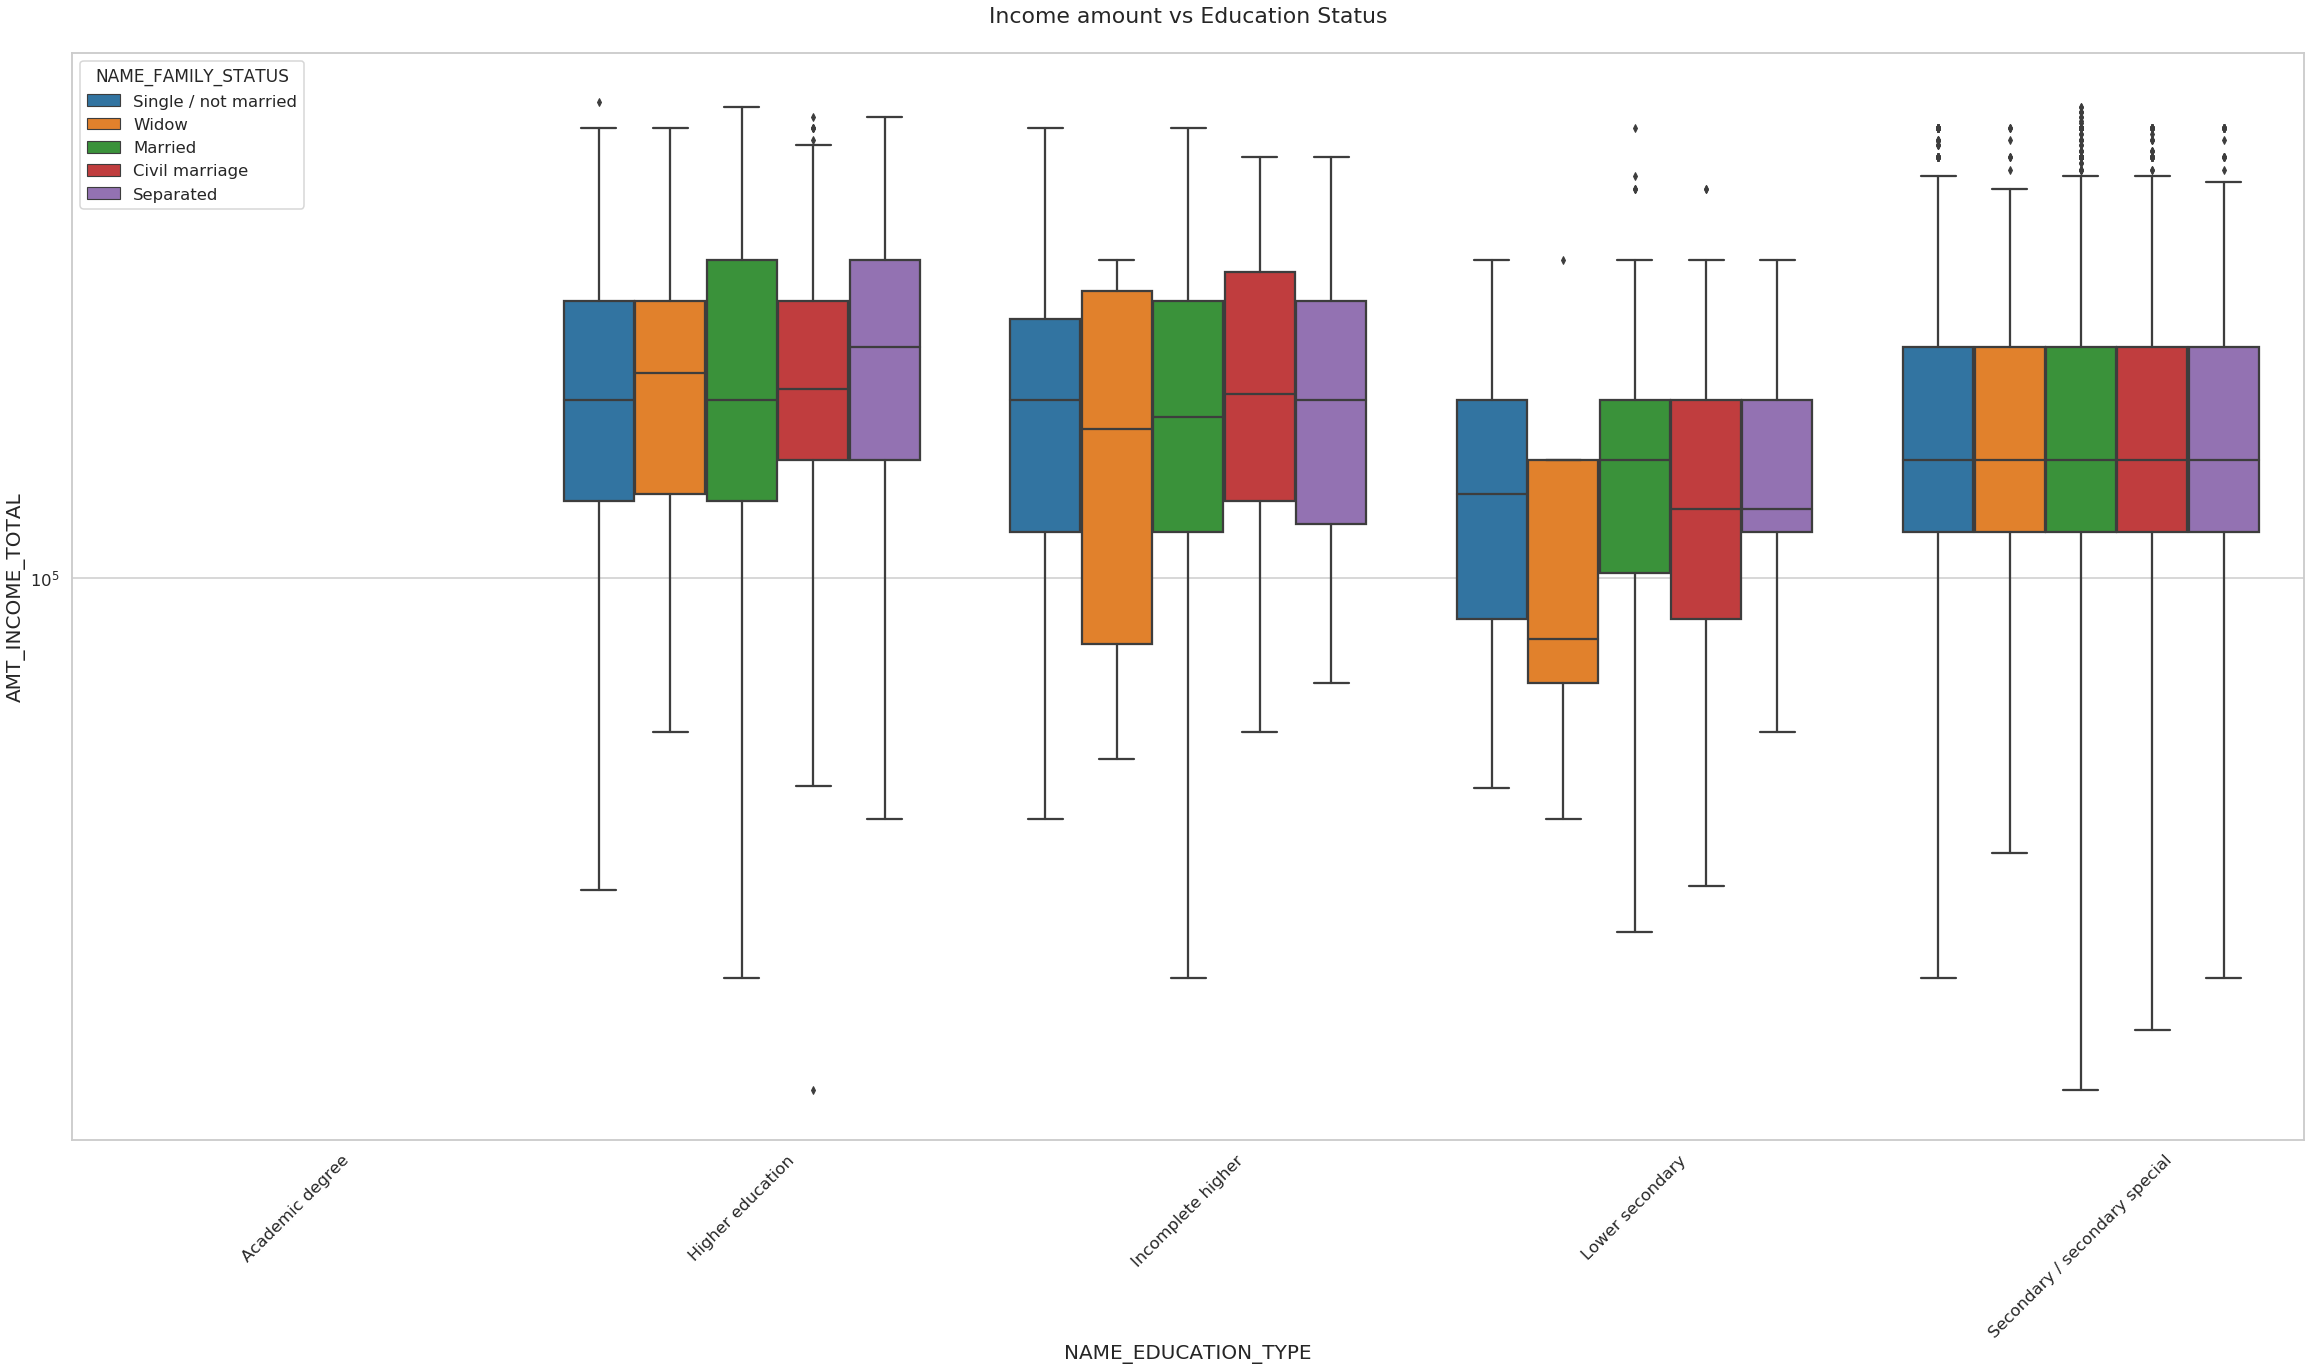

In [90]:
# Box plotting for Income amount for one_df

plt.figure(figsize=(40,20))
plt.xticks(rotation=45)
plt.yscale('log')
sns.boxplot(data =one_df, x='NAME_EDUCATION_TYPE',y='AMT_INCOME_TOTAL', hue ='NAME_FAMILY_STATUS',orient='v')
plt.title('Income amount vs Education Status')
plt.show()

### Observation
- The median income for all family status types is the same for people with education type as Secondary/secondary special
- The median income for widows is the lowest across all the education types

In [91]:
### Perform correlation between CNT_CHILDREN, AMT_INCOME_TOTAL, AMT_CREDIT, AMT_GOODS_PRICE, REGION_POPULATION_RELATIVE
### and AMT_ANNUITY. Then make correlation matrix across the one_df dataframe

columns=['CNT_CHILDREN','AMT_INCOME_TOTAL','AMT_CREDIT','AMT_GOODS_PRICE','REGION_POPULATION_RELATIVE', 'AMT_ANNUITY']
corr=one_df[columns].corr()
corr.style.background_gradient(cmap='coolwarm')

,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,AMT_ANNUITY
CNT_CHILDREN,1,-0.0324883,0.0109337,0.00565894,-0.0295158,0.0233823
AMT_INCOME_TOTAL,-0.0324883,1,0.307654,0.310623,0.0887877,0.379549
AMT_CREDIT,0.0109337,0.307654,1,0.977875,0.0546053,0.733477
AMT_GOODS_PRICE,0.00565894,0.310623,0.977875,1,0.0641907,0.732975
REGION_POPULATION_RELATIVE,-0.0295158,0.0887877,0.0546053,0.0641907,1,0.0470344
AMT_ANNUITY,0.0233823,0.379549,0.733477,0.732975,0.0470344,1


### Observation
In the heatmap above: The closer you are to RED there is a stronger relationship, the closer you are to blue the weaker the relationship.

As we can see from the corelation matrix above, there is a very close relationship between AMT_GOODS_PRICE & AMT_CREDIT. 

AMT_ANNUITY & AMT_CREDIT have a medium/strong relationship. Annuity has a similar relationship with AMT_GOODS_PRICE.


In [92]:
### Sorting based on the correlation and extracting top 10 relationships on the defaulters in one_df
corrOneDf = corr.where(np.triu(np.ones(corr.shape), k=1).astype(np.bool)).unstack().reset_index() 

corrOneDf.columns = ['VAR1','VAR2','Correlation'] 
corrOneDf.sort_values('Correlation', ascending = False).nlargest(10, 'Correlation')

,VAR1,VAR2,Correlation
20,AMT_GOODS_PRICE,AMT_CREDIT,0.977875
32,AMT_ANNUITY,AMT_CREDIT,0.733477
33,AMT_ANNUITY,AMT_GOODS_PRICE,0.732975
31,AMT_ANNUITY,AMT_INCOME_TOTAL,0.379549
19,AMT_GOODS_PRICE,AMT_INCOME_TOTAL,0.310623
13,AMT_CREDIT,AMT_INCOME_TOTAL,0.307654
25,REGION_POPULATION_RELATIVE,AMT_INCOME_TOTAL,0.088788
27,REGION_POPULATION_RELATIVE,AMT_GOODS_PRICE,0.064191
26,REGION_POPULATION_RELATIVE,AMT_CREDIT,0.054605
34,AMT_ANNUITY,REGION_POPULATION_RELATIVE,0.047034


### Observation
In the correlation matrix, we can identify-

Columns with High Correlation:

1.AMT_GOODS_PRICE and AMT_CREDIT

Columns with Medium Correlation:

1.REGION_POPULATION_RELATIVE and AMT_INCOME_TOTAL                                                                           
2.REGION_POPULATION_RELATIVE and AMT_GOODS_PRICE                                                         
3.REGION_POPULATION_RELATIVE and AMT_CREDIT

Columns with low correlation:

1.AMT_INCOME_TOTAL and CNT_CHILDREN

We also observed that the top 10 correlation pairs are:
- VAR1              VAR2      Correlation Value
- AMT_GOODS_PRICE	AMT_CREDIT	0.981276
- AMT_ANNUITY	AMT_CREDIT	0.748446
- AMT_ANNUITY	AMT_GOODS_PRICE	0.747315
- AMT_ANNUITY	AMT_INCOME_TOTAL	0.390809
- AMT_GOODS_PRICE	AMT_INCOME_TOTAL	0.317123
- AMT_CREDIT	AMT_INCOME_TOTAL	0.313347
- REGION_POPULATION_RELATIVE	AMT_INCOME_TOTAL	0.141307
- AMT_ANNUITY	REGION_POPULATION_RELATIVE	0.065024
- REGION_POPULATION_RELATIVE	AMT_GOODS_PRICE	0.055120
- REGION_POPULATION_RELATIVE	AMT_CREDIT	0.050097

Perform correlation between numerical columns for finding correlation which having TARGET value as 0

In [93]:
#Perform correlation between CNT_CHILDREN, AMT_INCOME_TOTAL, AMT_CREDIT, AMT_GOODS_PRICE and REGION_POPULATION_RELATIVE
#Then make correlation matrix

corrZero=zero_df[columns].corr()
corrZero.style.background_gradient(cmap='coolwarm')

,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,AMT_ANNUITY
CNT_CHILDREN,1,-0.026721,-0.0117785,-0.0161465,-0.0305572,-0.00303878
AMT_INCOME_TOTAL,-0.026721,1,0.313347,0.317123,0.141307,0.390809
AMT_CREDIT,-0.0117785,0.313347,1,0.981276,0.0500967,0.748446
AMT_GOODS_PRICE,-0.0161465,0.317123,0.981276,1,0.0551197,0.747315
REGION_POPULATION_RELATIVE,-0.0305572,0.141307,0.0500967,0.0551197,1,0.0650243
AMT_ANNUITY,-0.00303878,0.390809,0.748446,0.747315,0.0650243,1


### Observation
In the heatmap above: The closer you are to RED there is a stronger relationship, the closer you are to blue the weaker the relationship.

As we can see from the corelation matrix above, there is a very close relationship between AMT_GOODS_PRICE & AMT_CREDIT.

AMT_ANNUITY & AMT_CREDIT have a medium/strong relationship. Annuity has a similar relationship with AMT_GOODS_PRICE.

This relationship is consistent with the one we saw for the defaulters in the one_df dataframe. Thus confirming that the relationships are consistent across TARGET values

In [94]:
corrZeroDf = corrZero.where(np.triu(np.ones(corrZero.shape), k=1).astype(np.bool)).unstack().reset_index() 

corrZeroDf.columns = ['VAR1','VAR2','Correlation'] 
# corrOneDf.dropna(subset - ['Correlation'],inplace = True) 
corrZeroDf.sort_values('Correlation', ascending = False).nlargest(10, 'Correlation')

,VAR1,VAR2,Correlation
20,AMT_GOODS_PRICE,AMT_CREDIT,0.981276
32,AMT_ANNUITY,AMT_CREDIT,0.748446
33,AMT_ANNUITY,AMT_GOODS_PRICE,0.747315
31,AMT_ANNUITY,AMT_INCOME_TOTAL,0.390809
19,AMT_GOODS_PRICE,AMT_INCOME_TOTAL,0.317123
13,AMT_CREDIT,AMT_INCOME_TOTAL,0.313347
25,REGION_POPULATION_RELATIVE,AMT_INCOME_TOTAL,0.141307
34,AMT_ANNUITY,REGION_POPULATION_RELATIVE,0.065024
27,REGION_POPULATION_RELATIVE,AMT_GOODS_PRICE,0.055120
26,REGION_POPULATION_RELATIVE,AMT_CREDIT,0.050097


In the correlation matrix, we can identify-

Columns with High Correlation:

1.AMT_GOODS_PRICE and AMT_CREDIT

Columns with Medium Correlation:

1.AMT_INCOME_TOTAL and AMT_CREDIT                                                                          
2.AMT_INCOME_TOTAL and AMT_GOODS_PRICE                                                         

Columns with low correlation:

1.AMT_GOODS_PRICE and CNT_CHILDREN

We also observed that the top 10 correlation pairs are:

- VAR1	VAR2	Correlation
- AMT_GOODS_PRICE	AMT_CREDIT	0.981276
- AMT_ANNUITY	AMT_CREDIT	0.748446
- AMT_ANNUITY	AMT_GOODS_PRICE	0.747315
- AMT_ANNUITY	AMT_INCOME_TOTAL	0.390809
- AMT_GOODS_PRICE	AMT_INCOME_TOTAL	0.317123
- AMT_CREDIT	AMT_INCOME_TOTAL	0.313347
- REGION_POPULATION_RELATIVE	AMT_INCOME_TOTAL	0.141307
- AMT_ANNUITY	REGION_POPULATION_RELATIVE	0.065024
- REGION_POPULATION_RELATIVE	AMT_GOODS_PRICE	0.055120
- REGION_POPULATION_RELATIVE	AMT_CREDIT	0.050097

#### Key Obervation
We also observed that the top categories between both the data frames zero_df & one_df is the same:
AMT_GOODS_PRICE	AMT_CREDIT	0.981276

### Analysing Numerical Data

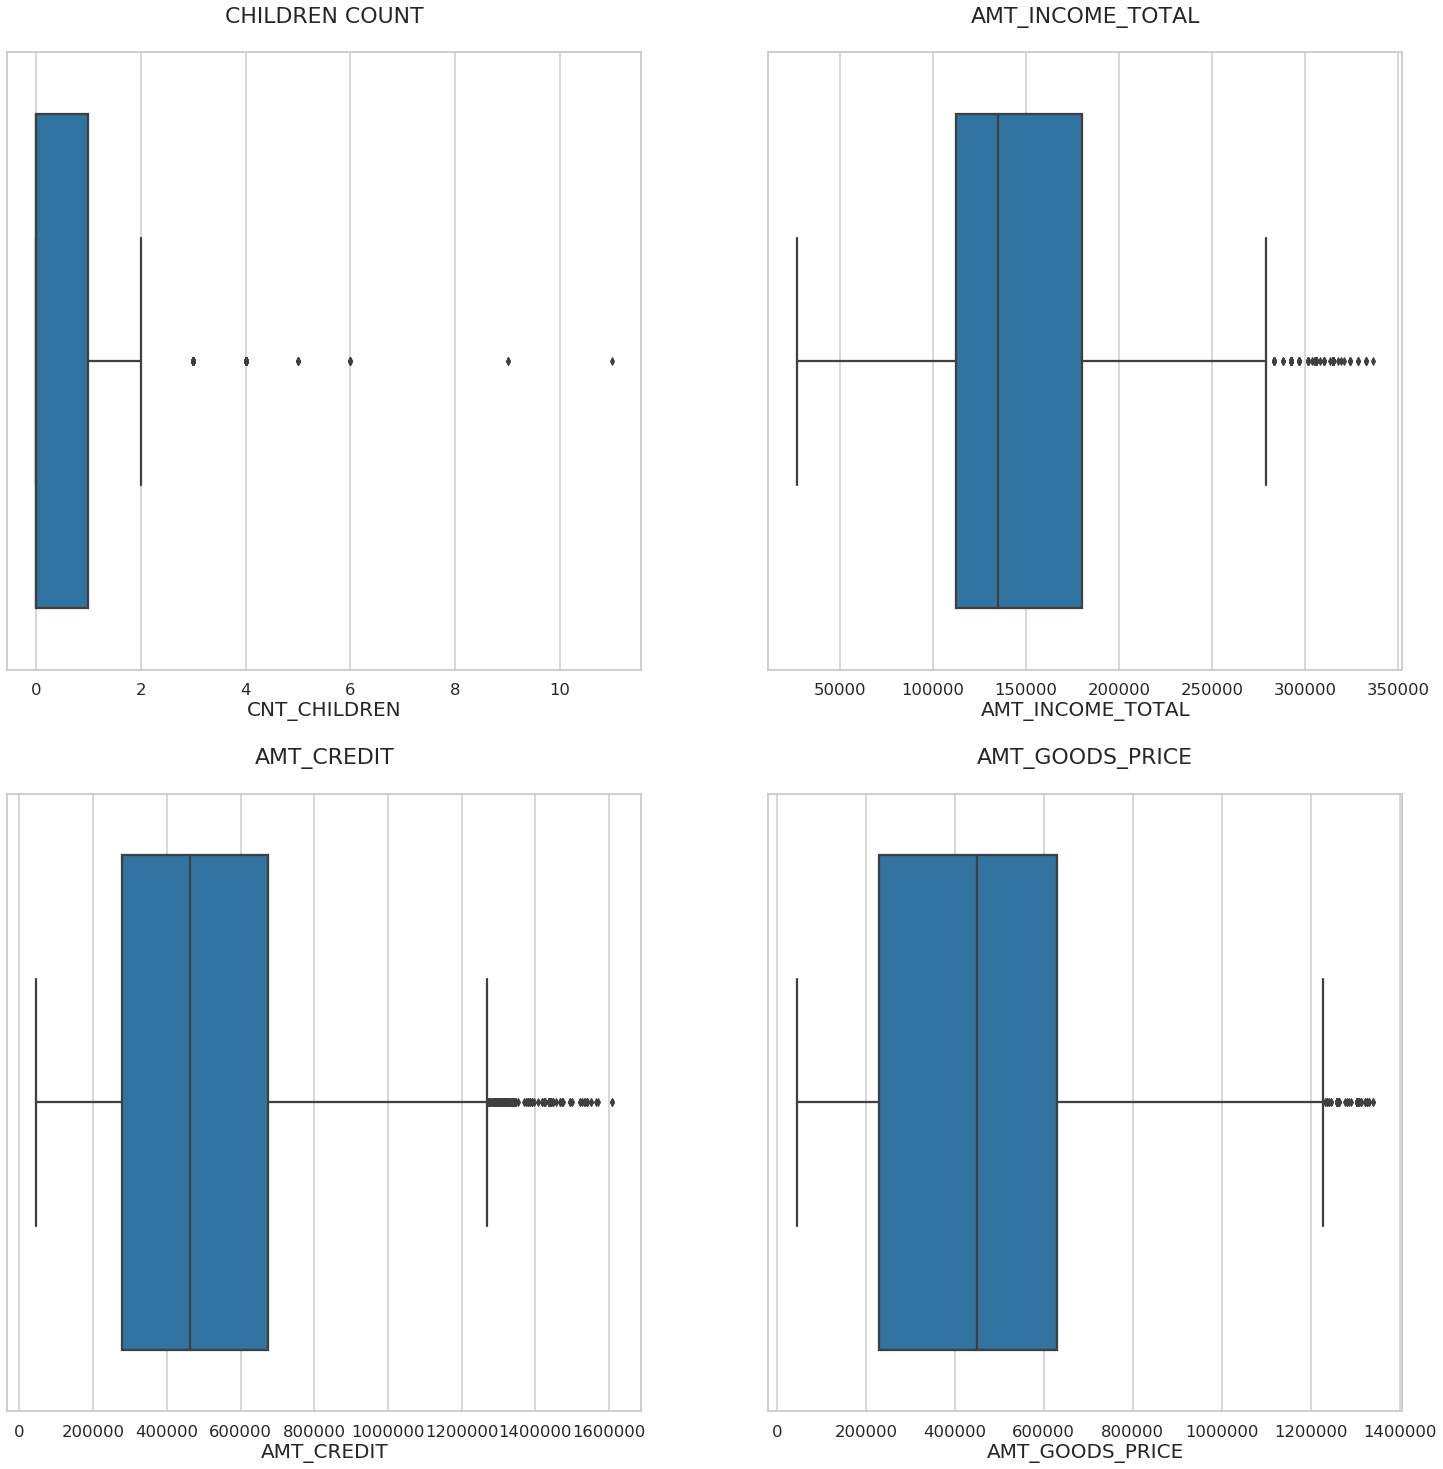

In [95]:
#Box plot on the numerical columns having TARGET value as 1

plt.figure(figsize=(25,25))
plt.subplot(2,2,1)
plt.title('CHILDREN COUNT')
sns.boxplot(one_df['CNT_CHILDREN'])


plt.subplot(2,2,2)
plt.title('AMT_INCOME_TOTAL')
sns.boxplot(one_df['AMT_INCOME_TOTAL'])


plt.subplot(2,2,3)
plt.title('AMT_CREDIT')
sns.boxplot(one_df['AMT_CREDIT'])

plt.subplot(2,2,4)
plt.title('AMT_GOODS_PRICE')
sns.boxplot(one_df['AMT_GOODS_PRICE'])


plt.show()

### Observation

- From the box plots above we can safely say that having children has no impact on the reason to why someone defaults on paying back their loans
- The amount of credit taken is roughly around 450000 by the defaulters

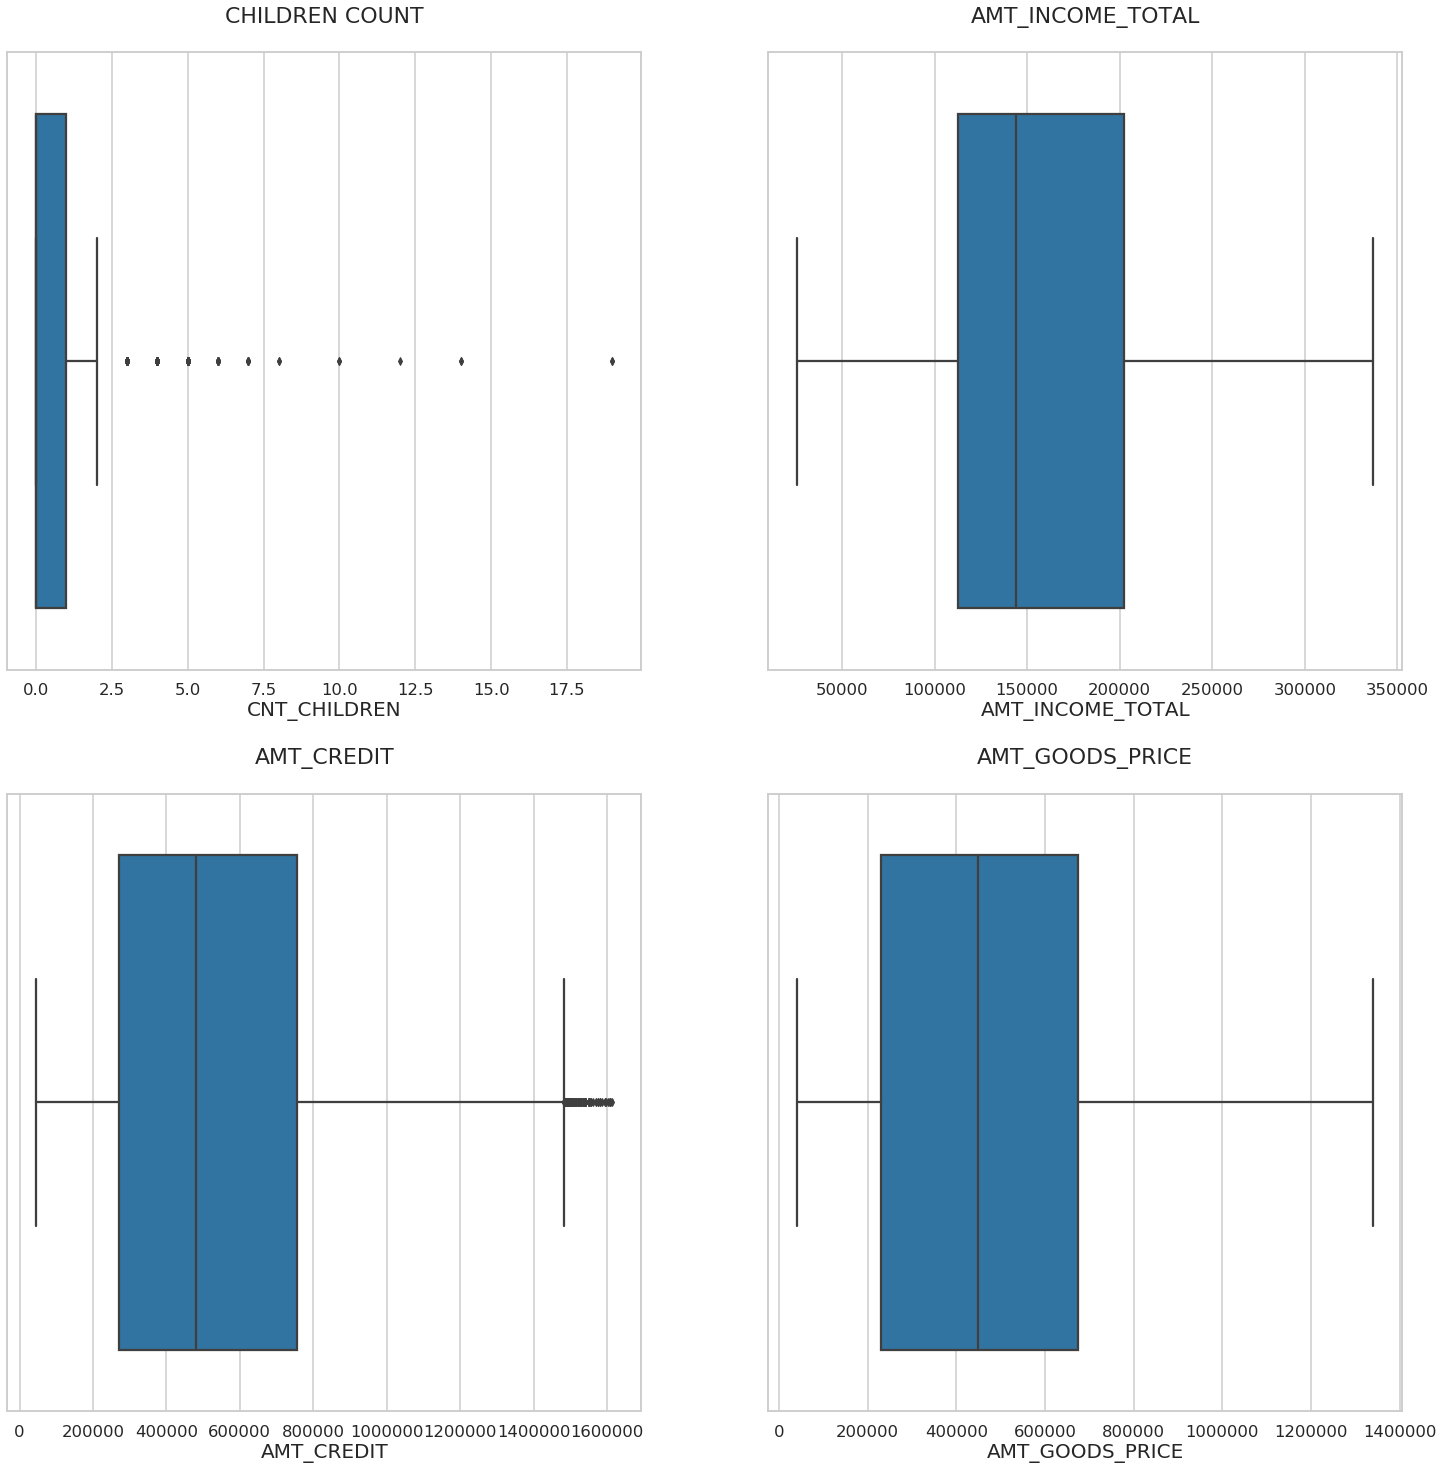

In [96]:
#Box plot on the numerical columns having TARGET value as 0

plt.figure(figsize=(25,25))
plt.subplot(2,2,1)
plt.title('CHILDREN COUNT')
sns.boxplot(zero_df['CNT_CHILDREN'])


plt.subplot(2,2,2)
plt.title('AMT_INCOME_TOTAL')
sns.boxplot(zero_df['AMT_INCOME_TOTAL'])


plt.subplot(2,2,3)
plt.title('AMT_CREDIT')
sns.boxplot(zero_df['AMT_CREDIT'])

plt.subplot(2,2,4)
plt.title('AMT_GOODS_PRICE')
sns.boxplot(zero_df['AMT_GOODS_PRICE'])


plt.show()

### Observation

- From the box plots above we can safely say that having children has no impact oa persons ability to repay their loans
- The amount of credit taken is roughly around 450000 by the defaulters
- There are no outliers in the amoount of goods price
- The income median lies just below 150000

# 5 PREVIOUS DATA

Read the dataset file previous_application.csv which consist previous loan of the customer.

In [97]:
previousApplicationData=pd.read_csv("./previous_application.csv")

previousApplicationData.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITE,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,Y,1,0.0,0.182832,0.867336,XAP,Approved,-73,Cash through the bank,XAP,NaN,Repeater,Mobile,POS,XNA,Country-wide,35,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-164,XNA,XAP,Unaccompanied,Repeater,XNA,Cash,x-sell,Contact center,-1,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-301,Cash through the bank,XAP,"Spouse, partner",Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,Y,1,NaN,NaN,NaN,XNA,Approved,-512,Cash through the bank,XAP,NaN,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,Y,1,NaN,NaN,NaN,Repairs,Refused,-781,Cash through the bank,HC,NaN,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


### Analysing previous application data 

In [98]:
previousApplicationData.shape

(1670214, 37)

In [99]:
previousApplicationData.describe

<bound method NDFrame.describe of          SK_ID_PREV  SK_ID_CURR NAME_CONTRACT_TYPE  AMT_ANNUITY  \
0           2030495      271877     Consumer loans     1730.430   
1           2802425      108129         Cash loans    25188.615   
2           2523466      122040         Cash loans    15060.735   
3           2819243      176158         Cash loans    47041.335   
4           1784265      202054         Cash loans    31924.395   
...             ...         ...                ...          ...   
1670209     2300464      352015     Consumer loans    14704.290   
1670210     2357031      334635     Consumer loans     6622.020   
1670211     2659632      249544     Consumer loans    11520.855   
1670212     2785582      400317         Cash loans    18821.520   
1670213     2418762      261212         Cash loans    16431.300   

         AMT_APPLICATION  AMT_CREDIT  AMT_DOWN_PAYMENT  AMT_GOODS_PRICE  \
0                17145.0     17145.0               0.0          17145.0   
1          

In [100]:
previousApplicationData.columns

Index(['SK_ID_PREV', 'SK_ID_CURR', 'NAME_CONTRACT_TYPE', 'AMT_ANNUITY',
       'AMT_APPLICATION', 'AMT_CREDIT', 'AMT_DOWN_PAYMENT', 'AMT_GOODS_PRICE',
       'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START',
       'FLAG_LAST_APPL_PER_CONTRACT', 'NFLAG_LAST_APPL_IN_DAY',
       'RATE_DOWN_PAYMENT', 'RATE_INTEREST_PRIMARY',
       'RATE_INTEREST_PRIVILEGED', 'NAME_CASH_LOAN_PURPOSE',
       'NAME_CONTRACT_STATUS', 'DAYS_DECISION', 'NAME_PAYMENT_TYPE',
       'CODE_REJECT_REASON', 'NAME_TYPE_SUITE', 'NAME_CLIENT_TYPE',
       'NAME_GOODS_CATEGORY', 'NAME_PORTFOLIO', 'NAME_PRODUCT_TYPE',
       'CHANNEL_TYPE', 'SELLERPLACE_AREA', 'NAME_SELLER_INDUSTRY',
       'CNT_PAYMENT', 'NAME_YIELD_GROUP', 'PRODUCT_COMBINATION',
       'DAYS_FIRST_DRAWING', 'DAYS_FIRST_DUE', 'DAYS_LAST_DUE_1ST_VERSION',
       'DAYS_LAST_DUE', 'DAYS_TERMINATION', 'NFLAG_INSURED_ON_APPROVAL'],
      dtype='object')

In [101]:
previousApplicationData.dtypes

SK_ID_PREV                       int64
SK_ID_CURR                       int64
NAME_CONTRACT_TYPE              object
AMT_ANNUITY                    float64
AMT_APPLICATION                float64
AMT_CREDIT                     float64
AMT_DOWN_PAYMENT               float64
AMT_GOODS_PRICE                float64
WEEKDAY_APPR_PROCESS_START      object
HOUR_APPR_PROCESS_START          int64
FLAG_LAST_APPL_PER_CONTRACT     object
NFLAG_LAST_APPL_IN_DAY           int64
RATE_DOWN_PAYMENT              float64
RATE_INTEREST_PRIMARY          float64
RATE_INTEREST_PRIVILEGED       float64
NAME_CASH_LOAN_PURPOSE          object
NAME_CONTRACT_STATUS            object
DAYS_DECISION                    int64
NAME_PAYMENT_TYPE               object
CODE_REJECT_REASON              object
NAME_TYPE_SUITE                 object
NAME_CLIENT_TYPE                object
NAME_GOODS_CATEGORY             object
NAME_PORTFOLIO                  object
NAME_PRODUCT_TYPE               object
CHANNEL_TYPE             

In [102]:
### Join the previous application data and application data files using merge

mergedApplicationDataAndPreviousData = pd.merge(applicationDataWithRelevantColumns, previousApplicationData, how='left', on=['SK_ID_CURR'])
mergedApplicationDataAndPreviousData.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE_x,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT_x,AMT_ANNUITY_x,AMT_GOODS_PRICE_x,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,BINNED_AGE,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_CONT_MOBILE,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,ORGANIZATION_TYPE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,SK_ID_PREV,NAME_CONTRACT_TYPE_y,AMT_ANNUITY_y,AMT_APPLICATION,AMT_CREDIT_y,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE_y,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITE,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,21-30,-637,-3648.0,-2120,1,Laborers,1.0,2,2,Business Entity Type 3,0,0.0,1038818.0,Consumer loans,9251.775,179055.0,179055.0,0.0,179055.0,SATURDAY,9.0,Y,1.0,0.000000,NaN,NaN,XAP,Approved,-606.0,XNA,XAP,NaN,New,Vehicles,POS,XNA,Stone,500.0,Auto technology,24.0,low_normal,POS other with interest,365243.0,-565.0,125.0,-25.0,-17.0,0.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,State servant,Higher education,Married,House / apartment,0.003541,41-50,-1188,-1186.0,-291,1,Core staff,2.0,1,1,School,0,0.0,1810518.0,Cash loans,98356.995,900000.0,1035882.0,NaN,900000.0,FRIDAY,12.0,Y,1.0,NaN,NaN,NaN,XNA,Approved,-746.0,XNA,XAP,Unaccompanied,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1.0,XNA,12.0,low_normal,Cash X-Sell: low,365243.0,-716.0,-386.0,-536.0,-527.0,1.0
2,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,State servant,Higher education,Married,House / apartment,0.003541,41-50,-1188,-1186.0,-291,1,Core staff,2.0,1,1,School,0,0.0,2636178.0,Consumer loans,64567.665,337500.0,348637.5,0.0,337500.0,SUNDAY,17.0,Y,1.0,0.000000,NaN,NaN,XAP,Approved,-828.0,Cash through the bank,XAP,Family,Refreshed,Furniture,POS,XNA,Stone,1400.0,Furniture,6.0,middle,POS industry with interest,365243.0,-797.0,-647.0,-647.0,-639.0,0.0
3,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,State servant,Higher education,Married,House / apartment,0.003541,41-50,-1188,-1186.0,-291,1,Core staff,2.0,1,1,School,0,0.0,2396755.0,Consumer loans,6737.310,68809.5,68053.5,6885.0,68809.5,SATURDAY,15.0,Y,1.0,0.100061,NaN,NaN,XAP,Approved,-2341.0,Cash through the bank,XAP,Family,Refreshed,Consumer Electronics,POS,XNA,Country-wide,200.0,Consumer electronics,12.0,middle,POS household with interest,365243.0,-2310.0,-1980.0,-1980.0,-1976.0,1.0
4,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,51-60,-225,-4260.0,-2531,1,Laborers,1.0,2,2,Government,0,0.0,1564014.0,Consumer loans,5357.250,24282.0,20106.0,4860.0,24282.0,FRIDAY,5.0,Y,1.0,0.212008,NaN,NaN,XAP,Approved,-815.0,Cash through the bank,XAP,Unaccompanied,New,Mobile,POS,XNA,Regional / Local,30.0,Connectivity,4.0,middle,POS mobile without interest,365243.0,-784.0,-694.0,-724.0,-714.0,0.0


### Observation
We will be merging on 'SK_ID_CURR' column as we have duplicate IDs present in the SK_ID_CURR in previousApplicationData and in the application_data file all the values are unique.

In [103]:
mergedApplicationDataAndPreviousData.shape

(963187, 64)

In [104]:
mergedApplicationDataAndPreviousData.NAME_CONTRACT_STATUS.value_counts(normalize=True)

Approved        0.625153
Refused         0.178578
Canceled        0.177577
Unused offer    0.018692
Name: NAME_CONTRACT_STATUS, dtype: float64

### Analysis

We will be focusing on analysing the NAME_CONTRACT_STATUS Column and the various relationships based on that.

##  Univariate Analysis

<Figure size 2880x1440 with 0 Axes>

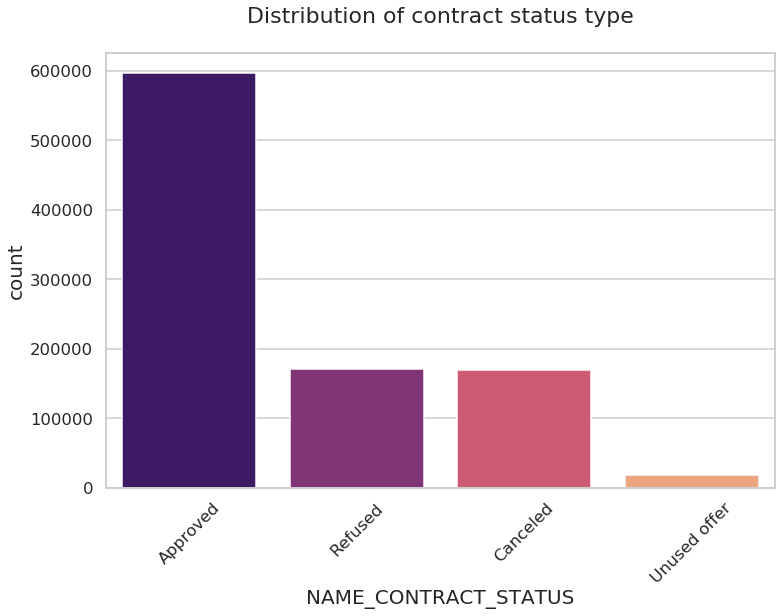

In [105]:
uniplot(mergedApplicationDataAndPreviousData,col='NAME_CONTRACT_STATUS',title='Distribution of contract status type', hue=None)

### Observation
- A large number of applications were approved for the clients
- Some clients who recieved the offer did not use their loan offers
- The number of refused & cancelled applications is roughly the same

## Bivariate Analysis

<Figure size 2880x1440 with 0 Axes>

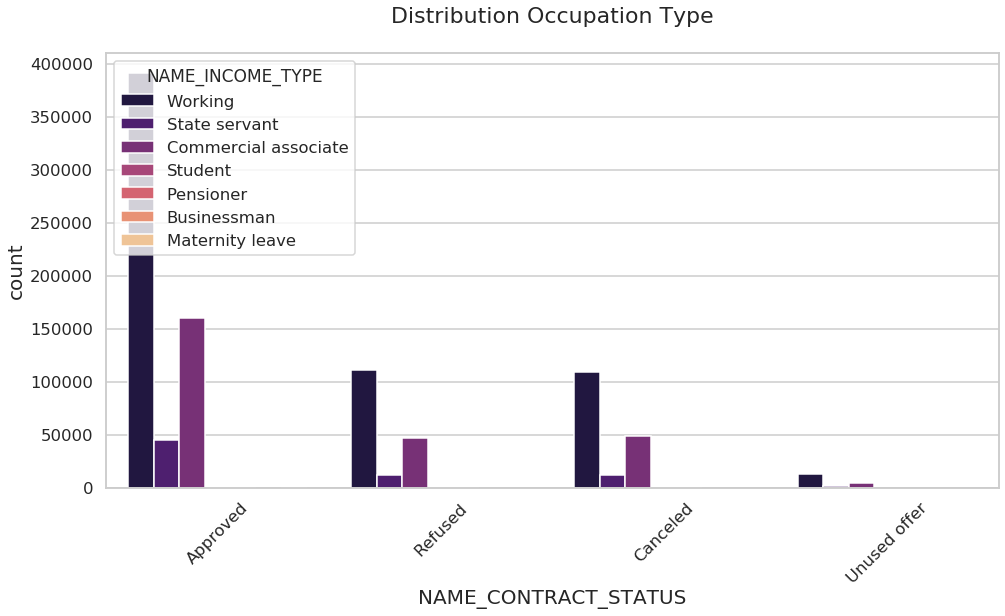

In [106]:
uniplot(mergedApplicationDataAndPreviousData,col='NAME_CONTRACT_STATUS',title='Distribution Occupation Type',hue='NAME_INCOME_TYPE')

### Observation

Based on the plot above we can conclude that:

- Working professionals have the highest number of approved loan applications.
- Working professionals also have the highest number of refused or cancelled loan applications
- Students, pensioners, businessmen and applicants on maternity leave have statistically low or no application status data present


<Figure size 2880x1440 with 0 Axes>

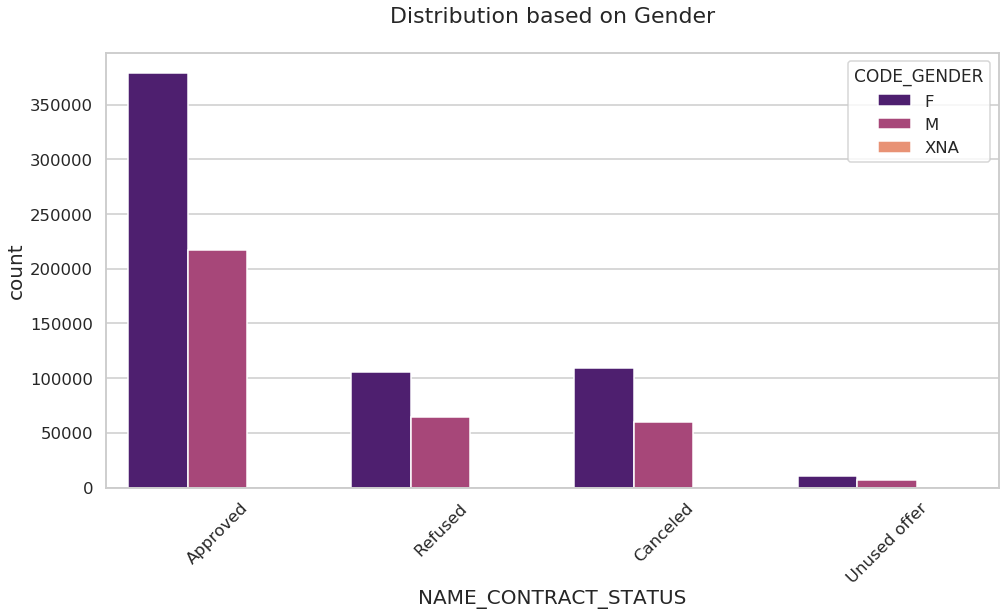

In [107]:
uniplot(mergedApplicationDataAndPreviousData,col='NAME_CONTRACT_STATUS',title='Distribution based on Gender',hue='CODE_GENDER')

### Observation 

- Female applicants make more applications and have a higher number of applications approved
- They also have a higher number of applications refused or canceled
- The number of male applicant statuses is lower than female ones across the board. This could be because of low number of males present in the dataset. 

<Figure size 2880x1440 with 0 Axes>

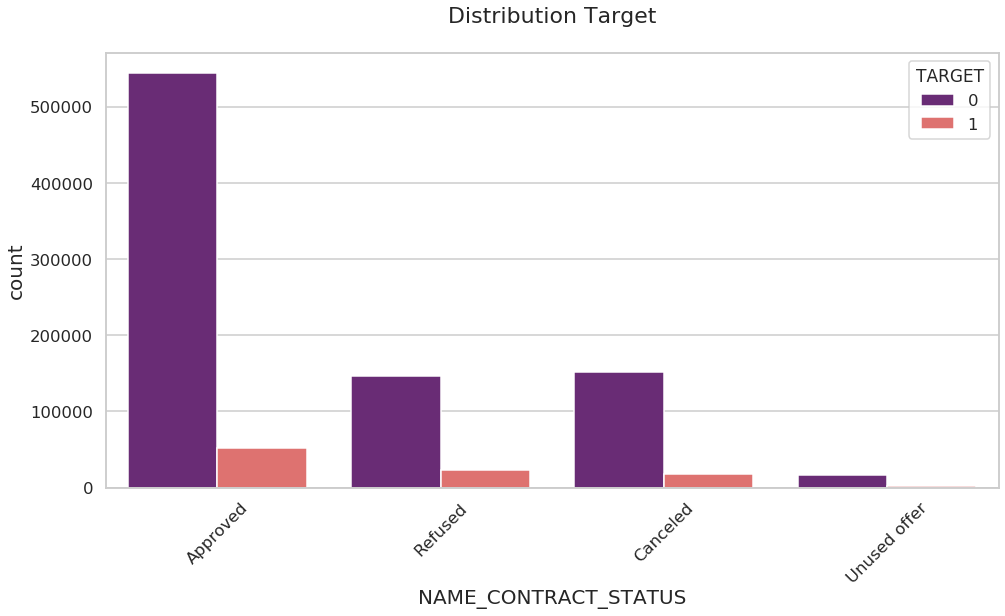

In [108]:
uniplot(mergedApplicationDataAndPreviousData,col='NAME_CONTRACT_STATUS',title='Distribution Target',hue='TARGET')

### Observation

- Based on the target column, we see that a high number of applicants who have a history of being abe to repay their loans are approved for new loans
- A very low number of defaulters are approved for new loans. This means that the bank is following a cautious approach to defaulters


<Figure size 2880x1440 with 0 Axes>

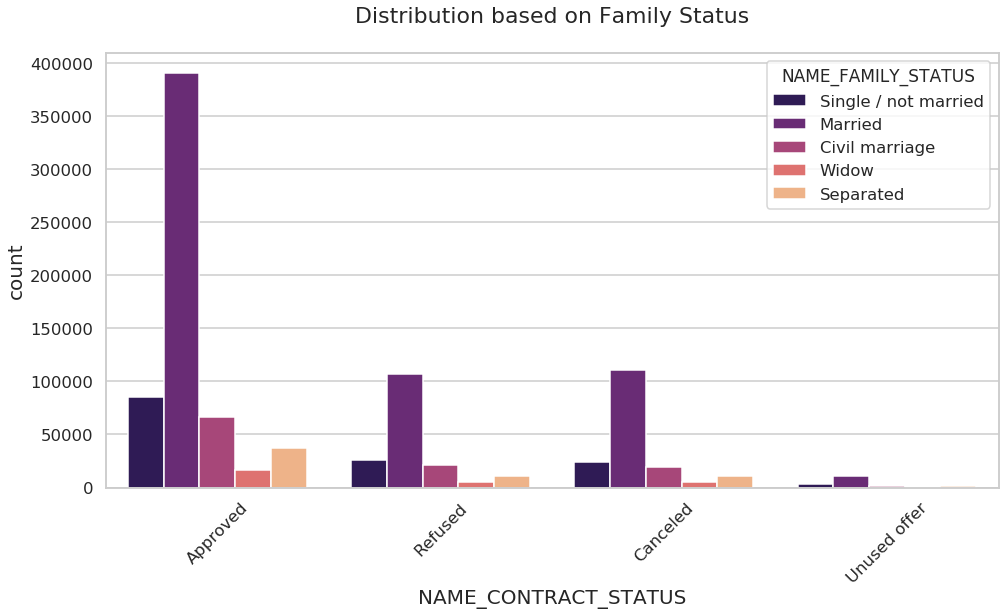

In [109]:
uniplot(mergedApplicationDataAndPreviousData,col='NAME_CONTRACT_STATUS',title='Distribution based on Family Status',hue='NAME_FAMILY_STATUS')

### Observation
- A large number of married people make loan applications & are approved for loans
- Separated individuals have a very low number of applications in the unused offer
- The number of single/not married people who apply for loans and are refused or have their applications cancelled as compared to approved is less than half.

<Figure size 2880x1440 with 0 Axes>

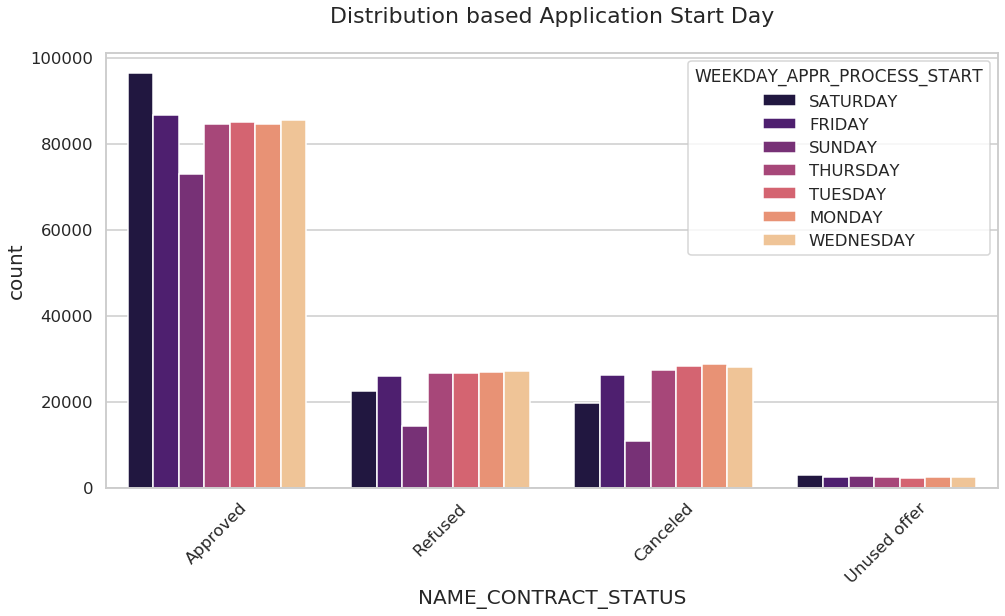

In [110]:
uniplot(mergedApplicationDataAndPreviousData,col='NAME_CONTRACT_STATUS',title='Distribution based Application Start Day',hue='WEEKDAY_APPR_PROCESS_START')

### Observation

- Most applicants start their loan applications on a Saturday and are successfully approved
- Applicants who start their applications on Friday have a higher chance of getting rejected or cancelling their application compared to the other 2 weekend days, Saturday and Sunday
- The number of cancelled applications is highest on Monday. This could suggest that after starting the application on the weekend, the client changed their mind on a workday.

<Figure size 2880x1440 with 0 Axes>

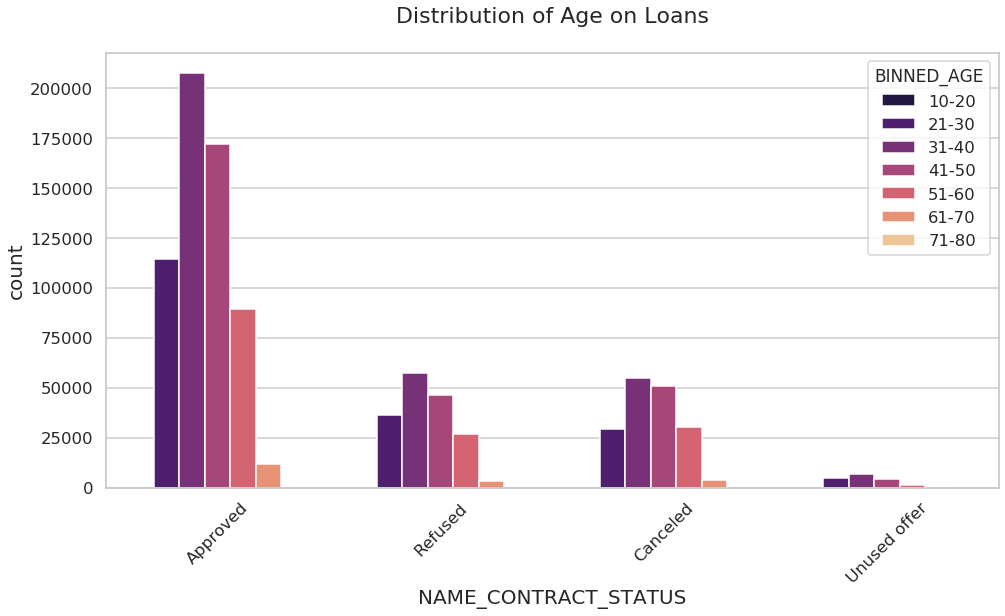

In [111]:
uniplot(mergedApplicationDataAndPreviousData,col='NAME_CONTRACT_STATUS',title='Distribution of Age on Loans',hue='BINNED_AGE')

### Observation

- People between the ages of 31-40 apply for the most number of loans and have consistently higher values across all application statuses

- People above the age of 71 & below 20 dont make any loan applications

- The people in the ages of 31-40 could be applying for more loans as they are married or living with a partner

### Continous & Categorical Plots

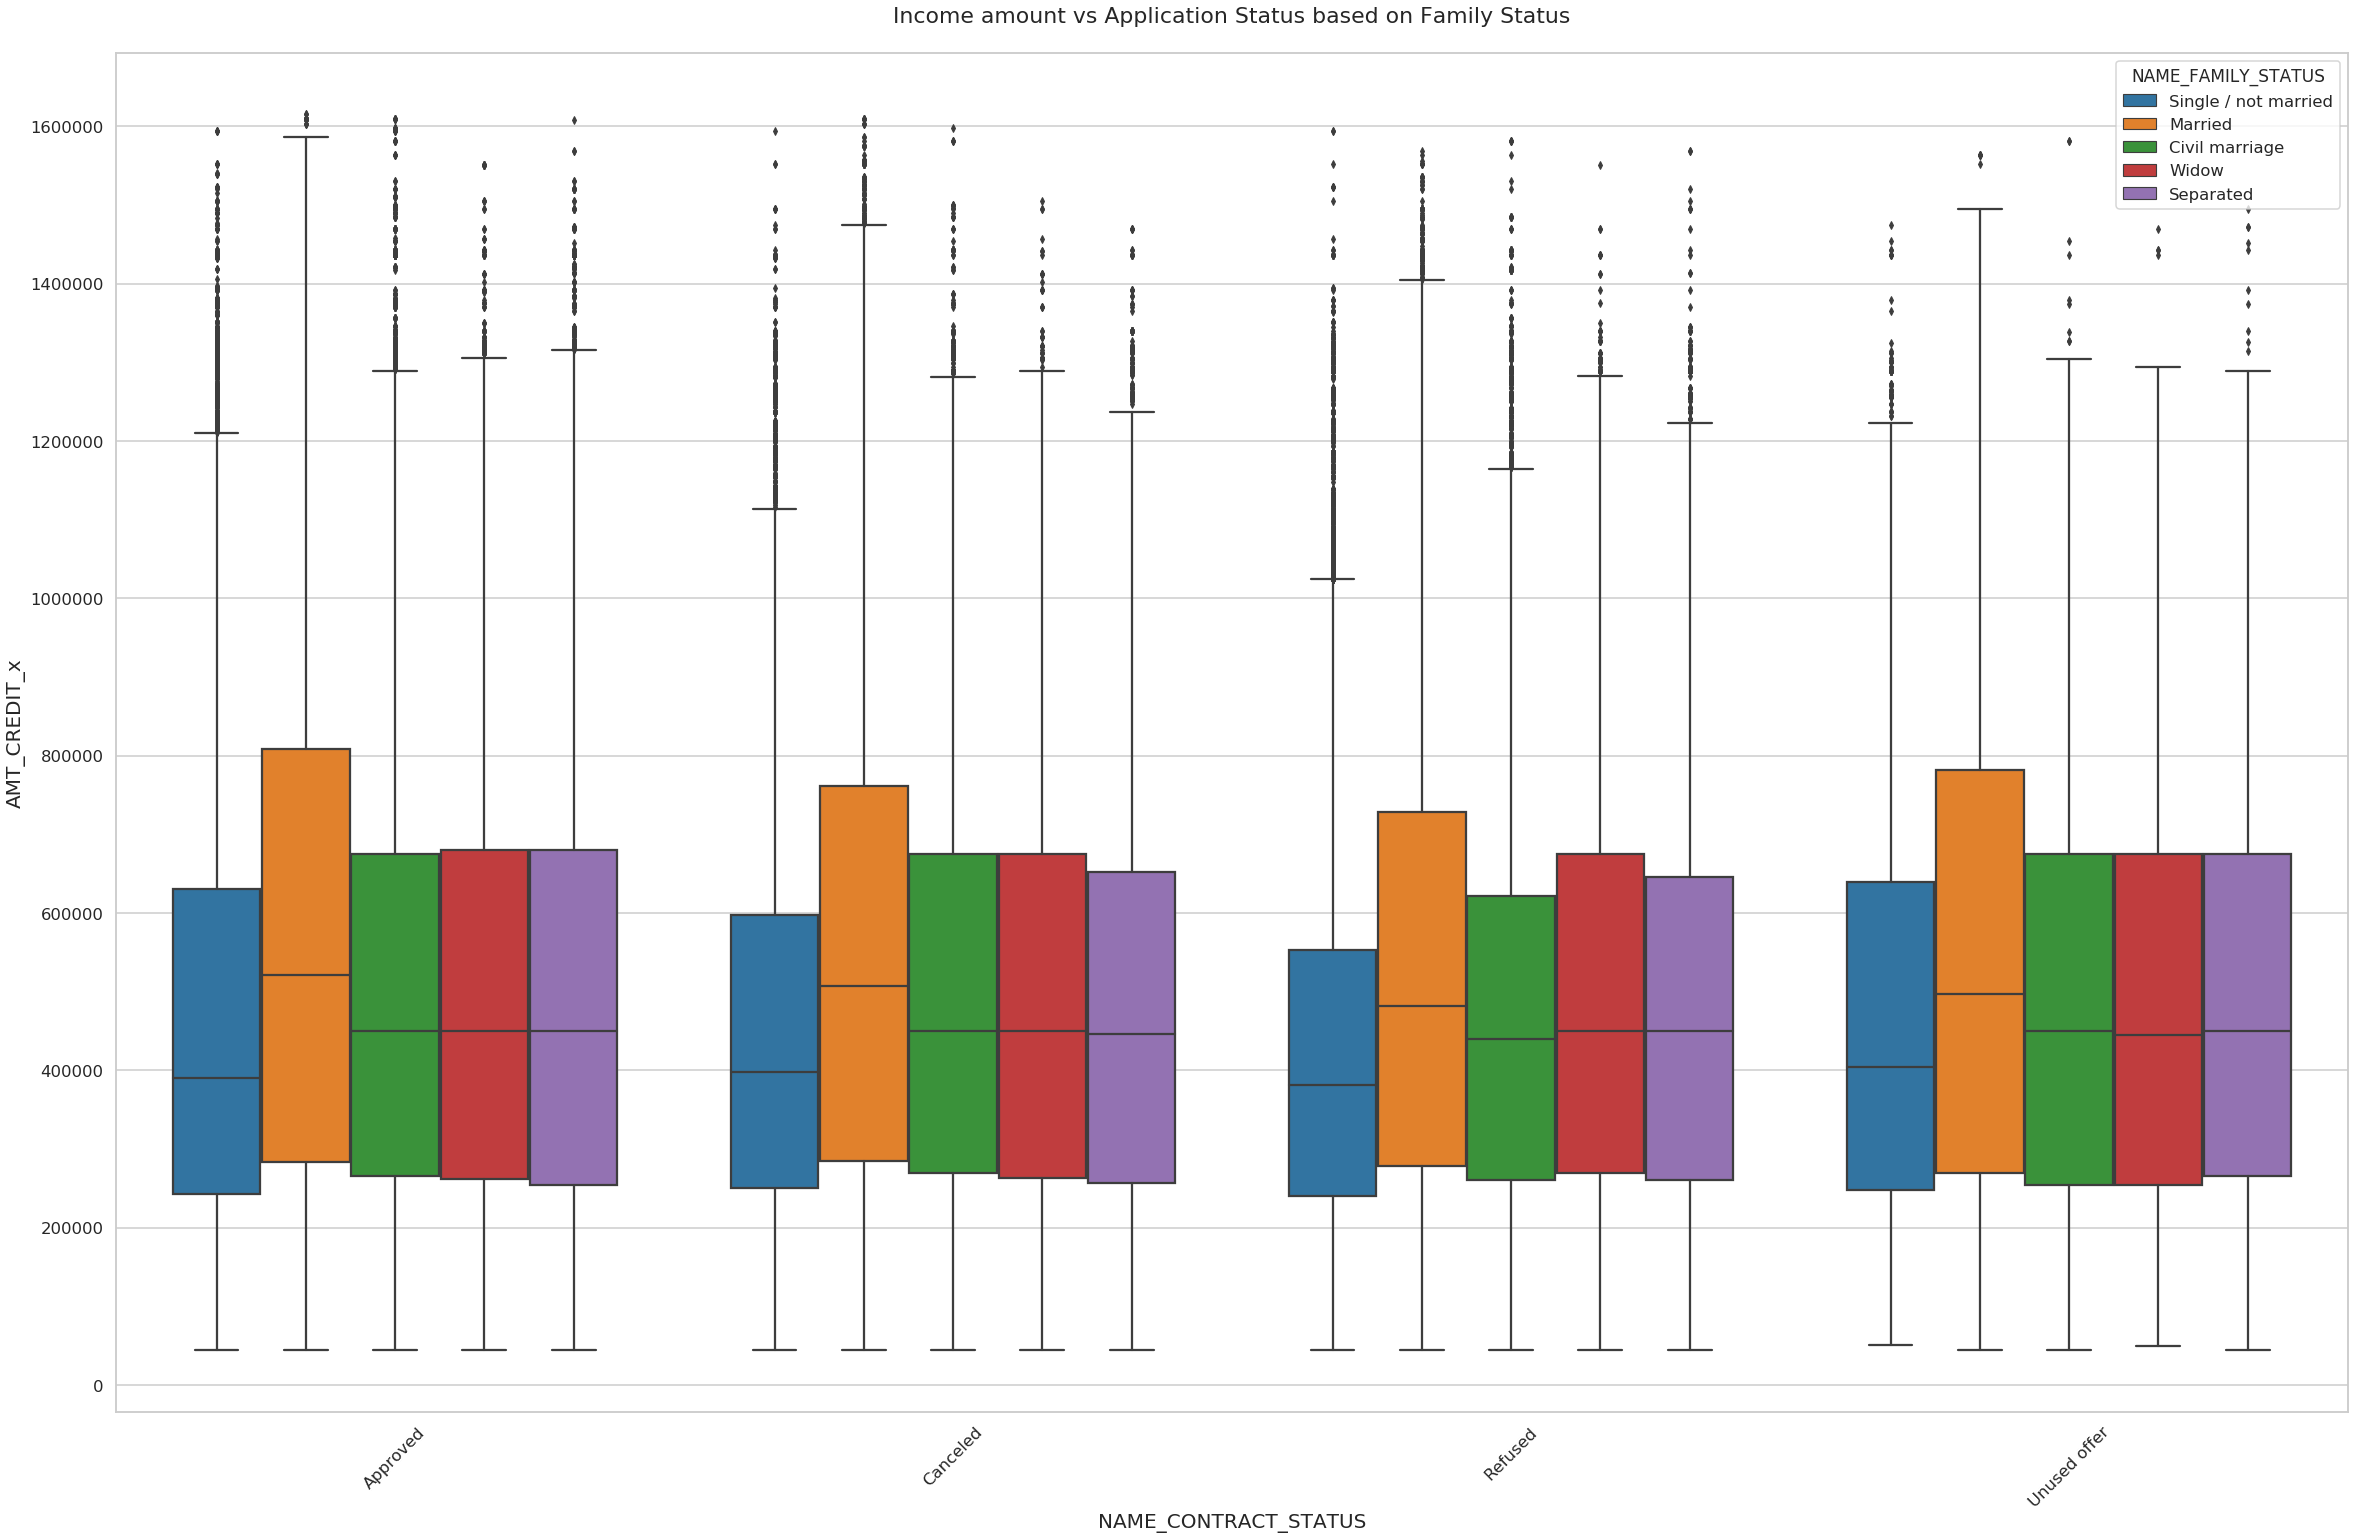

In [112]:
### Plotting the relationship between NAME_CONTRACT_STATUS vs AMT_CREDIT_x 
### from the merged application data and splitting on the basis of family status
plt.figure(figsize=(40,25))
plt.xticks(rotation=45)
sns.boxplot(data =mergedApplicationDataAndPreviousData, x='NAME_CONTRACT_STATUS',y='AMT_CREDIT_x', hue ='NAME_FAMILY_STATUS',orient='v')
plt.title('Income amount vs Application Status based on Family Status')
plt.show()

### Observation

- Married people take a higher amount of credit and have a higher median chance of getting approved

- People in Civil marriage, widows & separated applicants have a consistently similar median value across all the application statuses

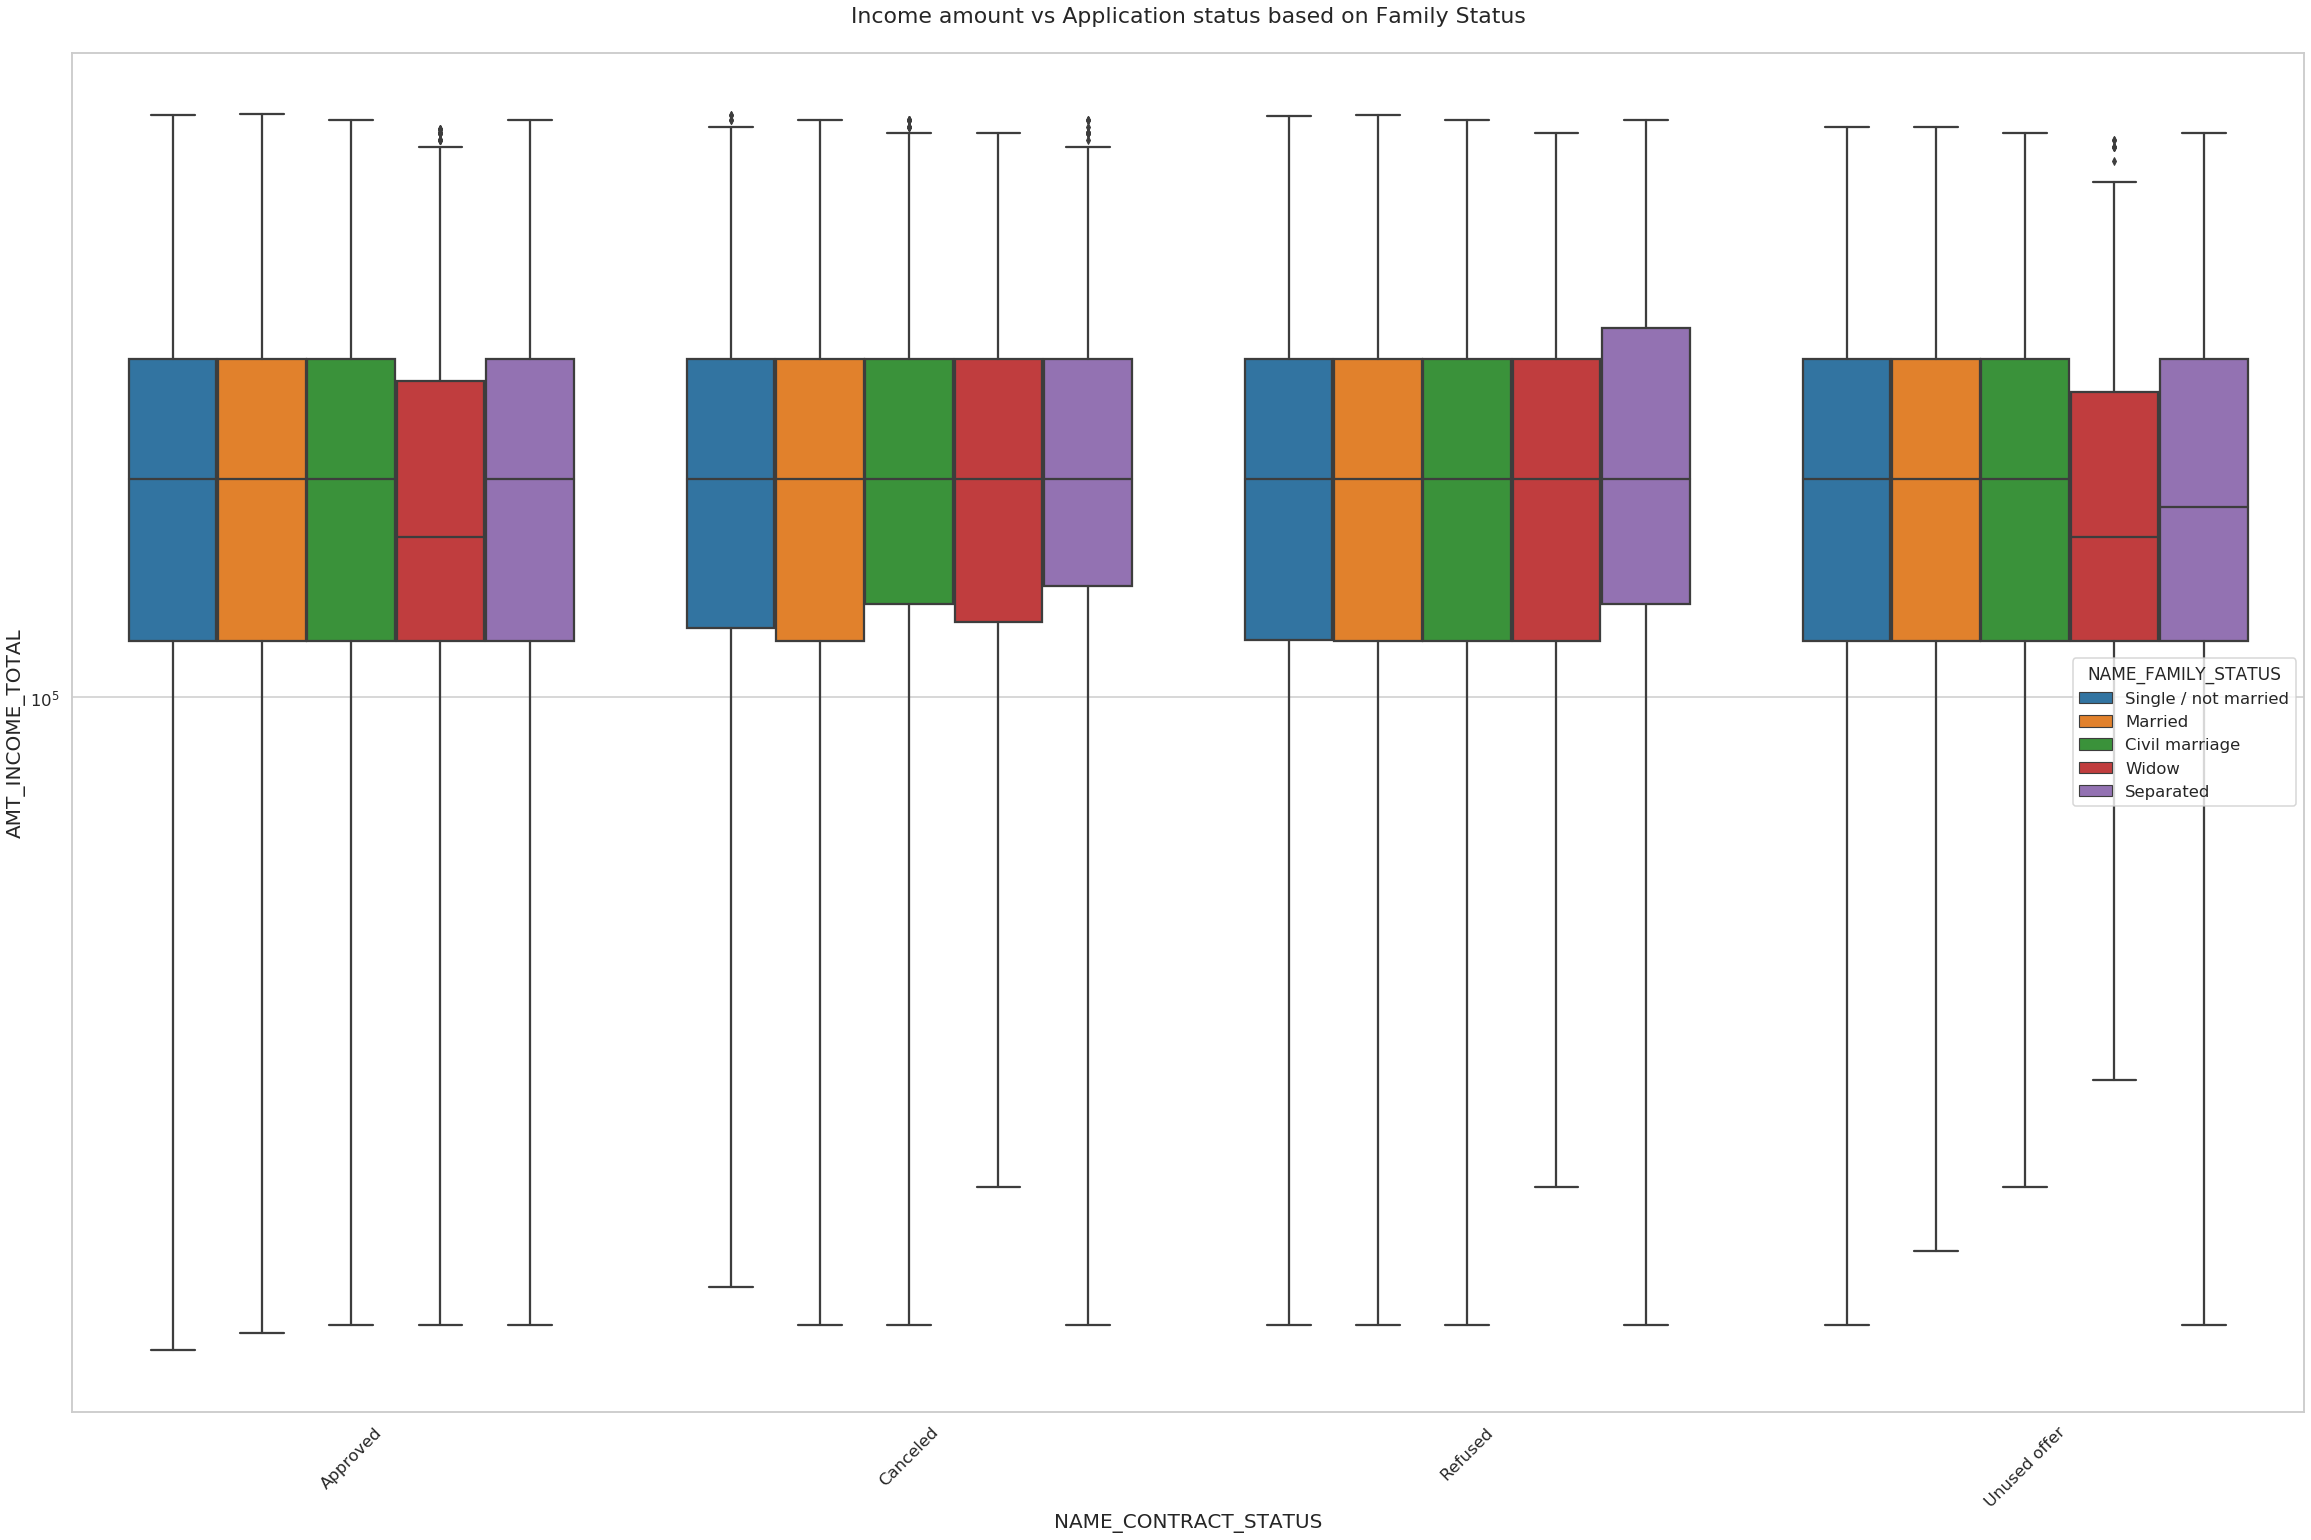

In [113]:
### Plotting the relationship between NAME_CONTRACT_STATUS vs AMT_INCOME_TOTAL 
### from the merged application data and splitting on the basis of family status
plt.figure(figsize=(40,25))
plt.xticks(rotation=45)
plt.yscale('log')
sns.boxplot(data =mergedApplicationDataAndPreviousData, x='NAME_CONTRACT_STATUS',y='AMT_INCOME_TOTAL', hue ='NAME_FAMILY_STATUS',orient='v')
plt.title('Income amount vs Application status based on Family Status')
plt.show()

### Observation

- People who are married, live in civil marriages & single/not married earn consistently well across all application status types
- Their median income is also the same

- Widows earn less than all the other categories

# Conclusion

Through this case study we have made the following conclusions:

- Most popular days for making applications is Saturday. The bank could focus on keeping offices open longer on Saturday to aid in completion of the applications. 
- Most popular age group for taking loans or credit is 31-40 with the most number of applications. The firm should focus on exploring more lucrative options for clients in that age range. They could be offered lower interest rates, longer repayment holidays etc.
- Married people have the highest chance of making a loan application and being approved for a loan. 

- Because of the imbalance in the data, Females appear to be making the most number of loan applications. They also have a higher chance of getting approved and being able to repay the loans on time

- Widows with secondary education have a very high median credit amount borrowing and default on paying back loans as well. It would be better to be vary of lending to them 

- Male labourers have high number of applications and also a high number of defaults as compared to females. It would be better for the bank to assess whether the person borrowing in this occupation type could be helped with staged loans or with loans on a lower interest rate than the other categories

# END OF FILE